## Analisis exploratorio de Datos para Correlacion entre habitos de estudiantes y su desempeño académico

Tomado de:
https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

"This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle. Perfect for EDA, ML practice, or just vibing with data while pretending to be productive."

This CSV file contains a simulated yet realistic dataset titled “Student Habits vs Academic Performance: A Simulated Study”, featuring 1,000 student records. Each row represents an individual student, capturing daily lifestyle habits such as study time, sleep, social media use, diet quality, mental health rating, and more—mapped against their final exam score. 

### OBJETIVO DEL ESTUDIO
- Entender que variables son mas determinantes en el rendimiento academico de los estudiantes
  - Indentificar el comportamiento de las diferentes variables según catacteristicas de los estudiantes
  - Encontrar relaciones entre variables continuas, especificamente entre actividades que ocupan el tiempo y el desempeño
  - Entender porque algunos estudiantes no mejoran su desempeño a pesar de ser muy aplicados

In [1]:
import pandas as pd
import numpy as np

### Importando datos

In [2]:
data = pd.read_csv('student_habits_performance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [3]:
data.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [4]:
data["internet_quality"].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [15]:
## Análisis de la variable "parental_education_level"

data["parental_education_level"].unique()

data.groupby(data["parental_education_level"]).size()


parental_education_level
Bachelor       350
High School    392
Master         167
dtype: int64

In [16]:
## Fill missing values

data["parental_education_level"].fillna("Unknown", inplace=True)


C:\Users\escob\AppData\Local\Temp\ipykernel_27960\3300811279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["parental_education_level"].fillna("Unknown", inplace=True)


In [17]:
## Análisis de la variable "parental_education_level"

data["parental_education_level"].unique()

data.groupby(data["parental_education_level"]).size()


parental_education_level
Bachelor       350
High School    392
Master         167
Unknown         91
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [26]:
# Drop student ID
df = data.drop(columns=["student_id"])

In [24]:
# Get new dataframe with continous variables
df_continuous = data.select_dtypes(include=['float64', 'int64'])

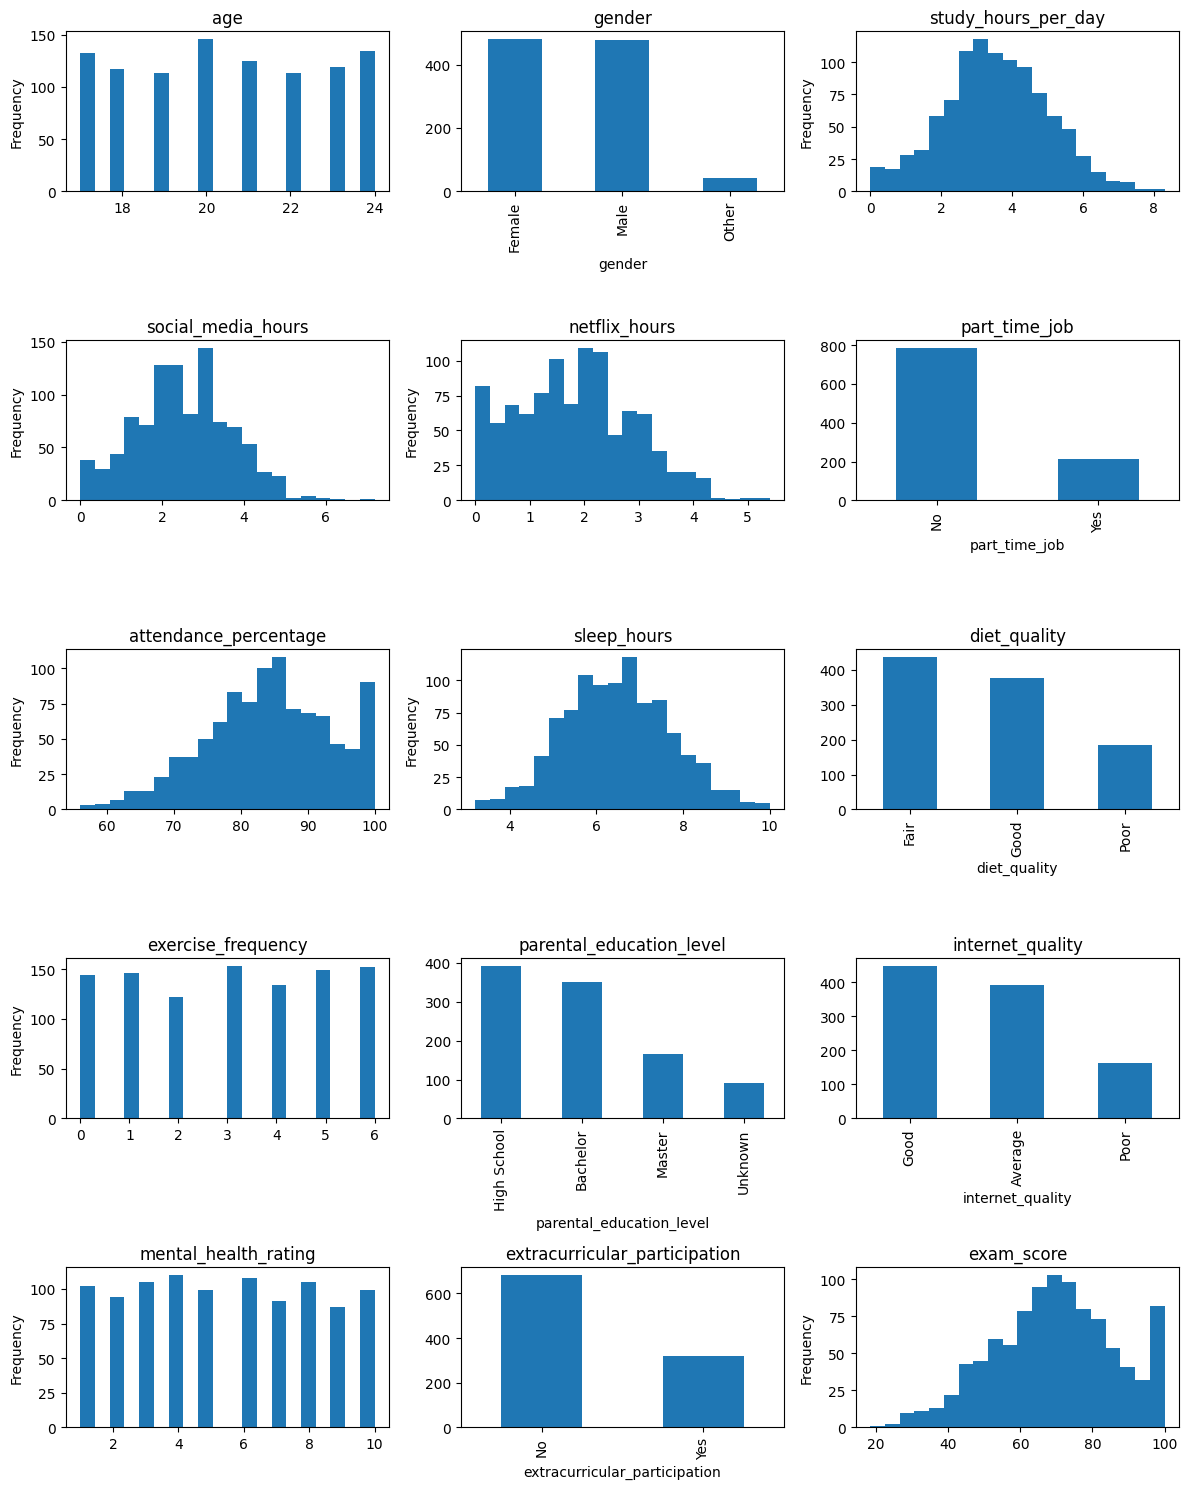

In [34]:
# Plot histogram for all variables in subplots

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

for column in df.columns:
    ax = axs.flatten()[list(df.columns).index(column)]
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', ax=ax, title=column)
    else:
        df[column].plot(kind='hist', ax=ax, title=column, bins=20)

#change subplot size
fig.set_figwidth(12)
fig.set_figheight(15)
plt.tight_layout()
plt.show()


In [38]:
df_men = df[df['gender'] == 'Male']
df_women = df[df['gender'] == 'Female']

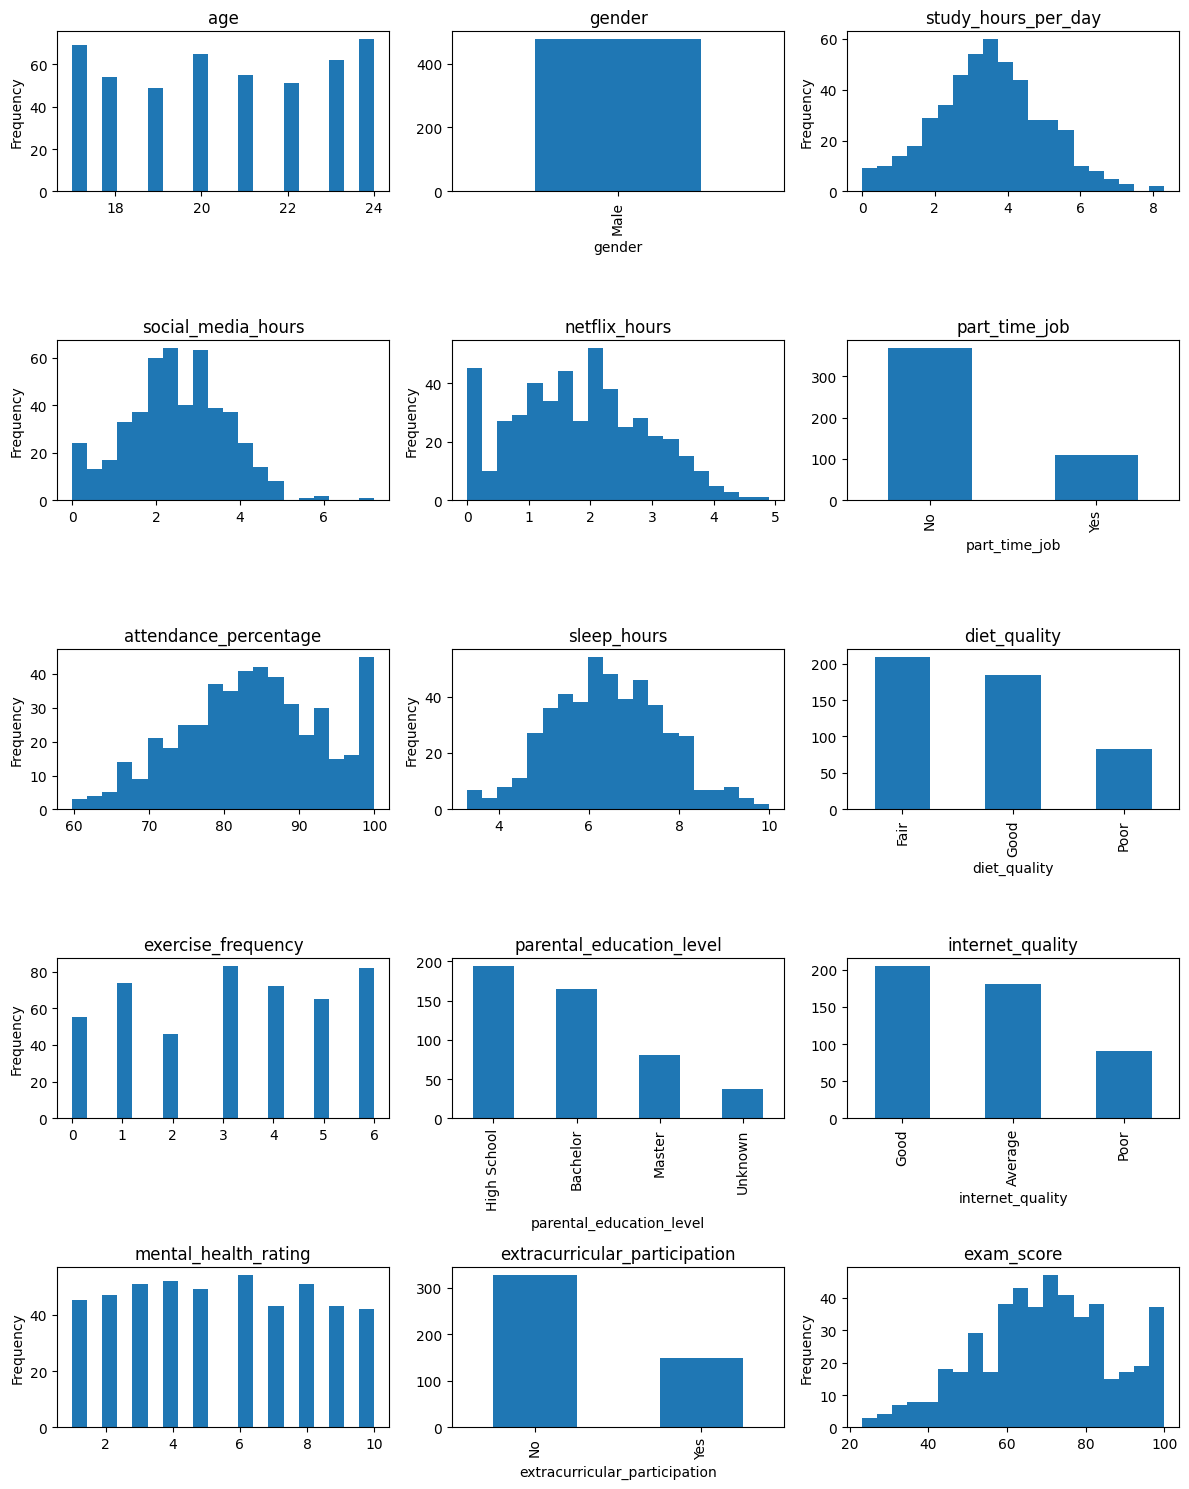

In [39]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

for column in df.columns:
    ax = axs.flatten()[list(df.columns).index(column)]
    if df_men[column].dtype == 'object':
        df_men[column].value_counts().plot(kind='bar', ax=ax, title=column)
    else:
        df_men[column].plot(kind='hist', ax=ax, title=column, bins=20)

#change subplot size
fig.set_figwidth(12)
fig.set_figheight(15)
plt.tight_layout()
plt.show()


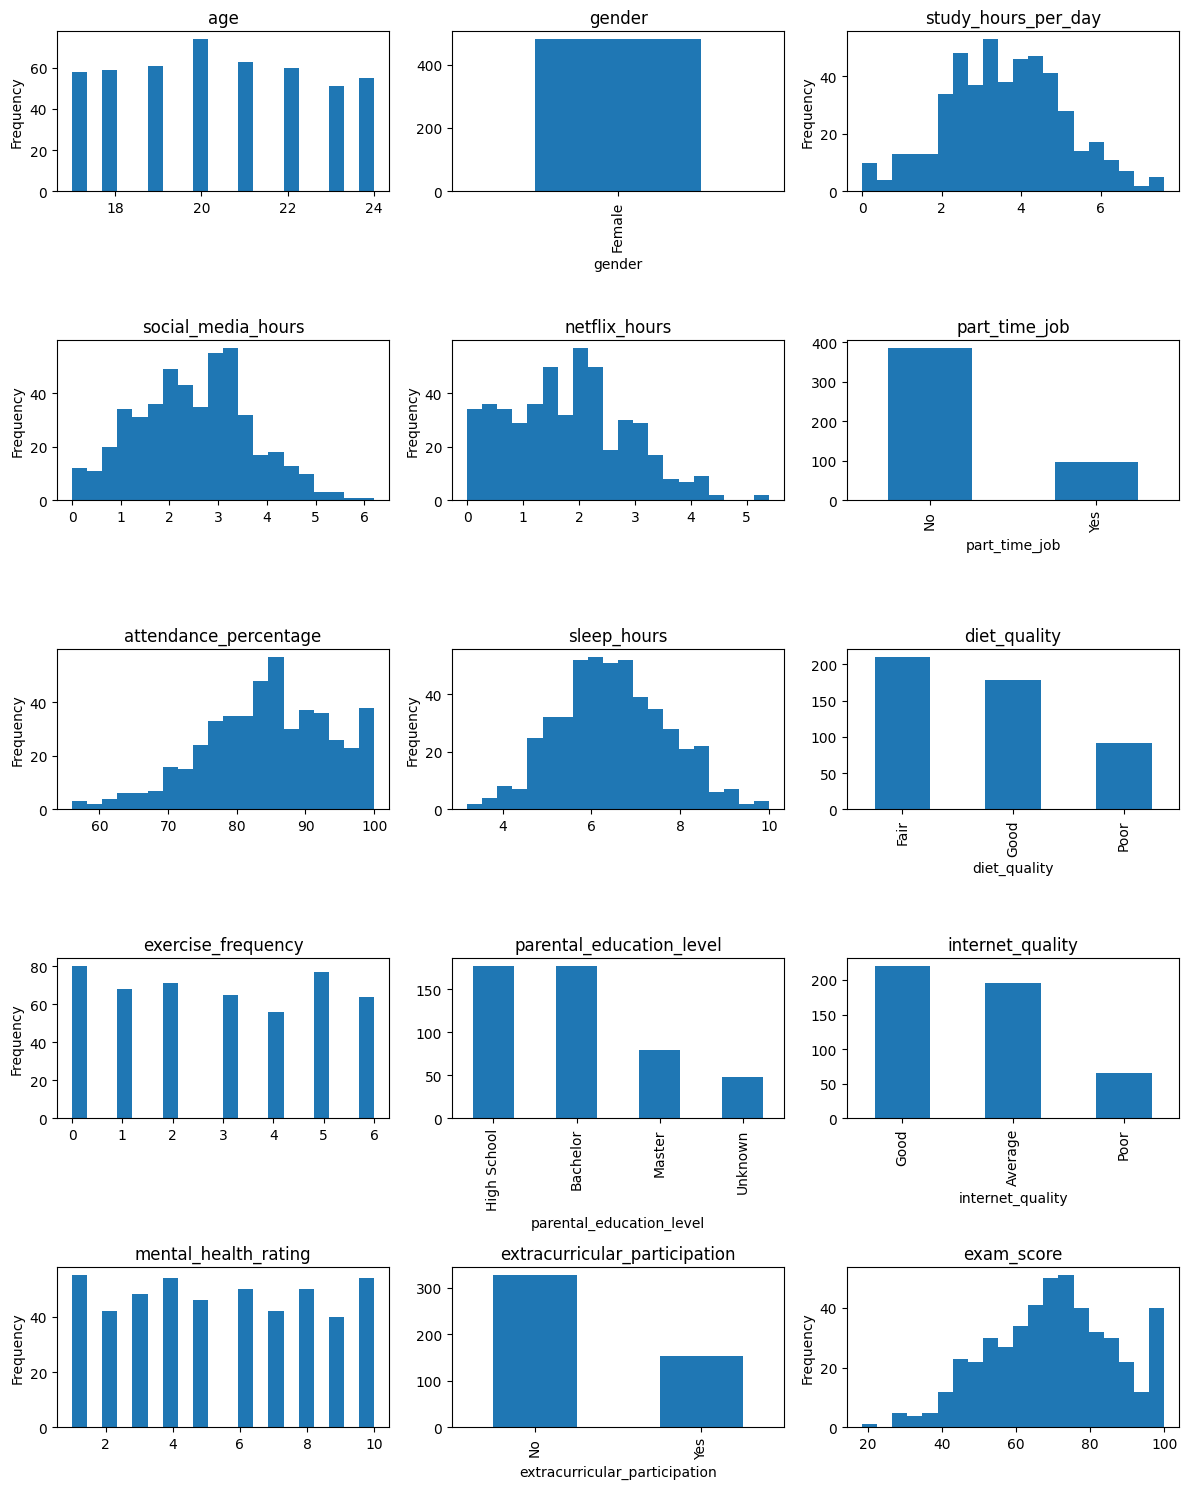

In [40]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

for column in df.columns:
    ax = axs.flatten()[list(df.columns).index(column)]
    if df_women[column].dtype == 'object':
        df_women[column].value_counts().plot(kind='bar', ax=ax, title=column)
    else:
        df_women[column].plot(kind='hist', ax=ax, title=column, bins=20)


#change subplot size
fig.set_figwidth(12)
fig.set_figheight(15)
plt.tight_layout()
plt.show()

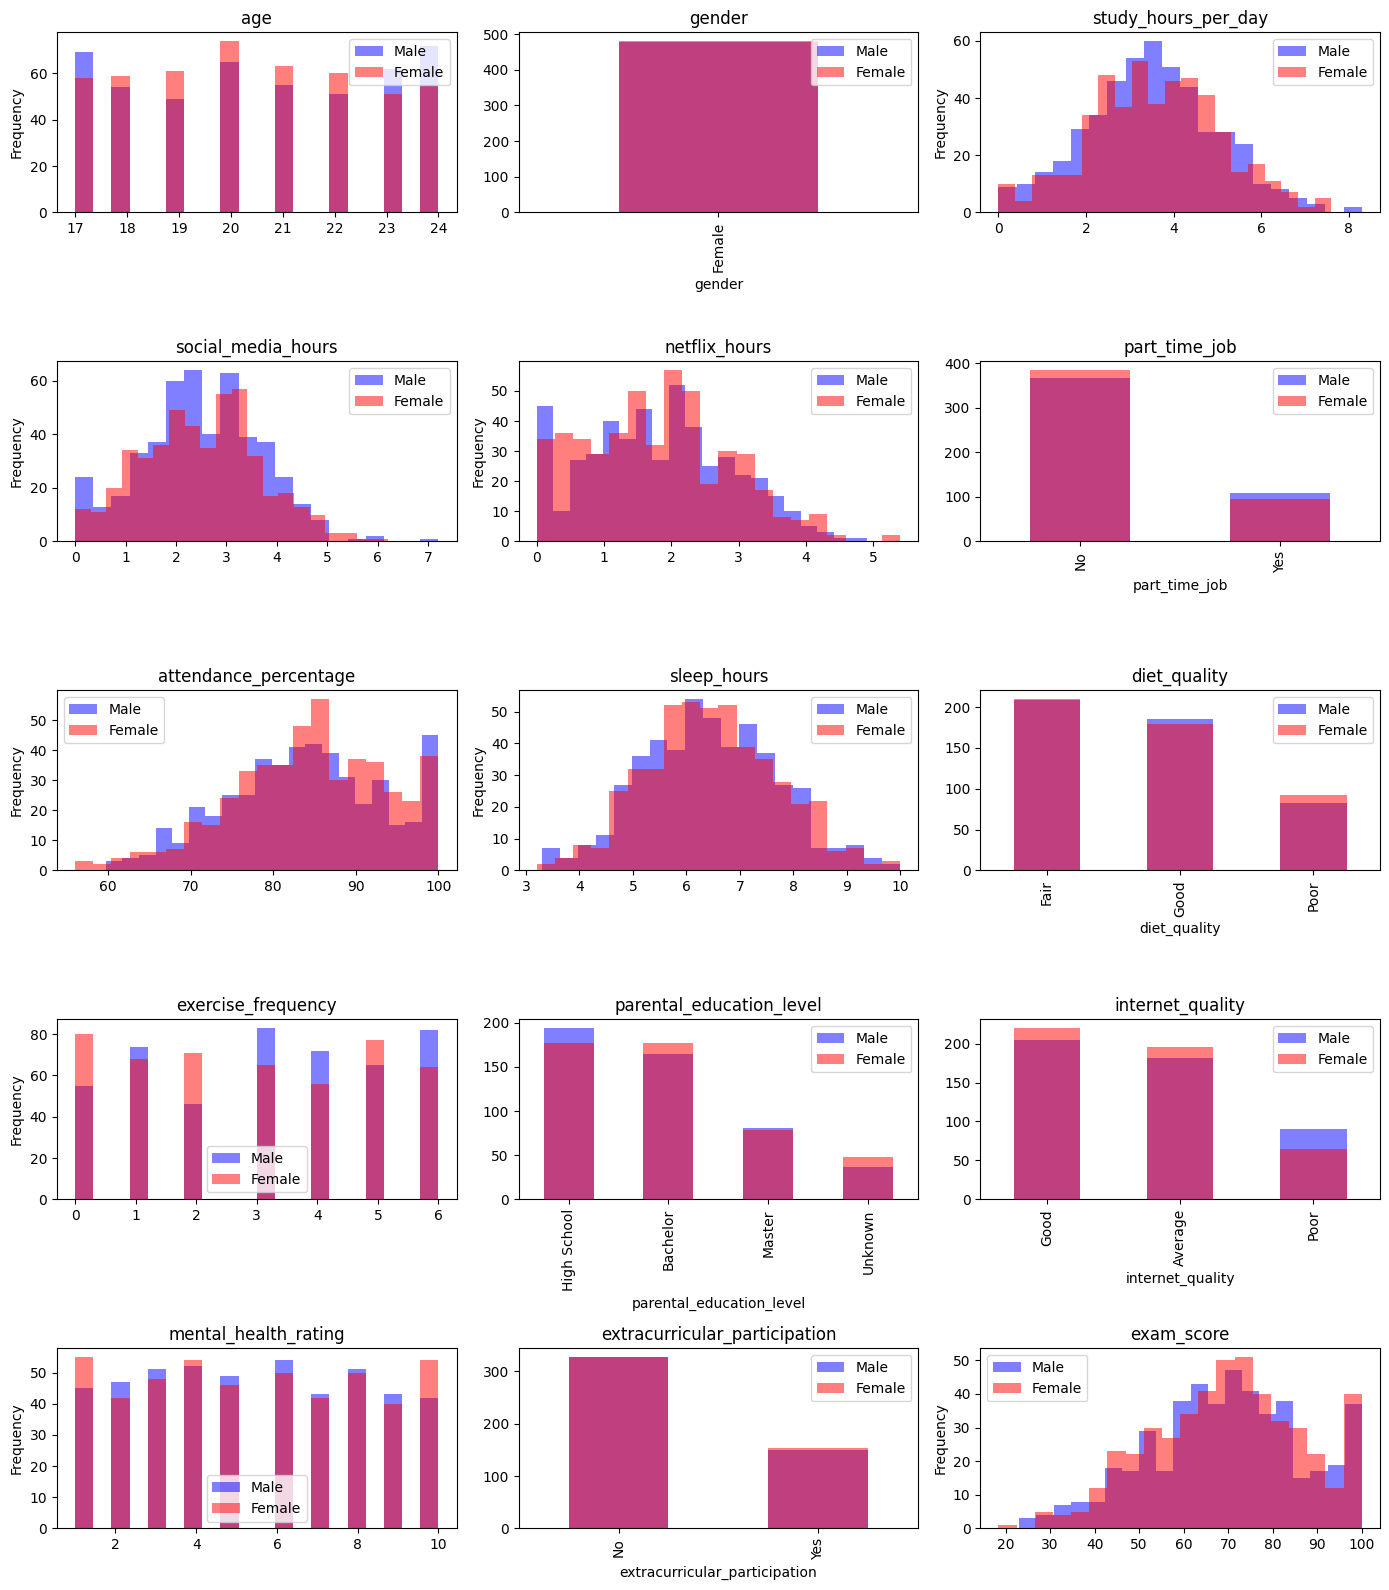

In [47]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(14, 16))

for idx, column in enumerate(df_men.columns):
    ax = axs.flatten()[idx]
    if df_men[column].dtype == 'object':
        df_men[column].value_counts().plot(kind='bar', ax=ax, title=column, alpha=0.5, color='blue', label='Male')
    else:
        df_men[column].plot(kind='hist', ax=ax, bins=20, alpha=0.5, color='blue', label='Male')
    
    if df_women[column].dtype == 'object':
        df_women[column].value_counts().plot(kind='bar', ax=ax, title=column, alpha=0.5, color='red', label='Female')
    else:
        df_women[column].plot(kind='hist', ax=ax, bins=20, alpha=0.5, color='red', label='Female')
    ax.set_title(column)
    ax.legend()

fig.set_figwidth(14)
fig.set_figheight(16)
plt.tight_layout()
plt.show()

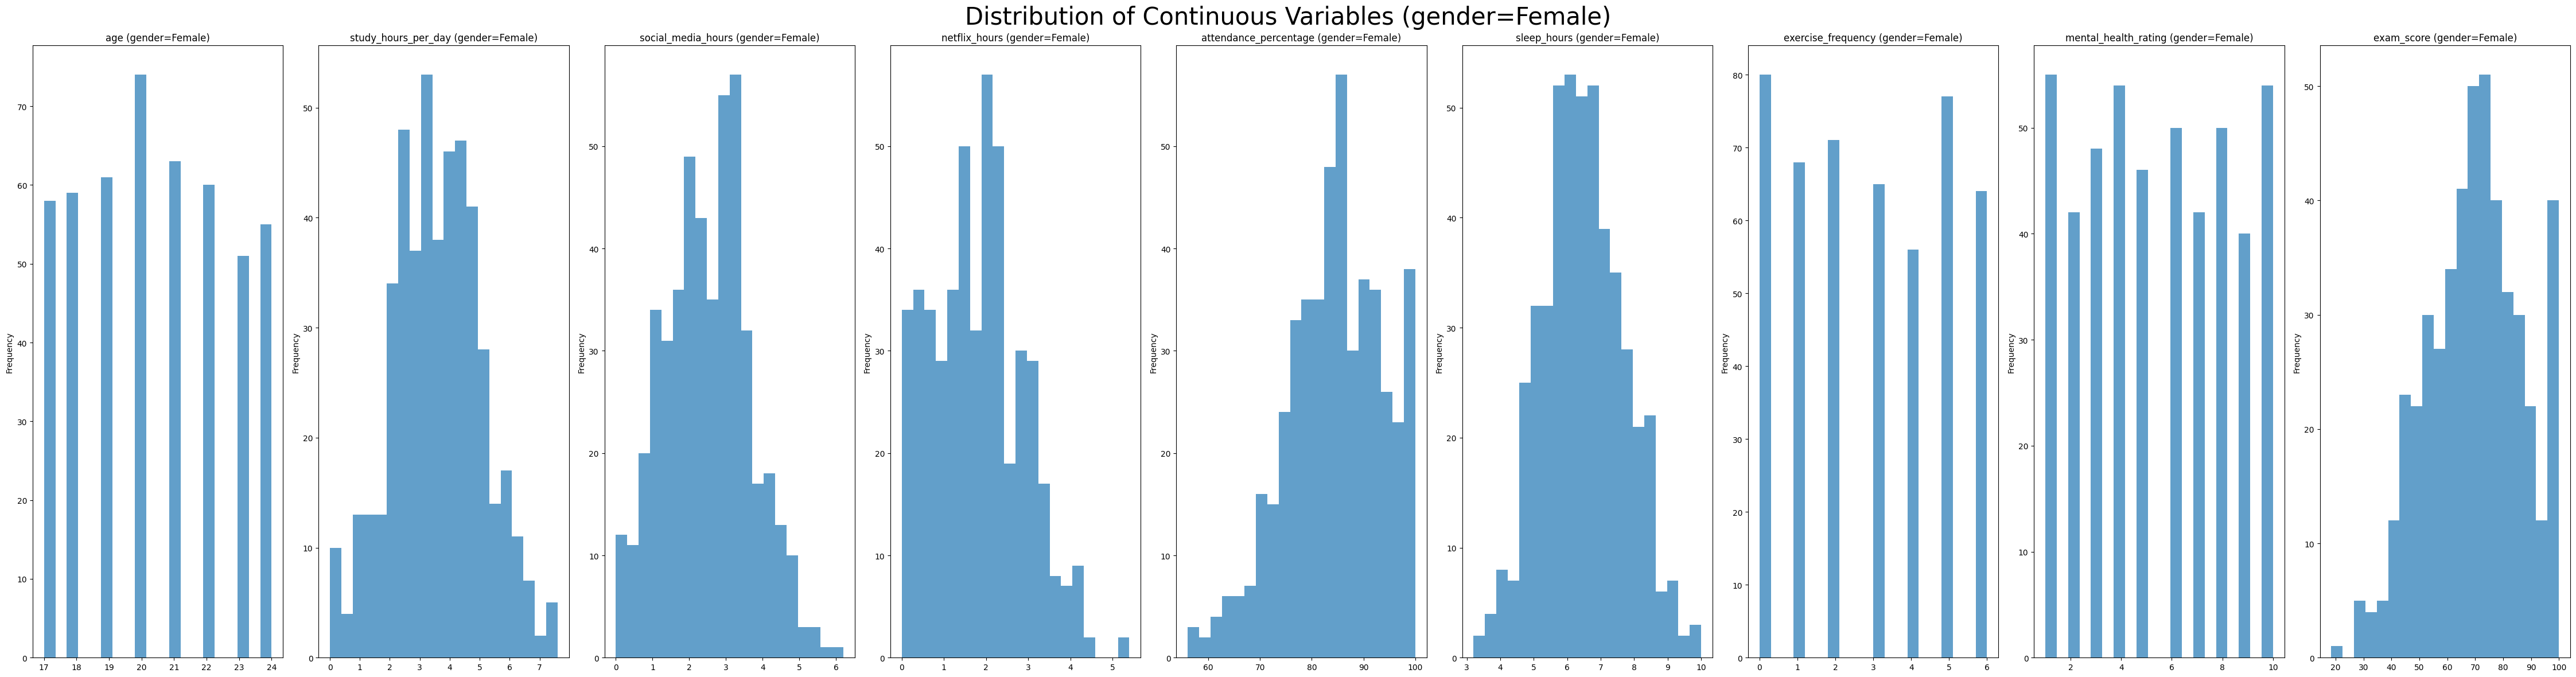

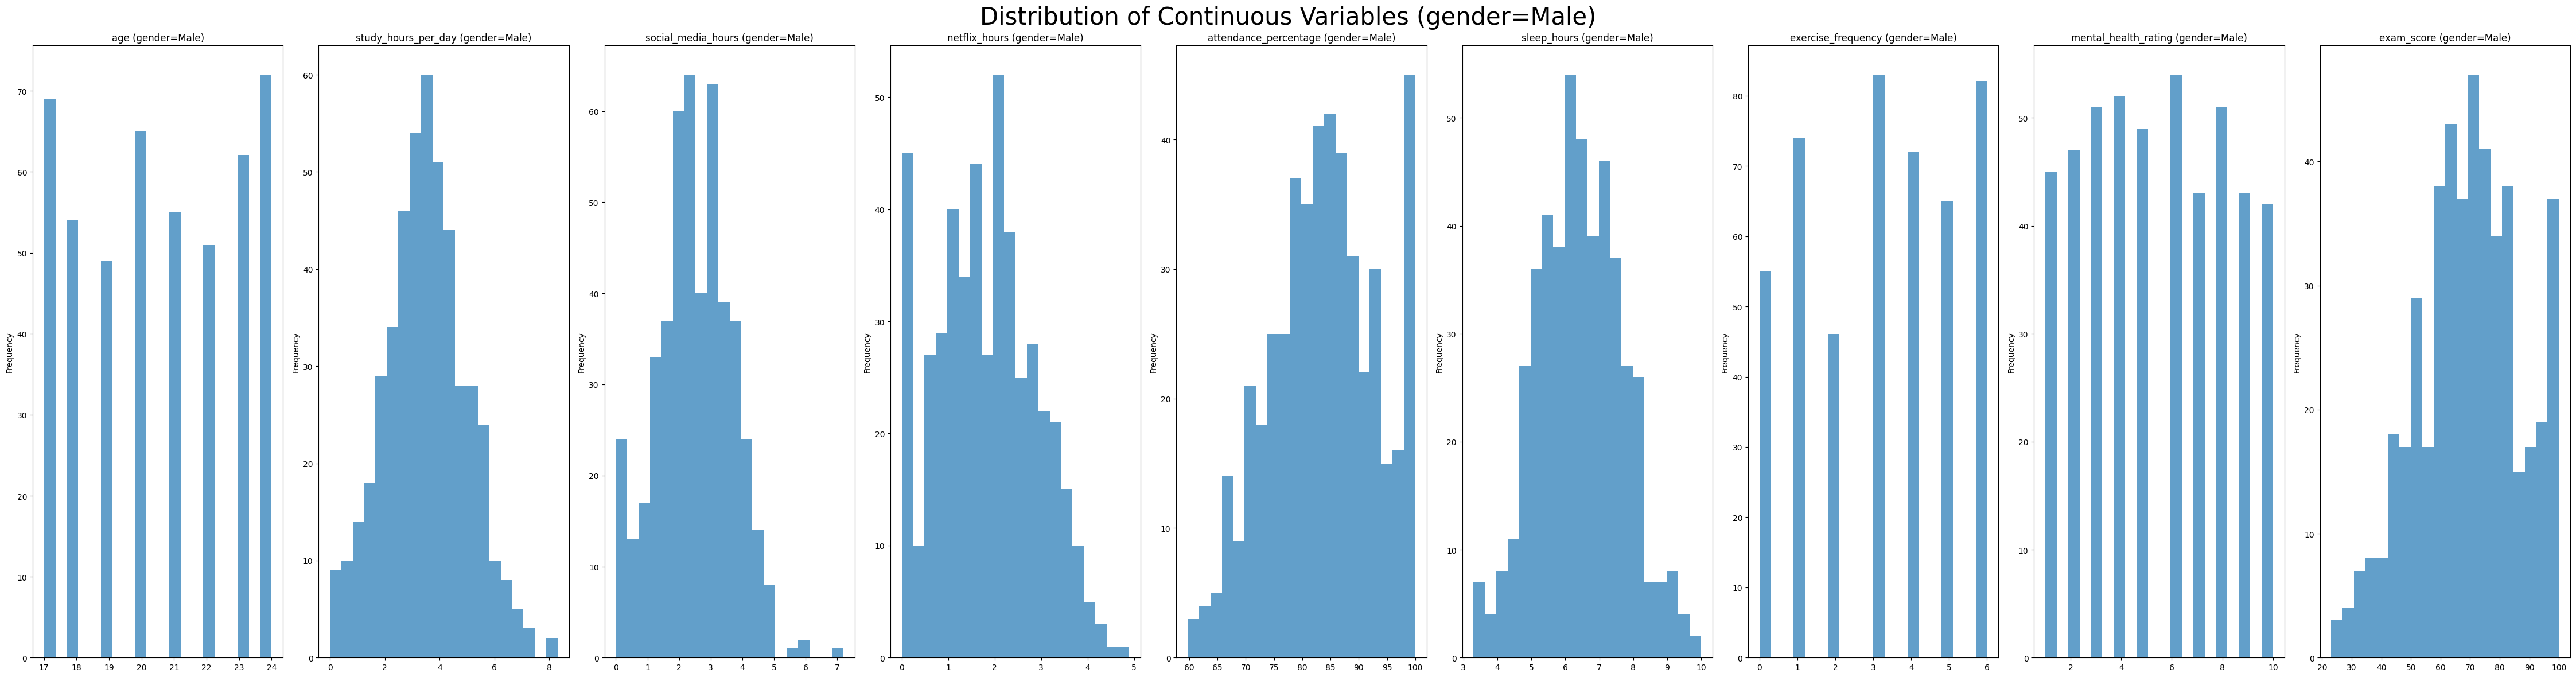

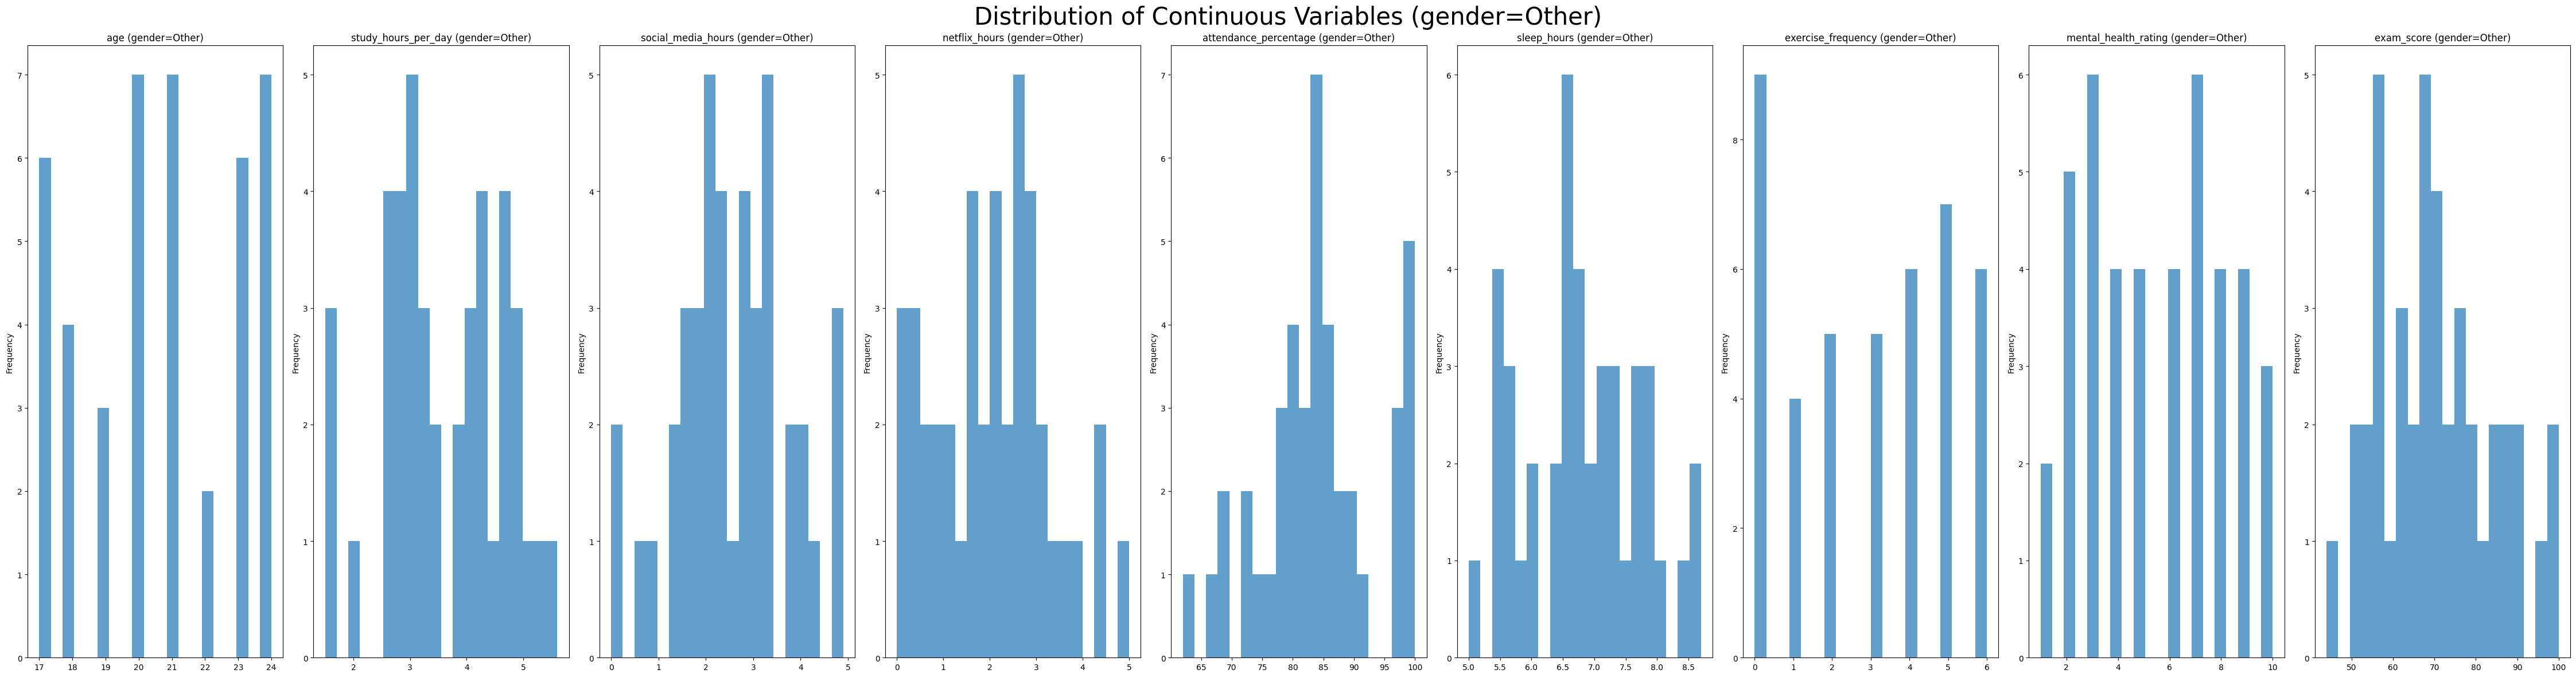

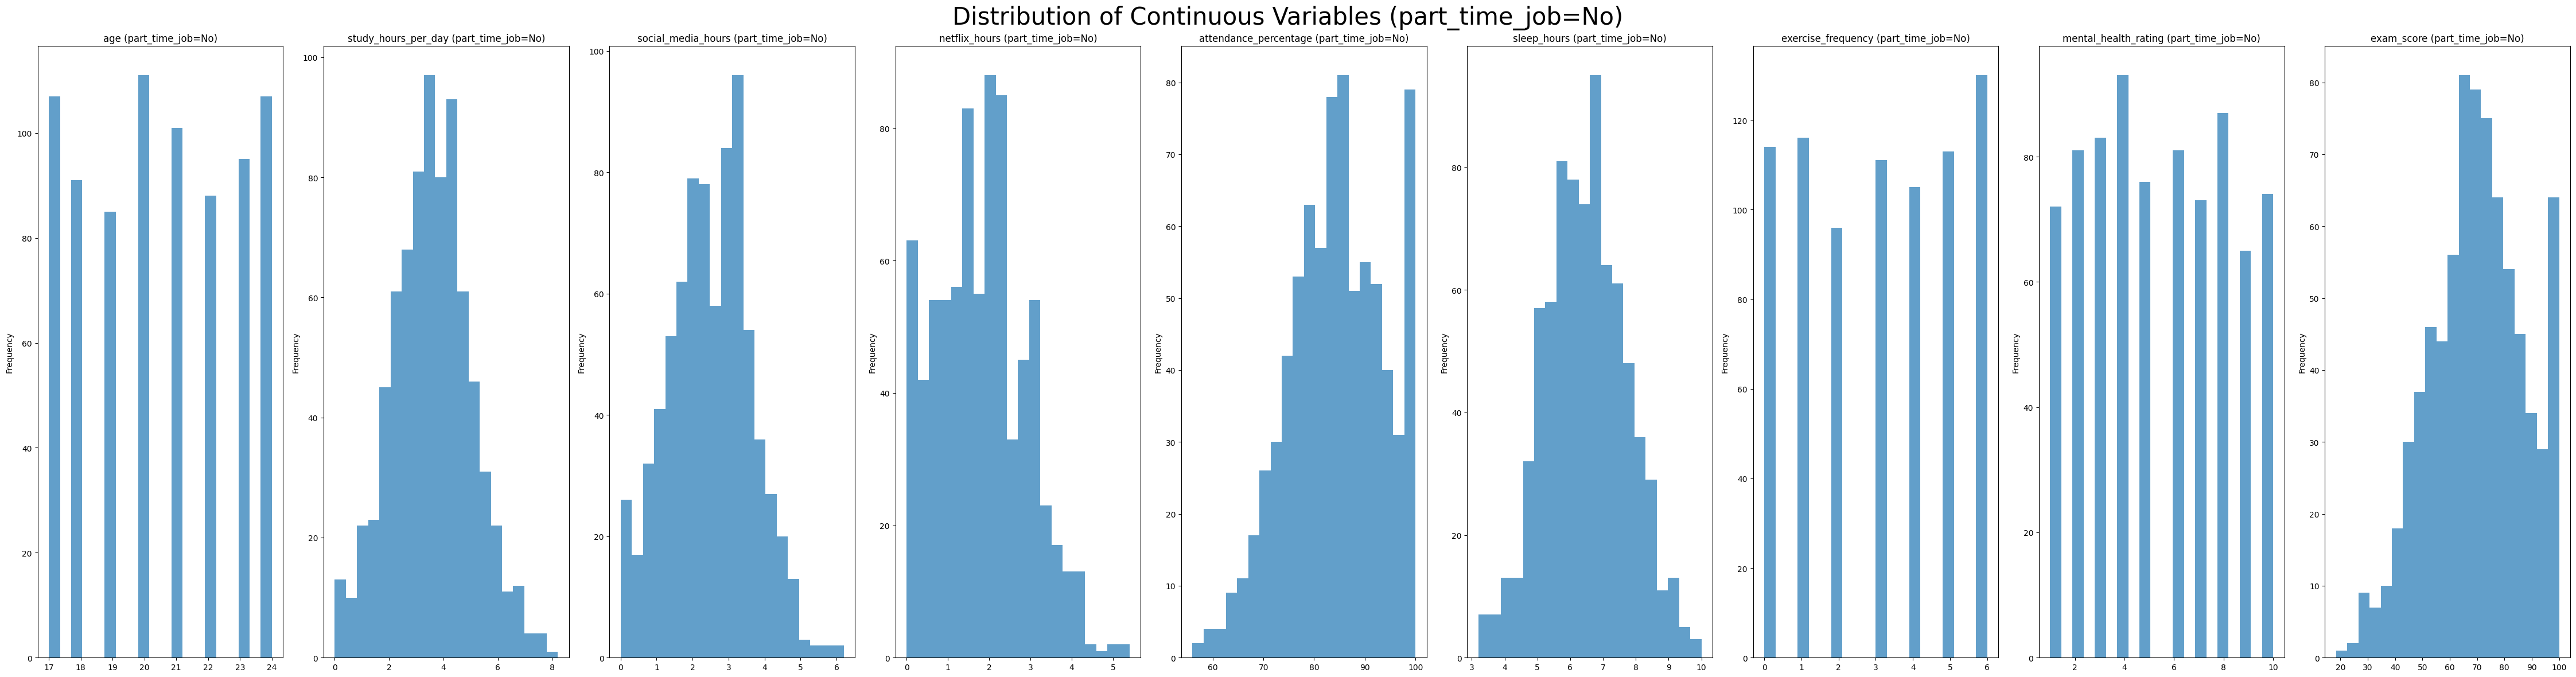

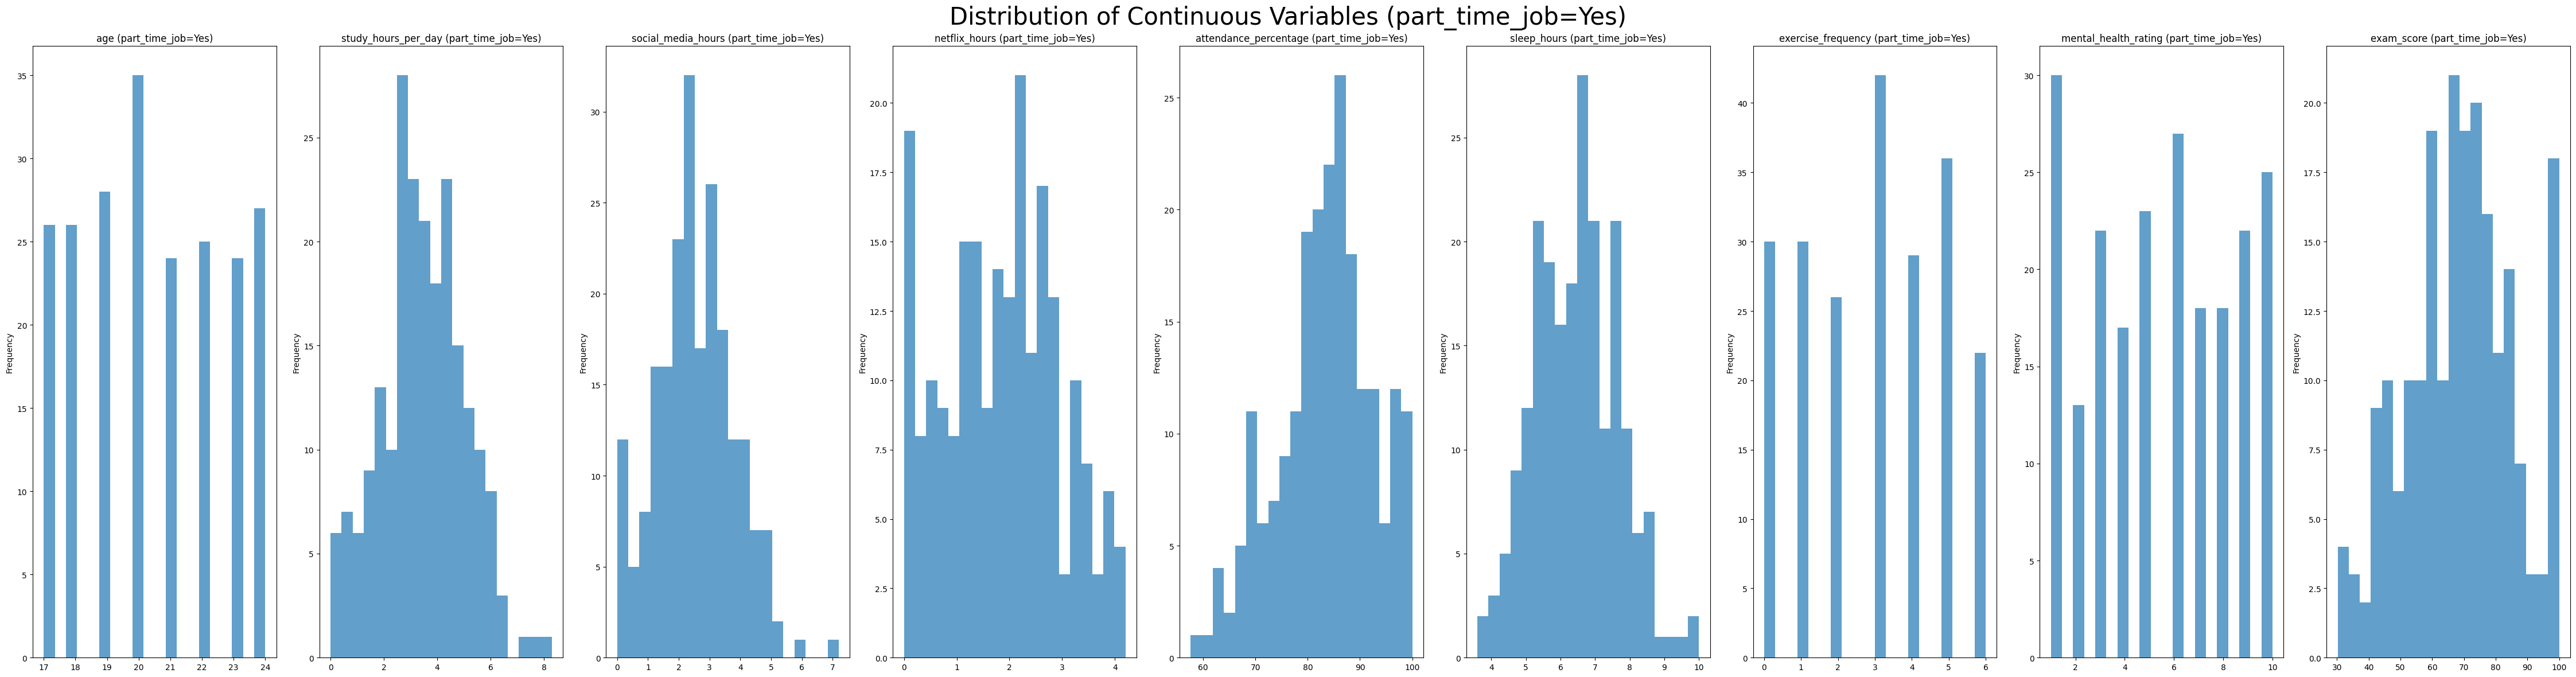

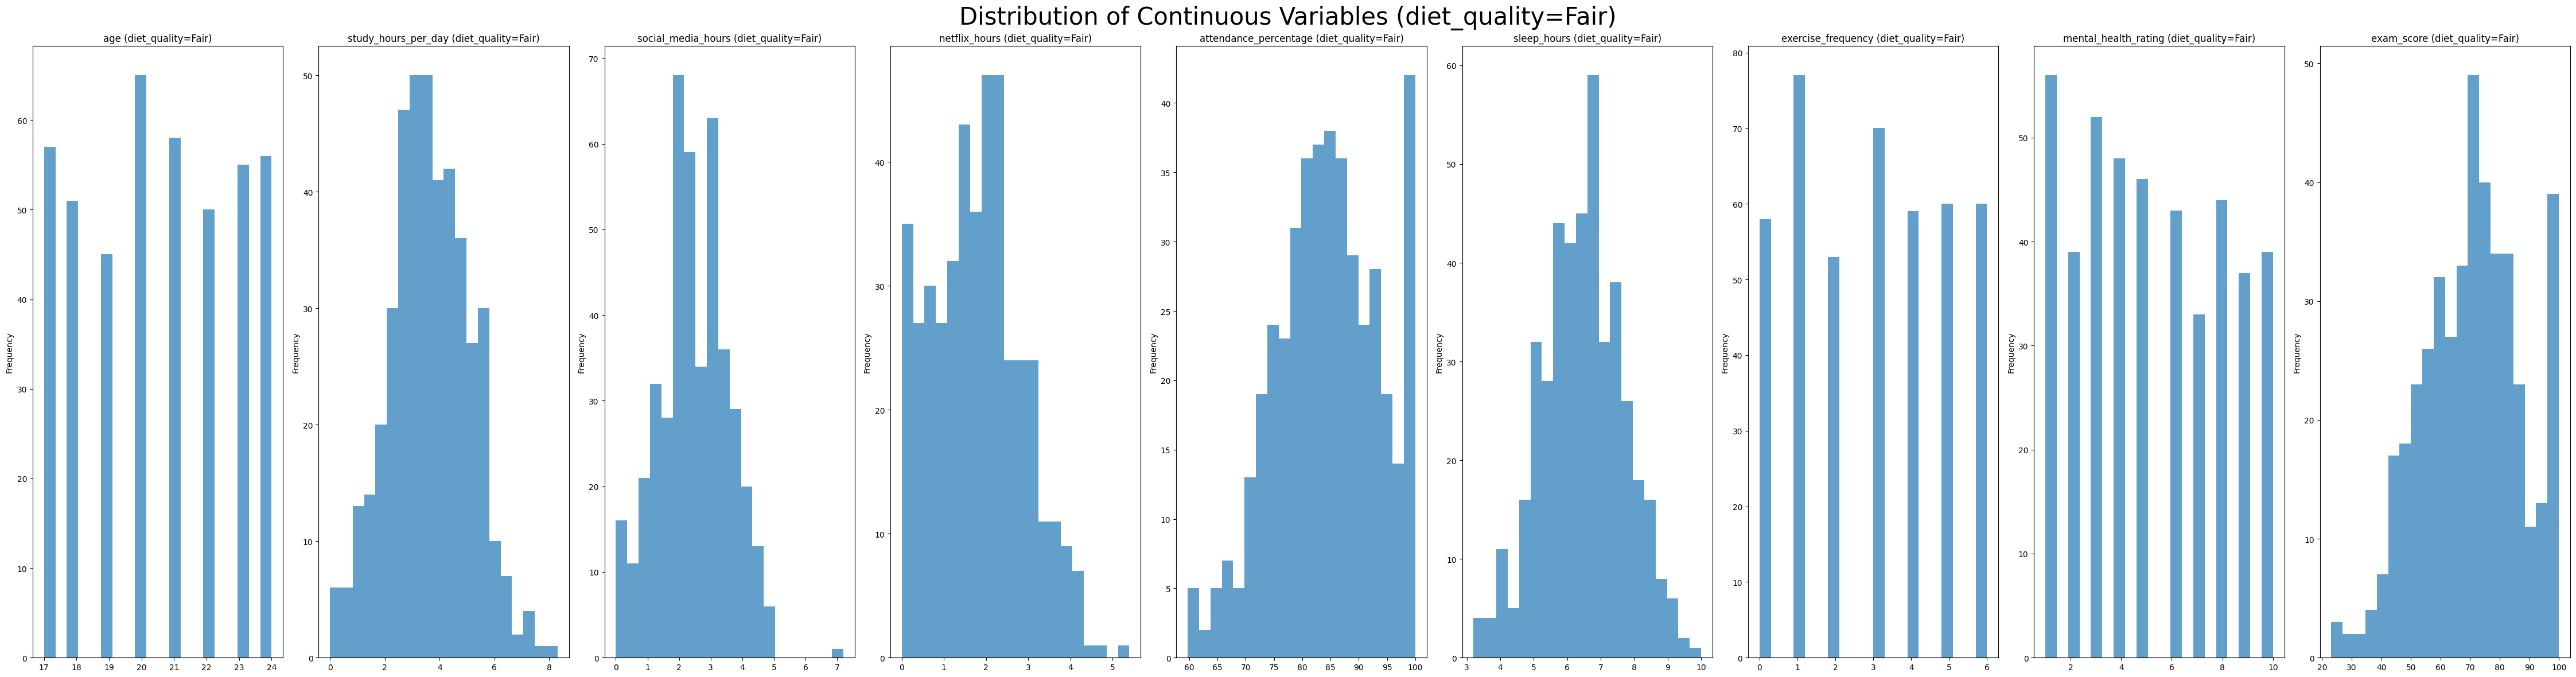

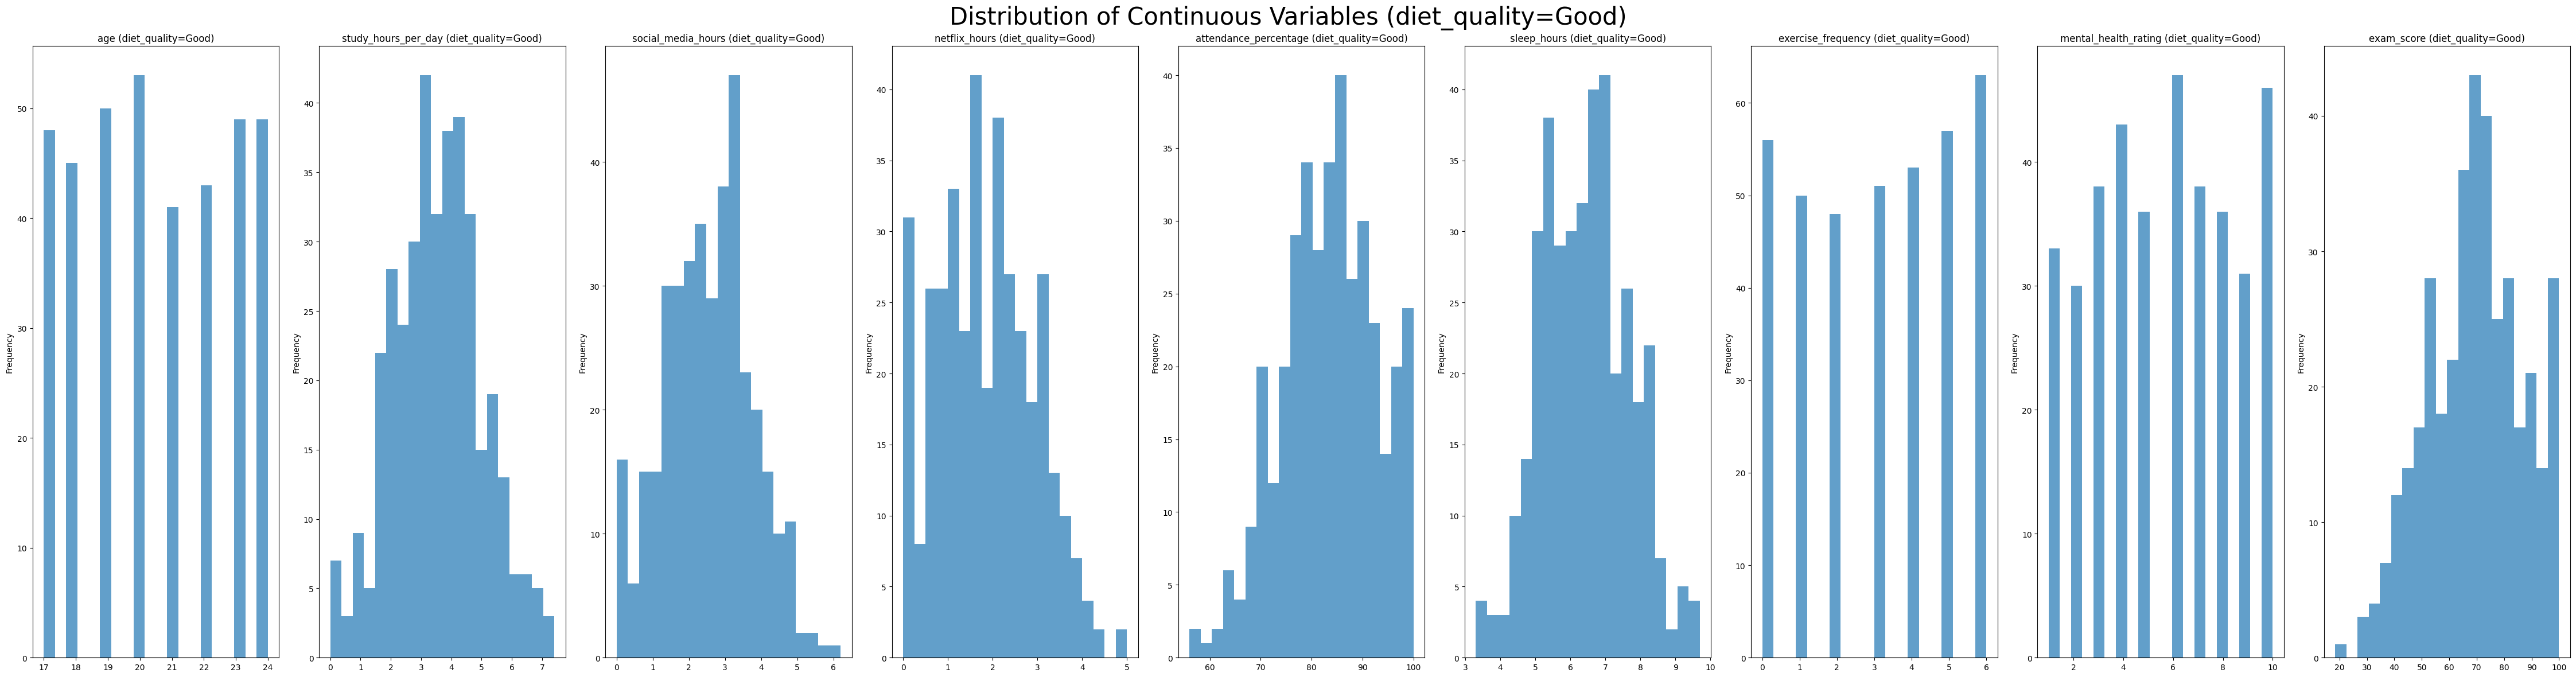

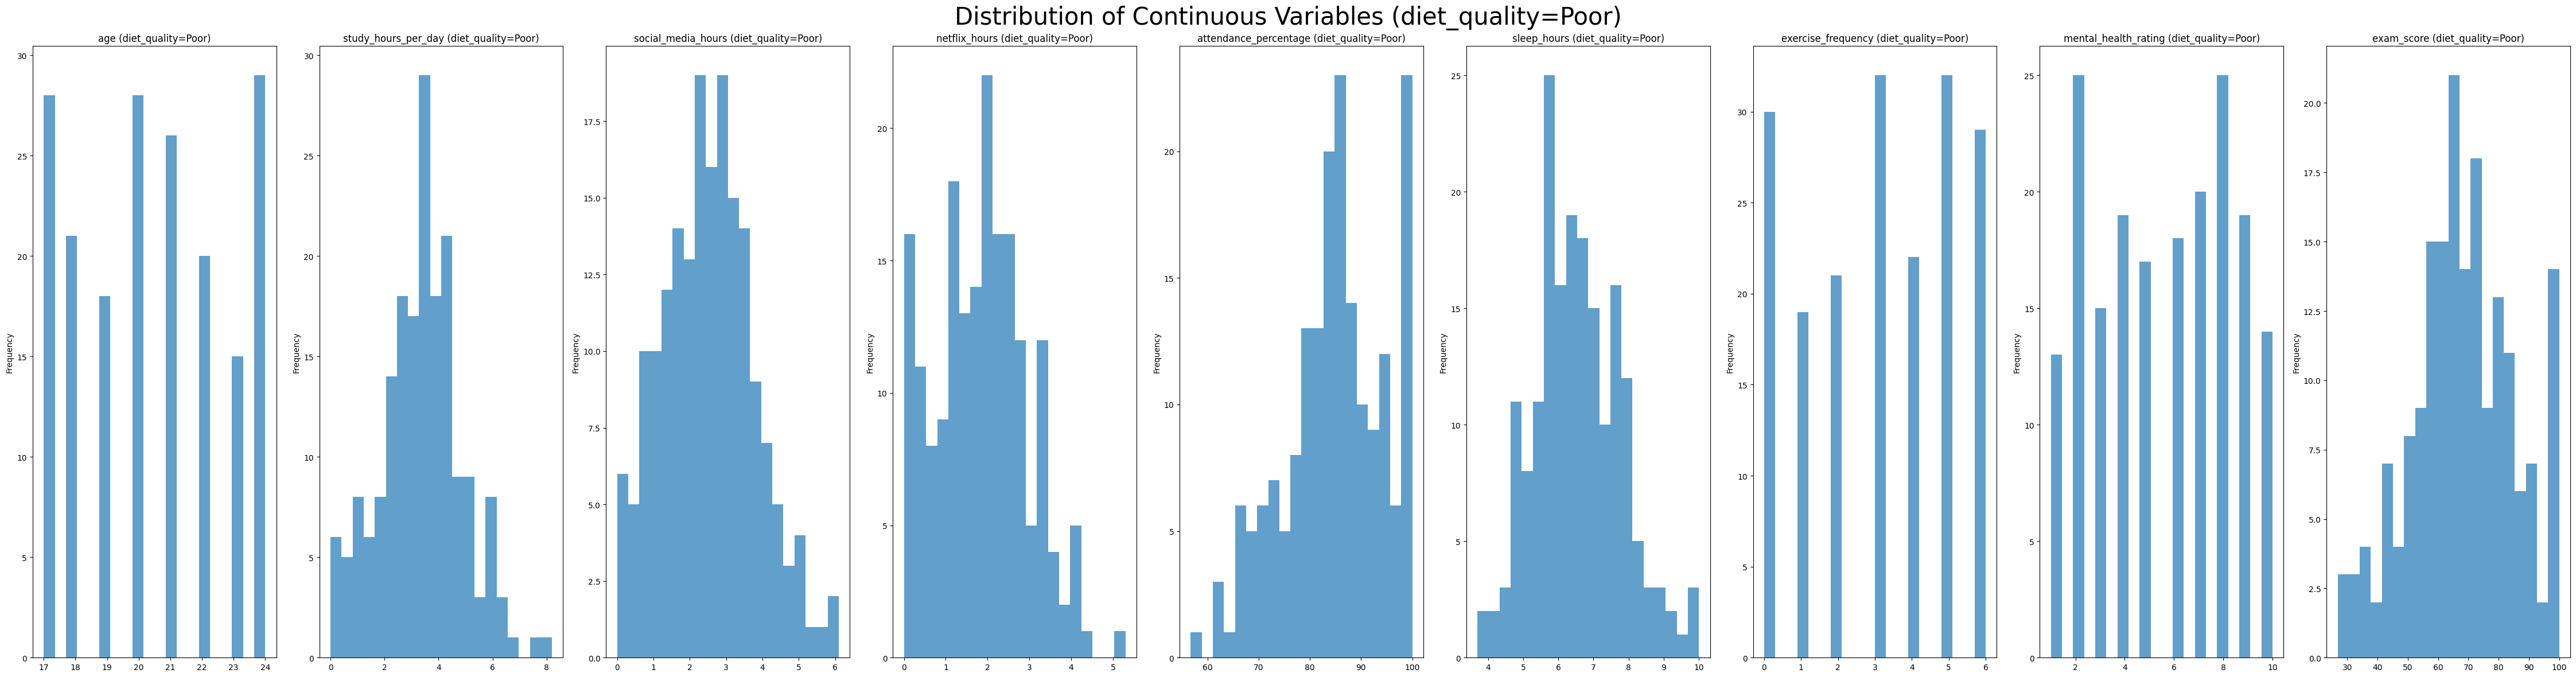

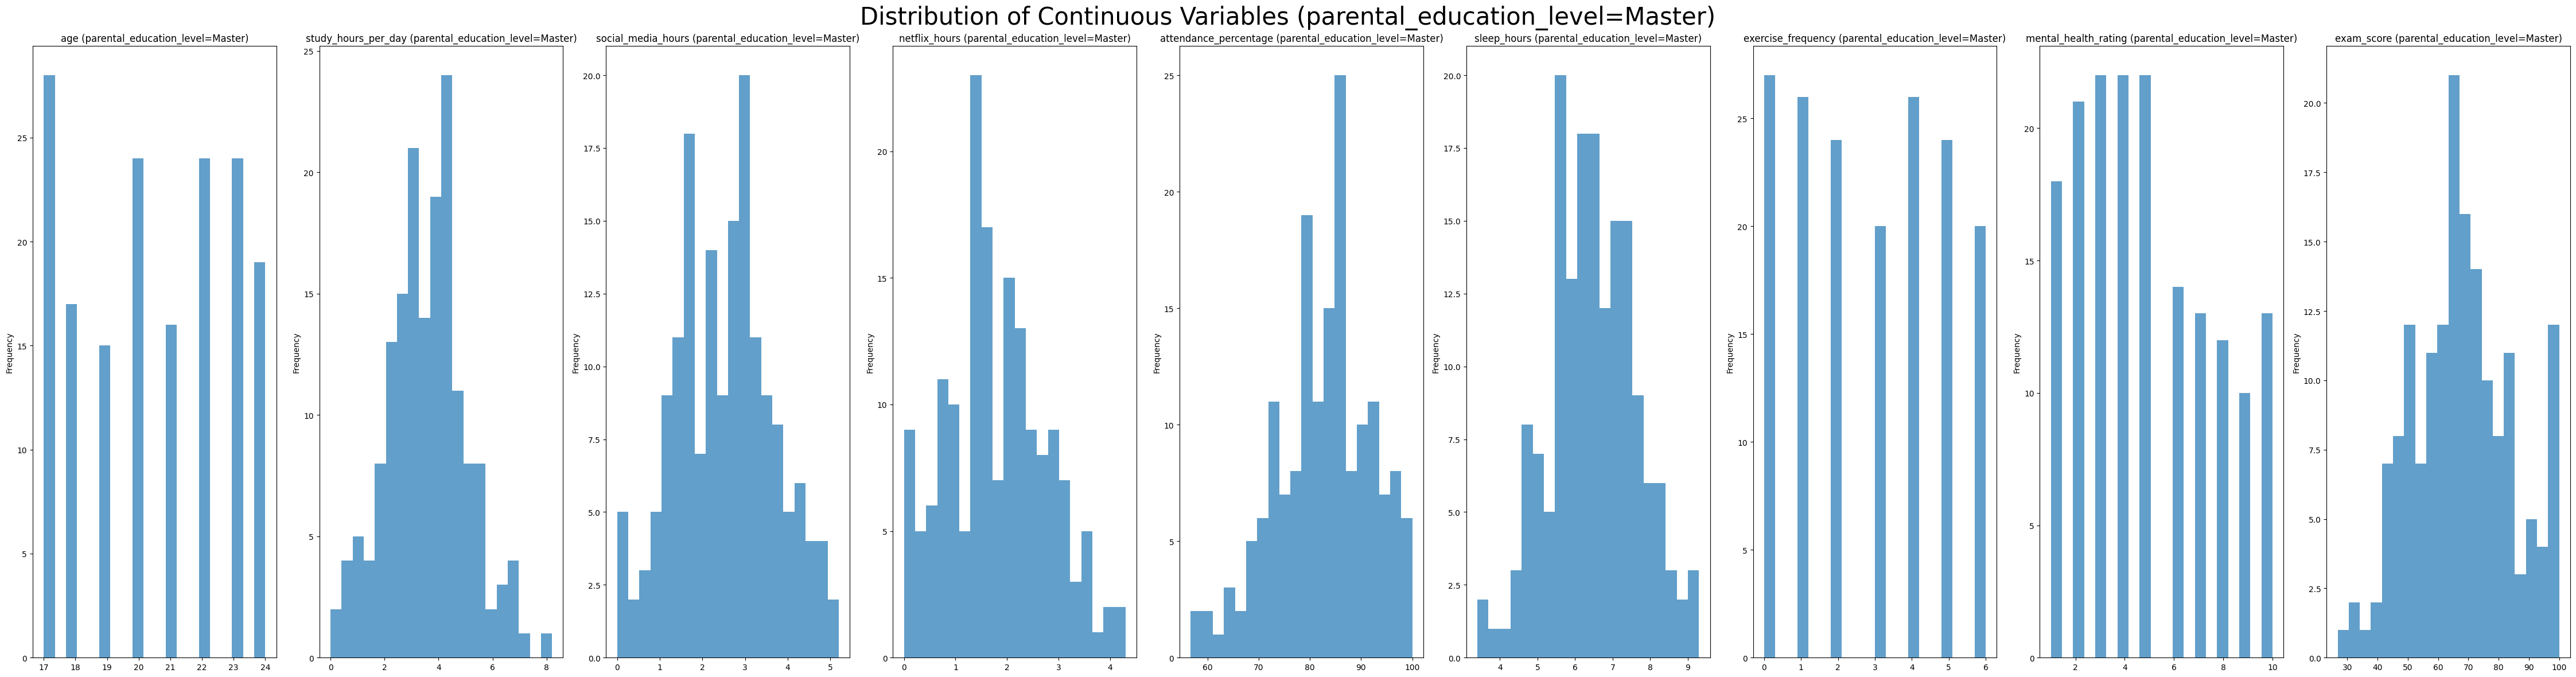

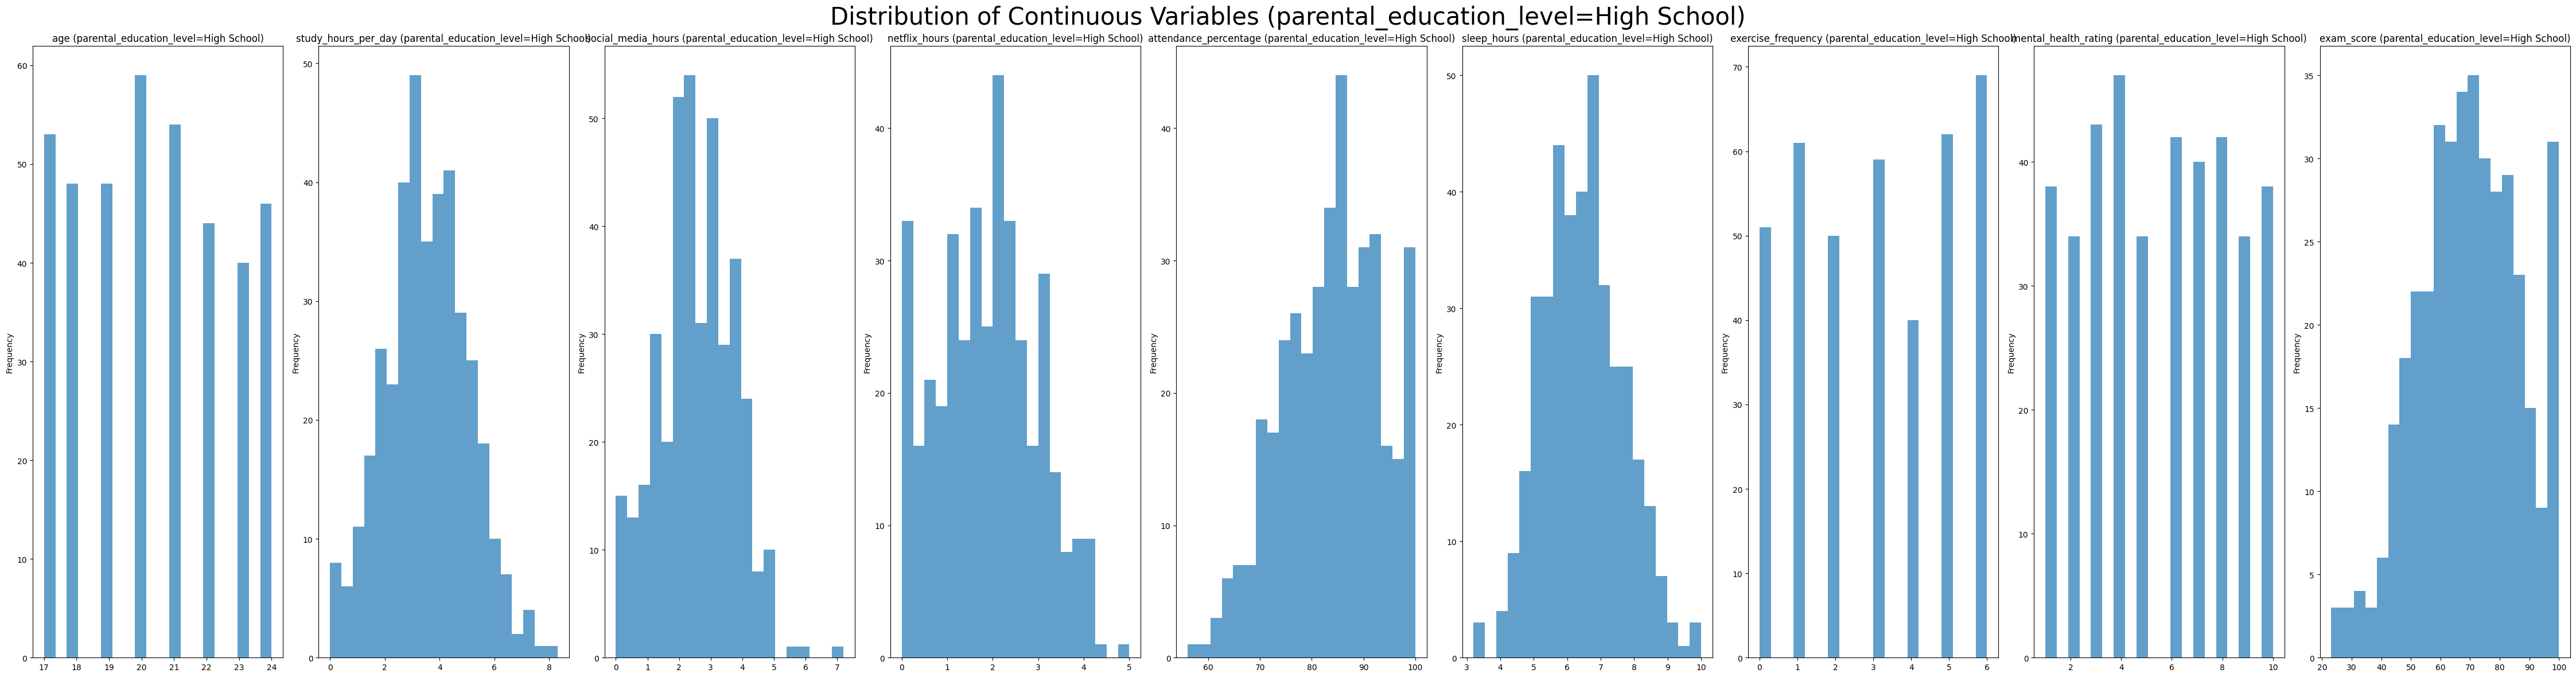

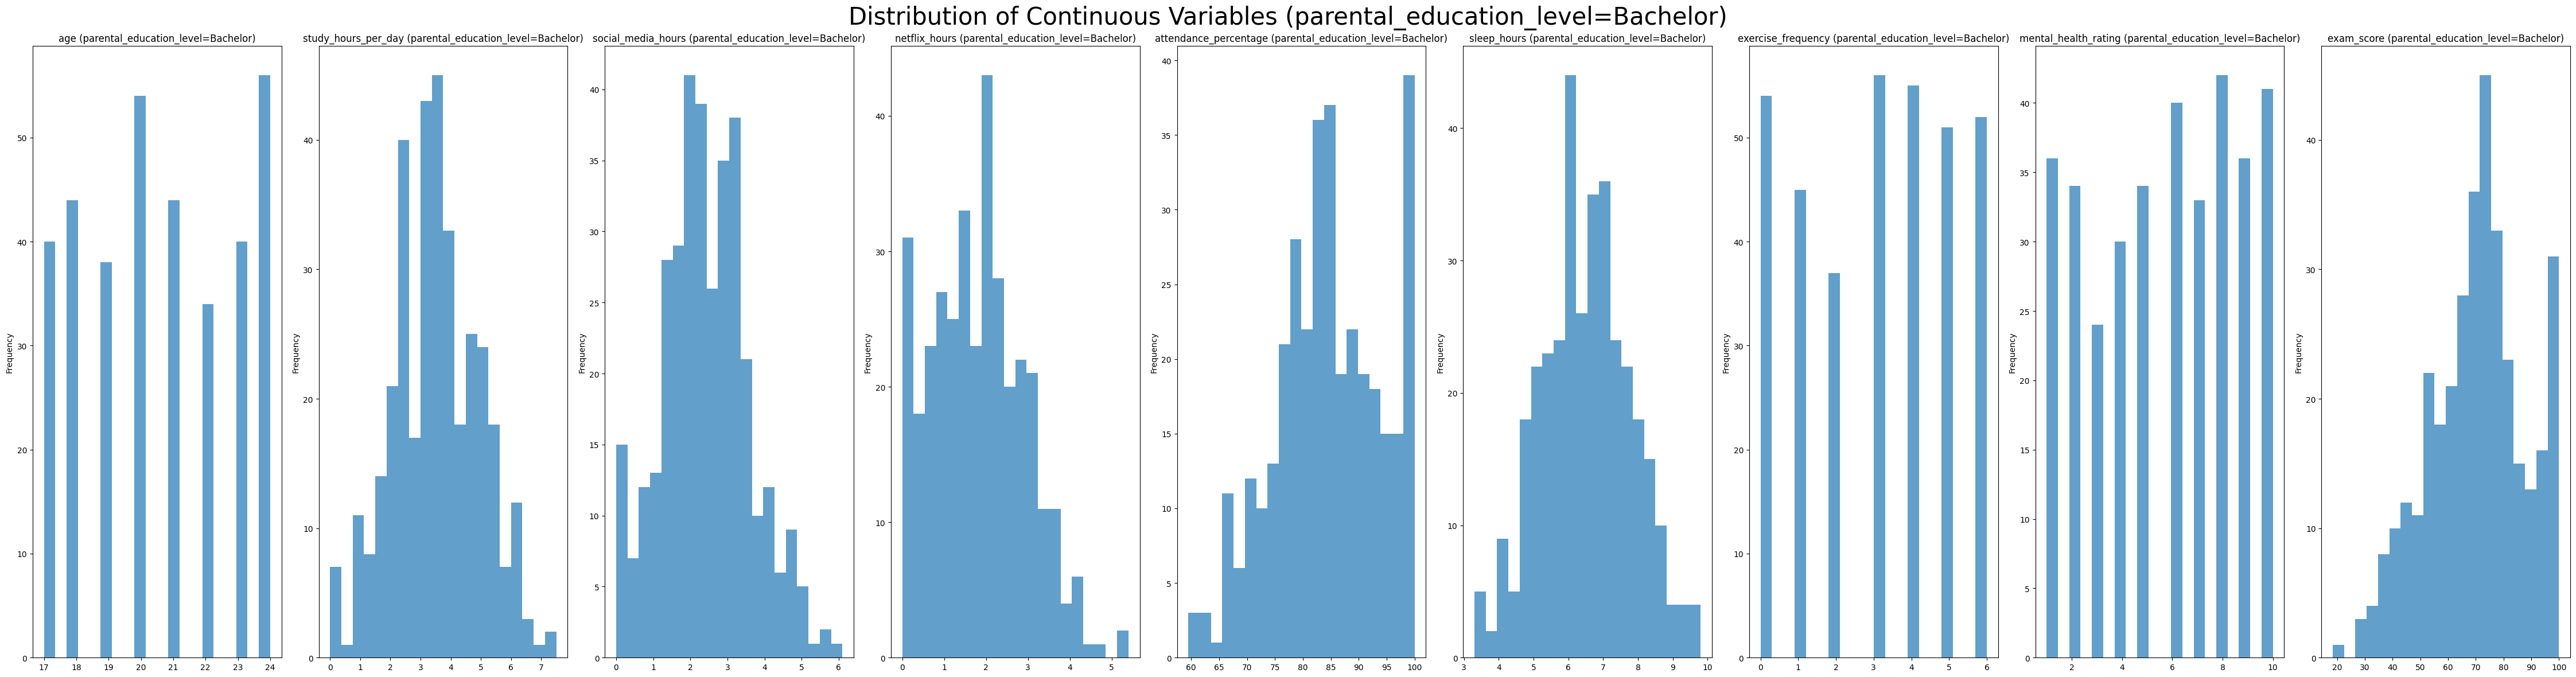

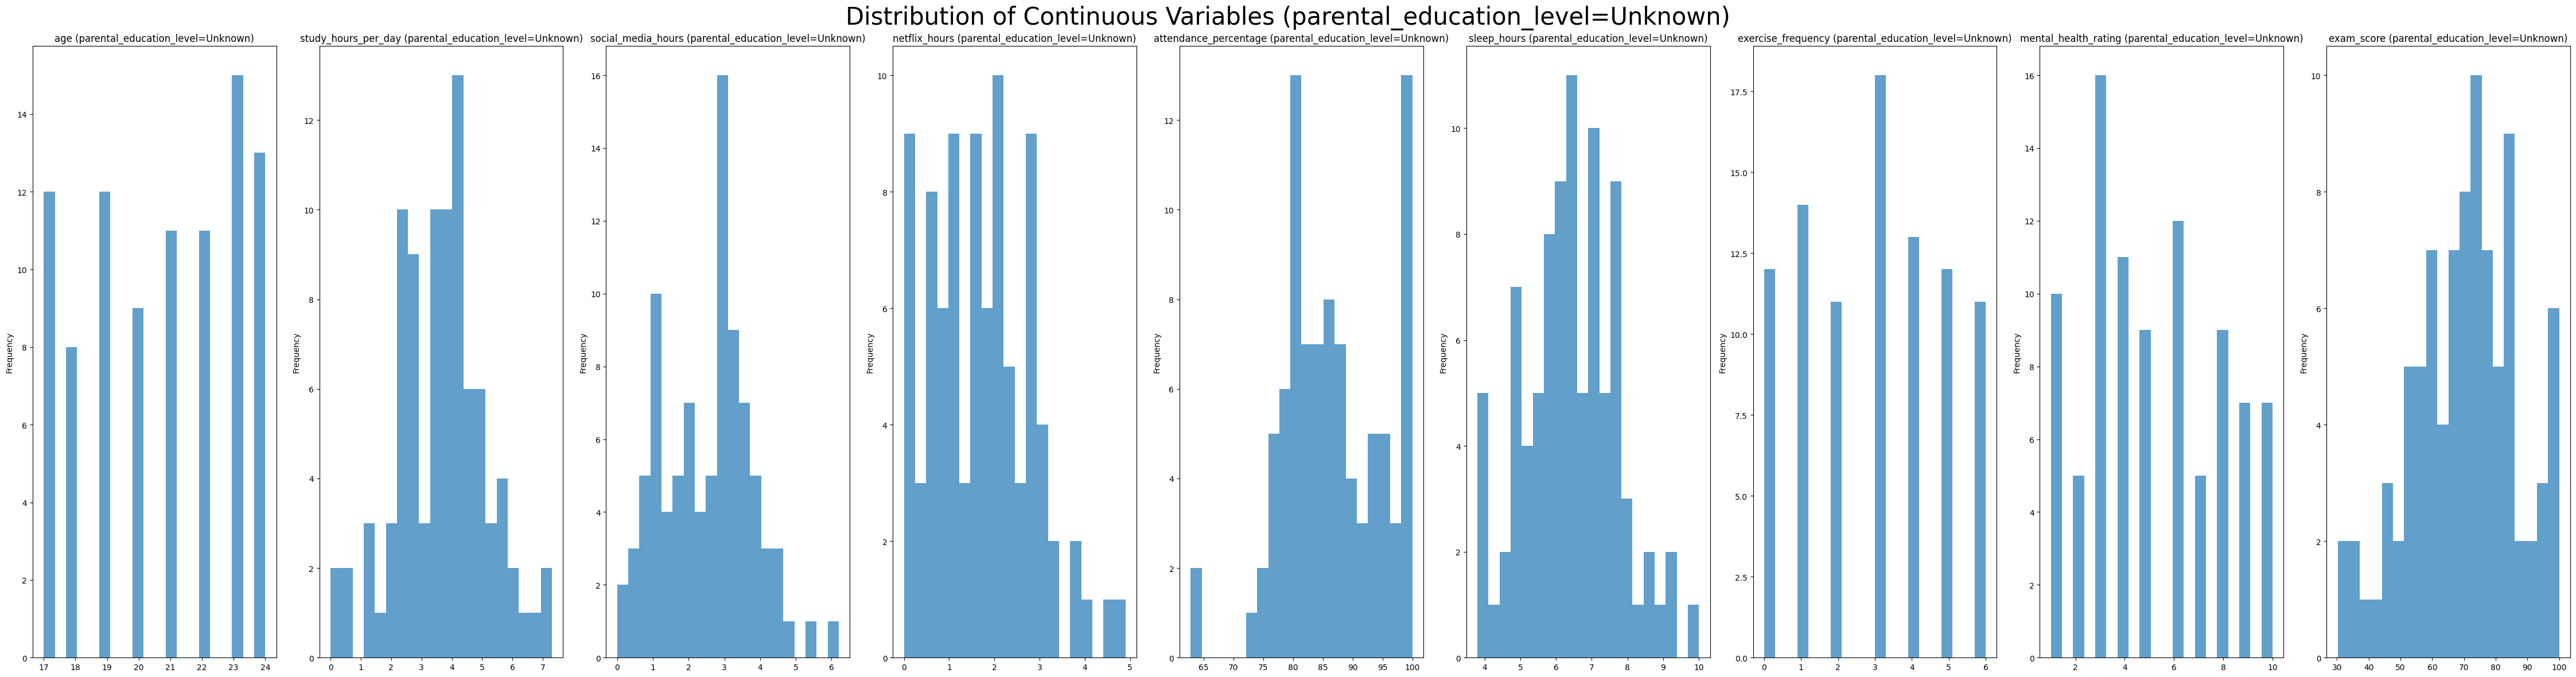

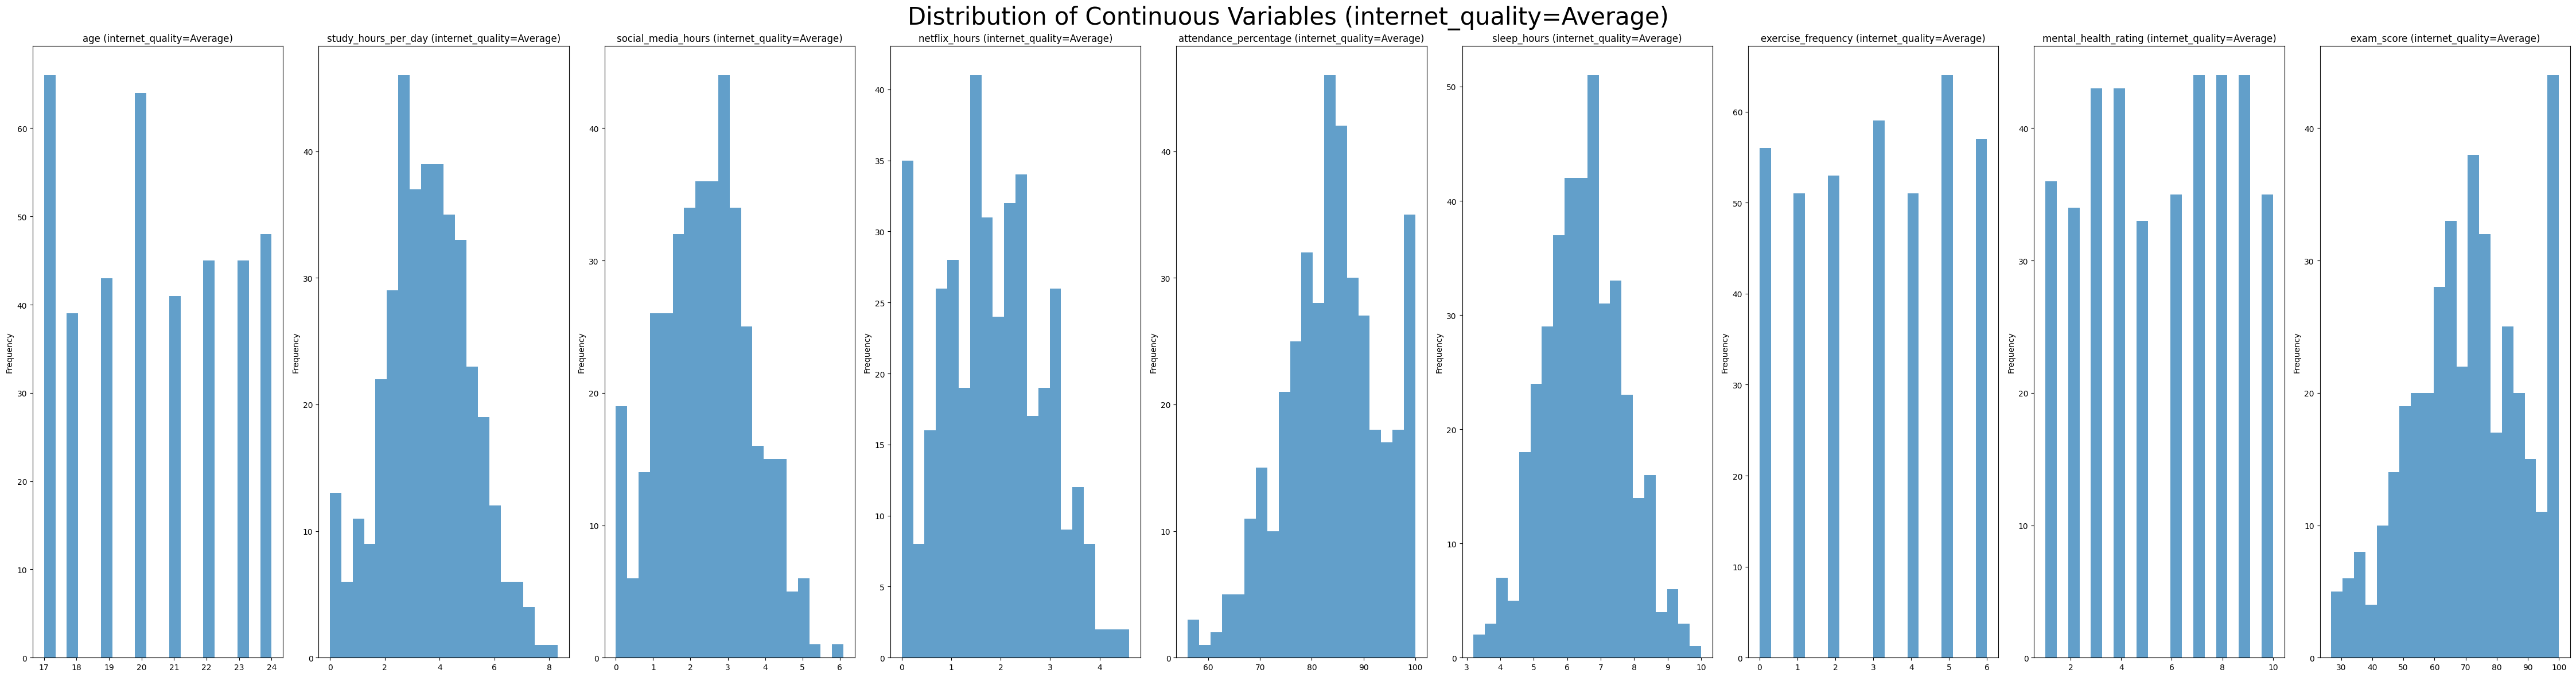

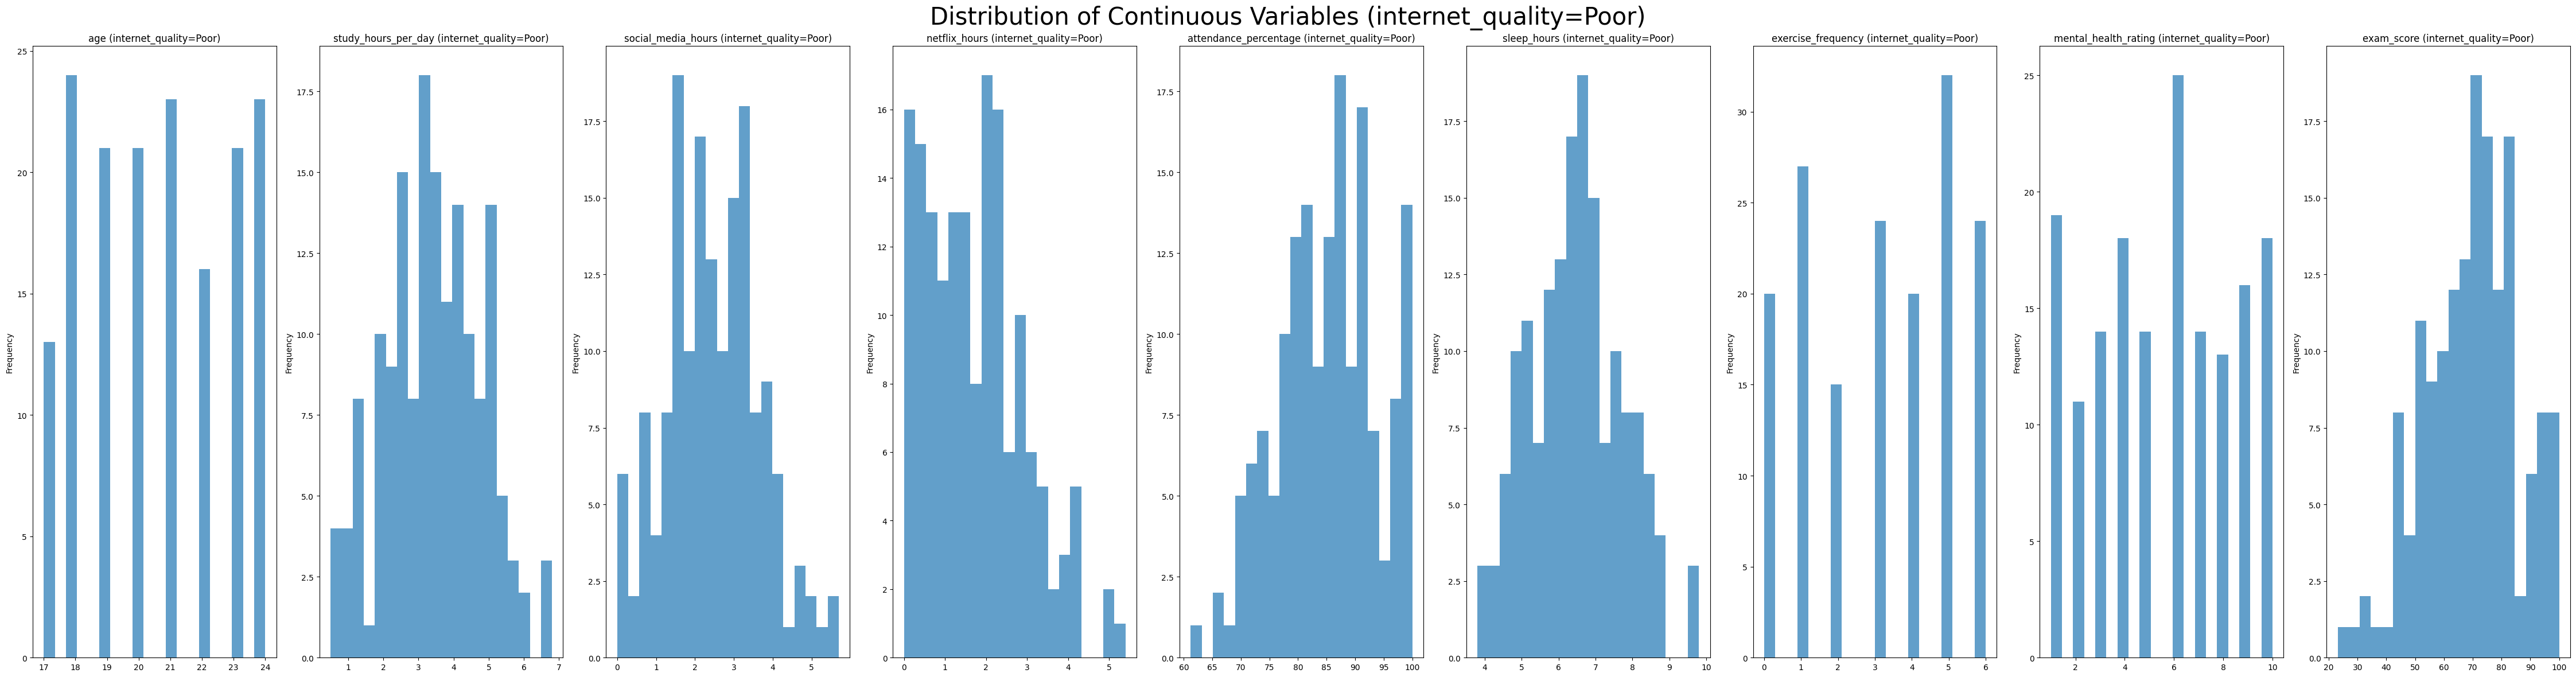

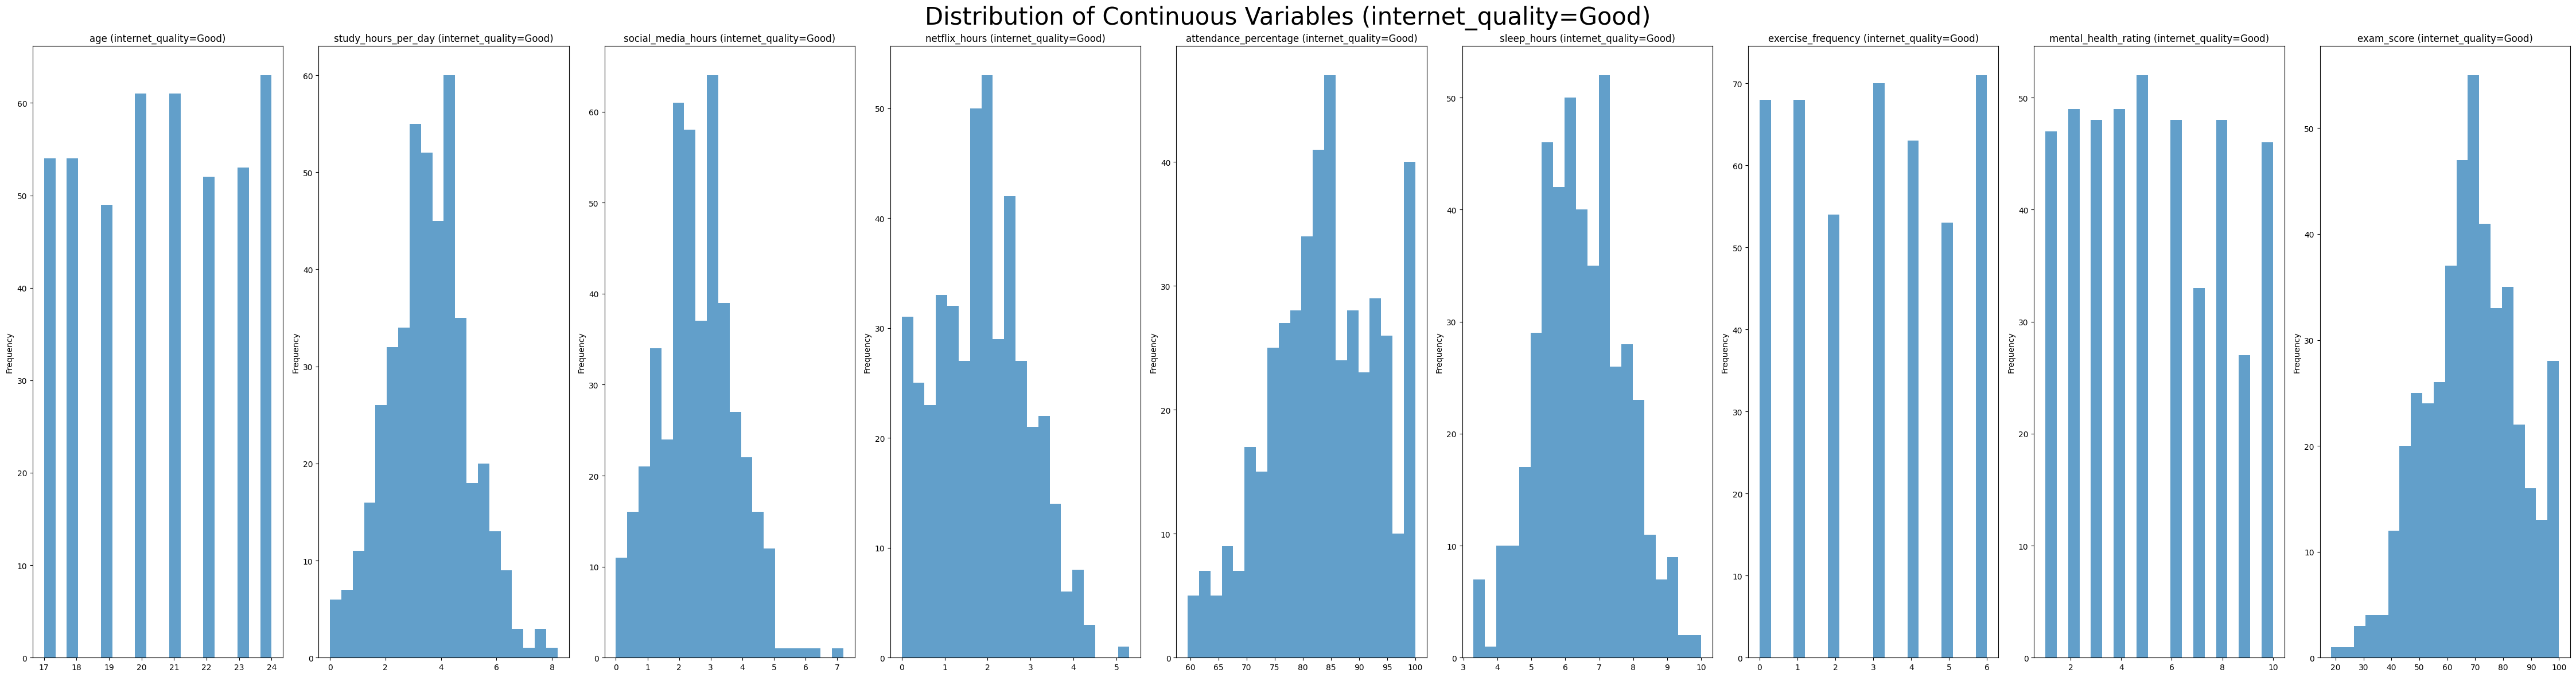

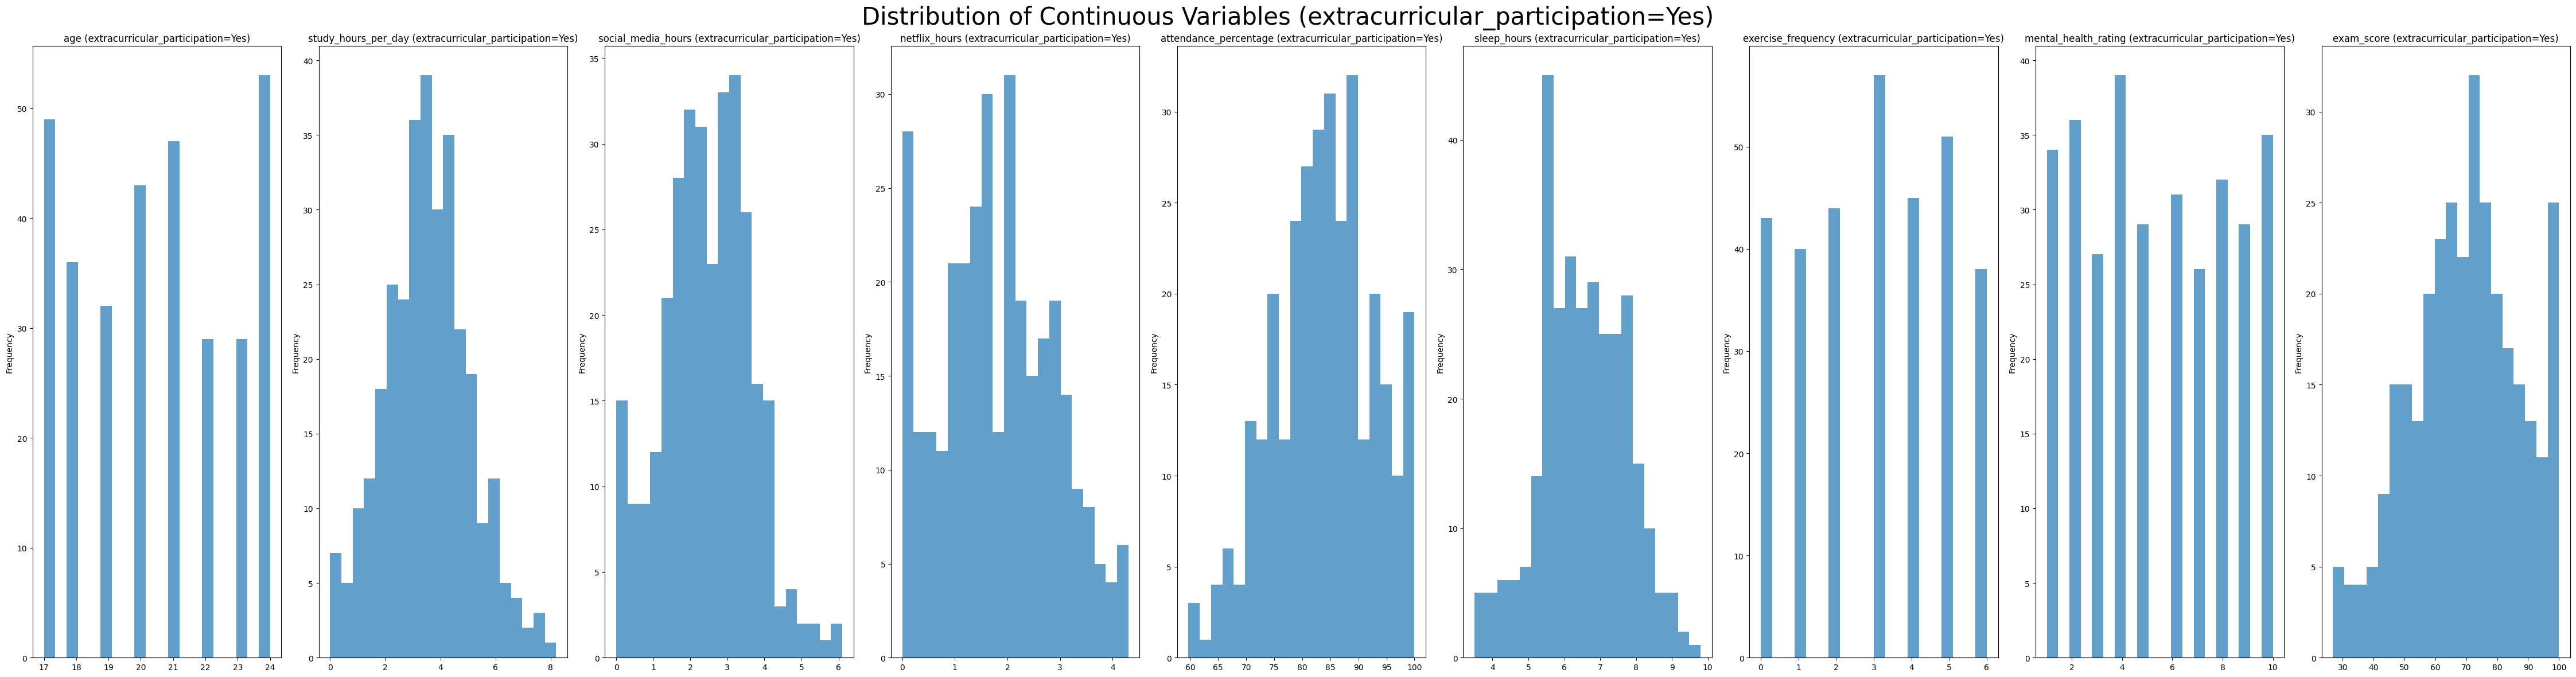

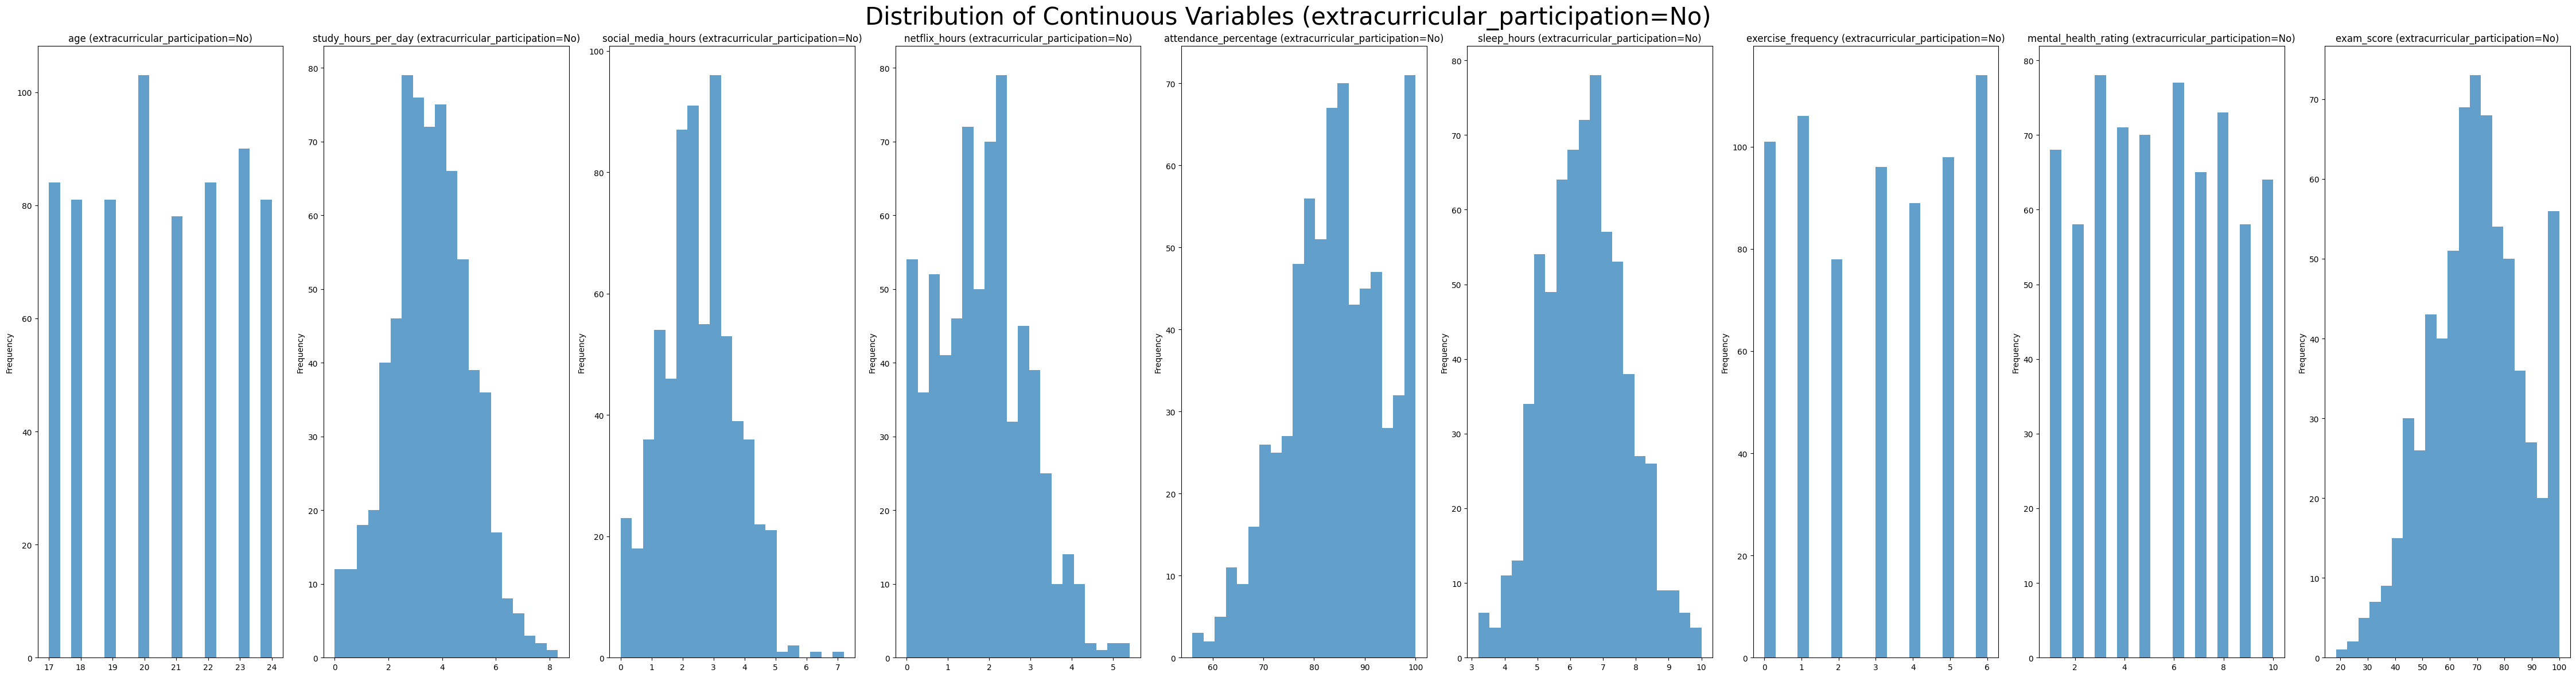

In [55]:
# Group by each object variable and plot histograms for each group
import matplotlib.pyplot as plt

object_cols = df.select_dtypes(include='object').columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for obj_col in object_cols:
    unique_vals = df[obj_col].dropna().unique()
    for val in unique_vals:
        group = df[df[obj_col] == val]
        fig, axs = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(5*len(continuous_cols), 12))
        fig.suptitle(f"Distribution of Continuous Variables ({obj_col}={val})", fontsize=30)
        if len(continuous_cols) == 1:
            axs = [axs]
        for i, cont_col in enumerate(continuous_cols):
            group[cont_col].plot(kind='hist', ax=axs[i], bins=20, alpha=0.7)
            axs[i].set_title(f"{cont_col} ({obj_col}={val})")
        plt.tight_layout()
        plt.show()

C:\Users\escob\AppData\Local\Temp\ipykernel_27960\4101645406.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


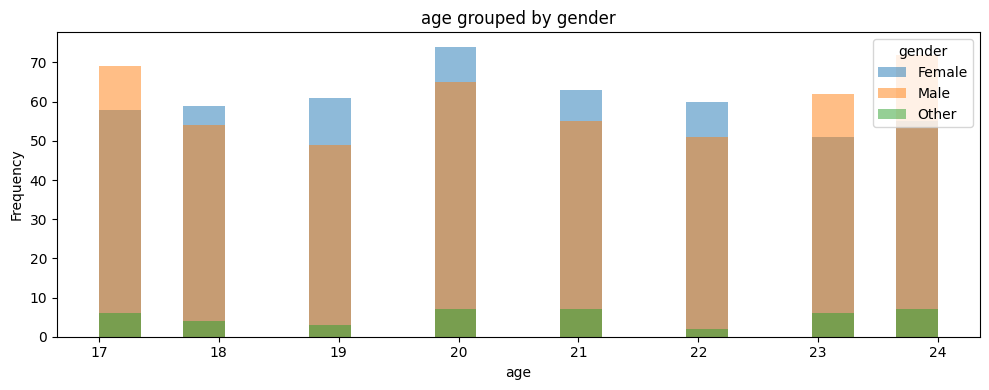

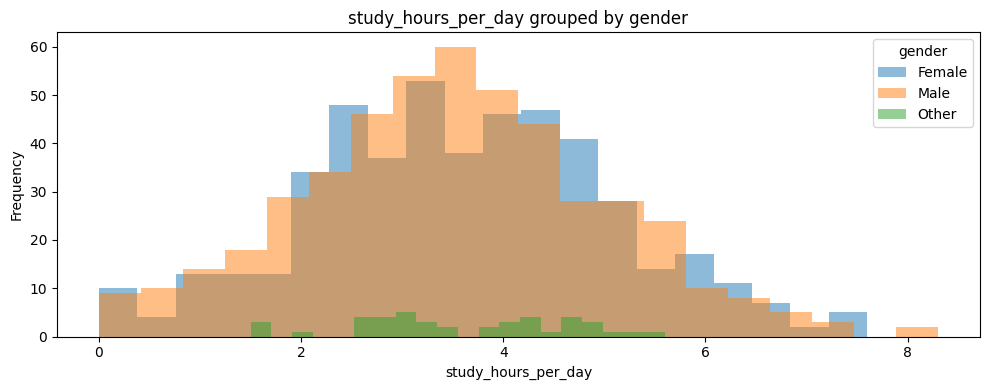

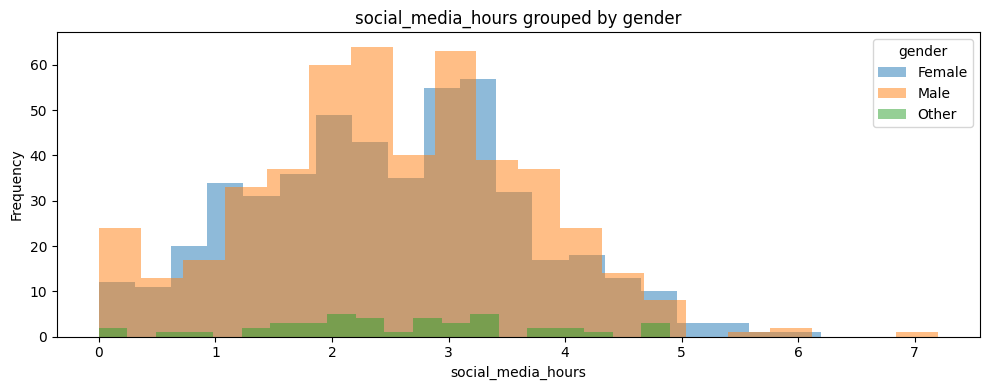

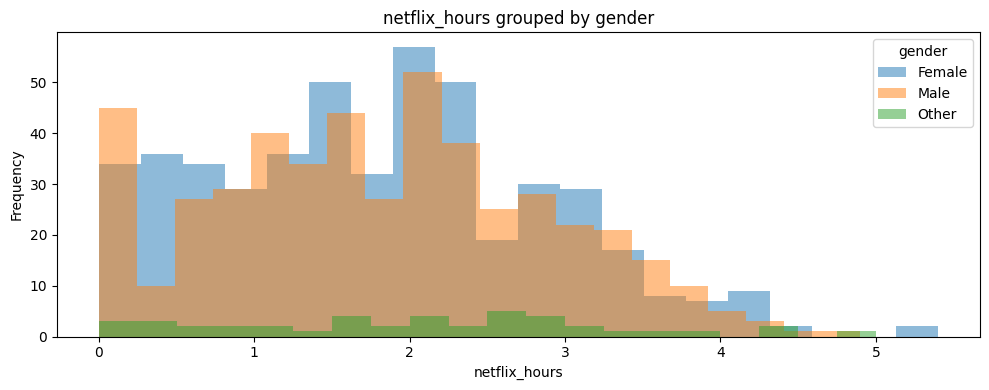

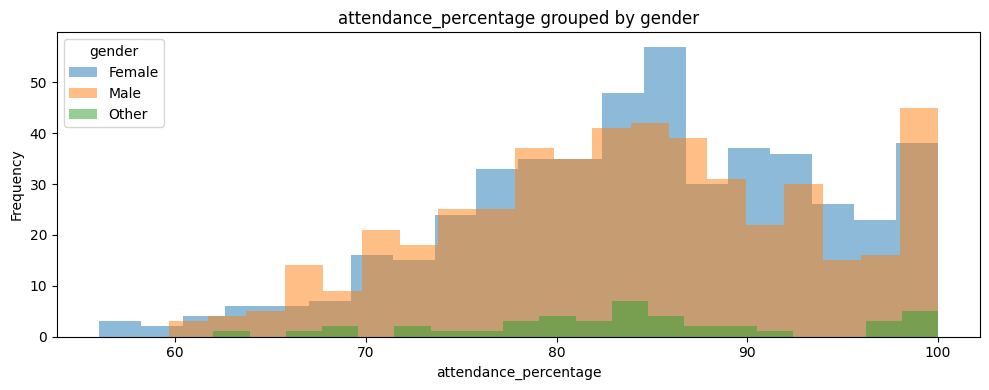

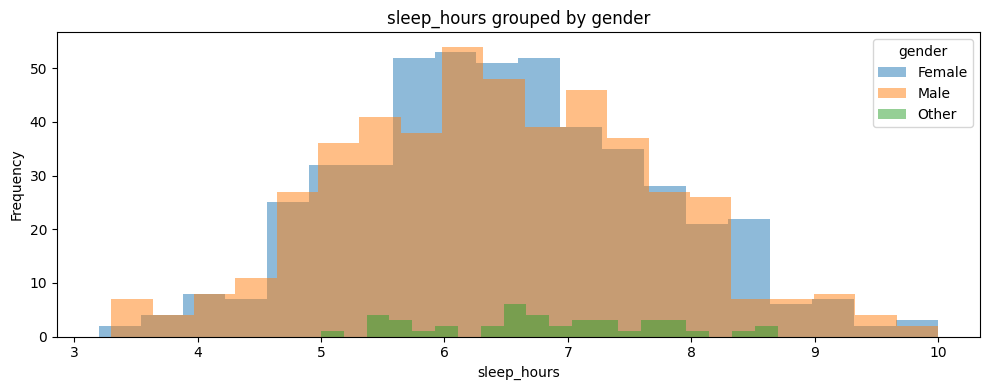

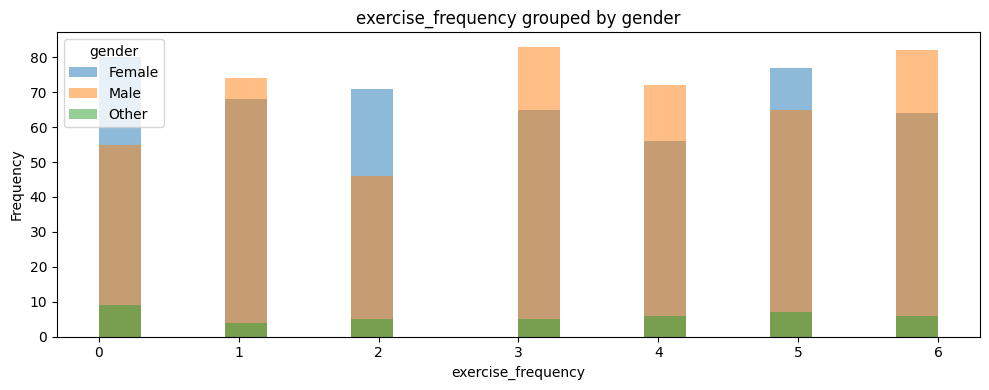

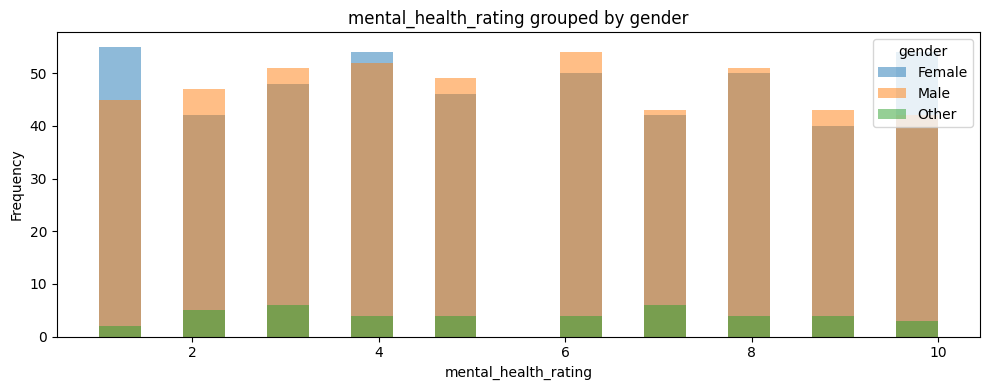

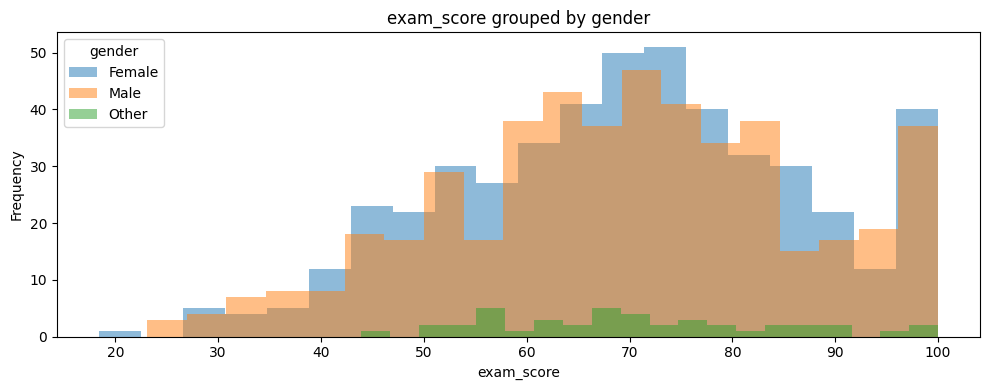

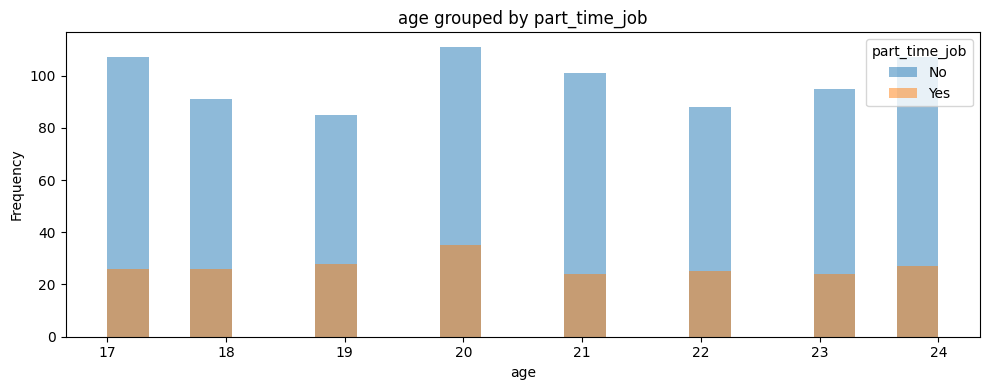

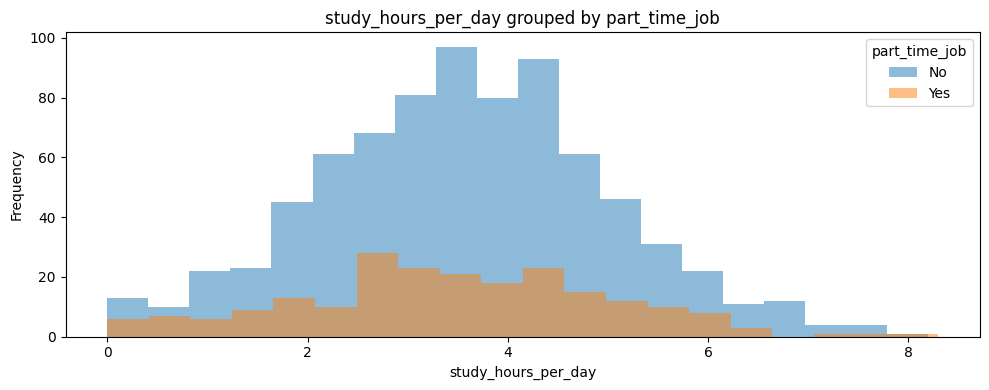

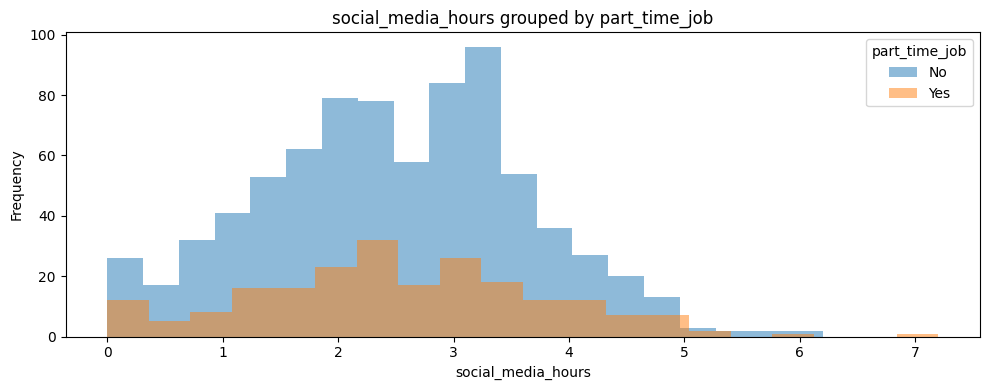

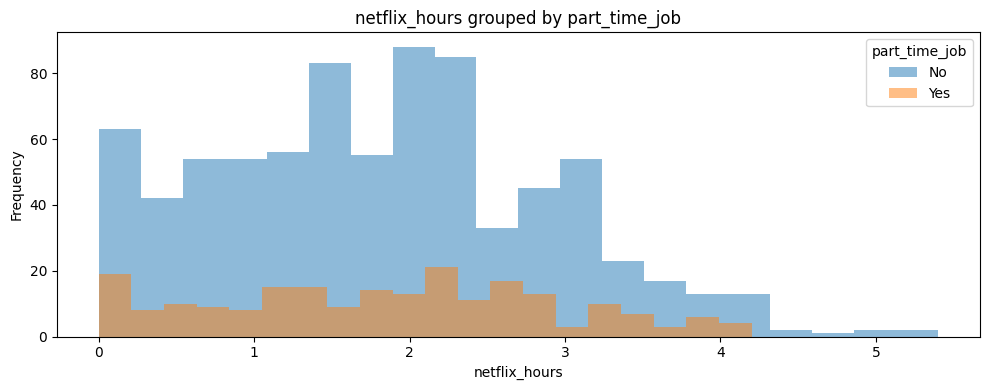

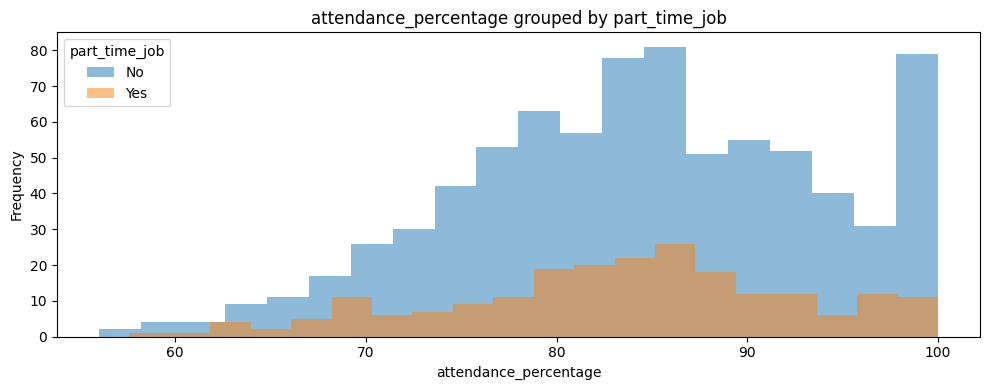

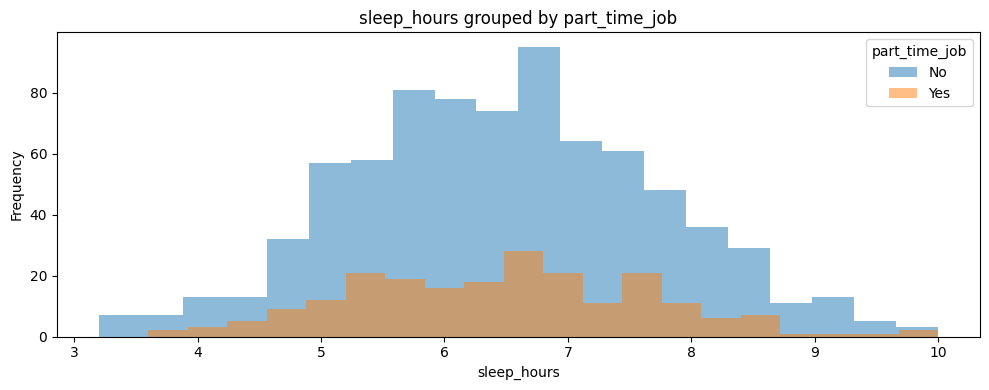

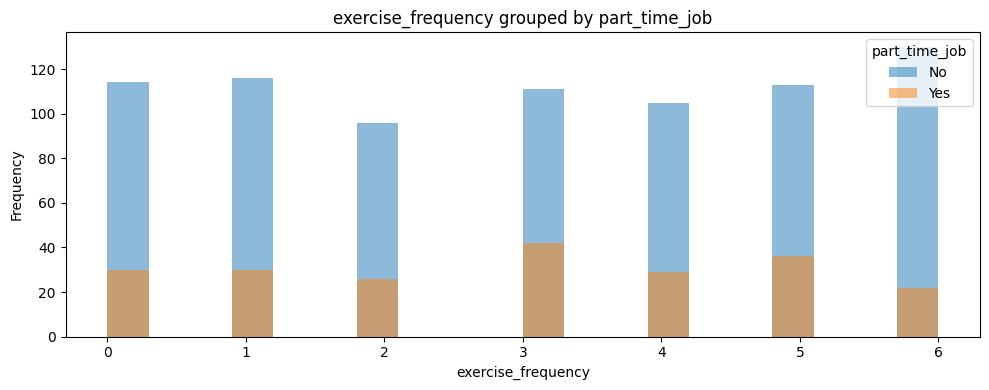

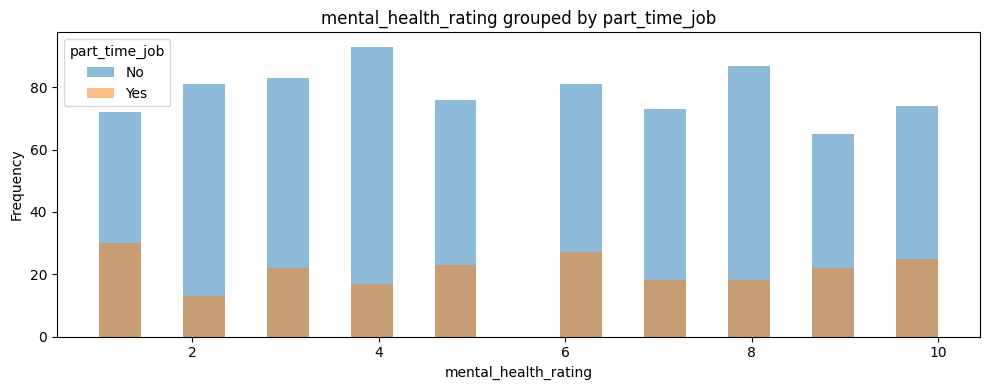

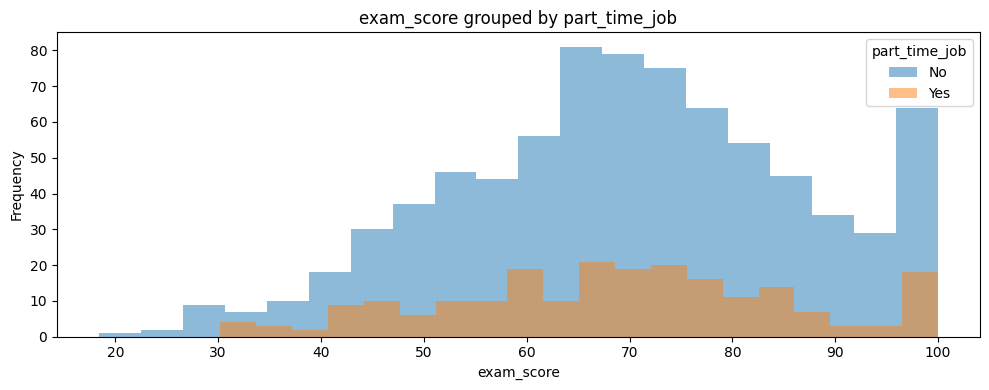

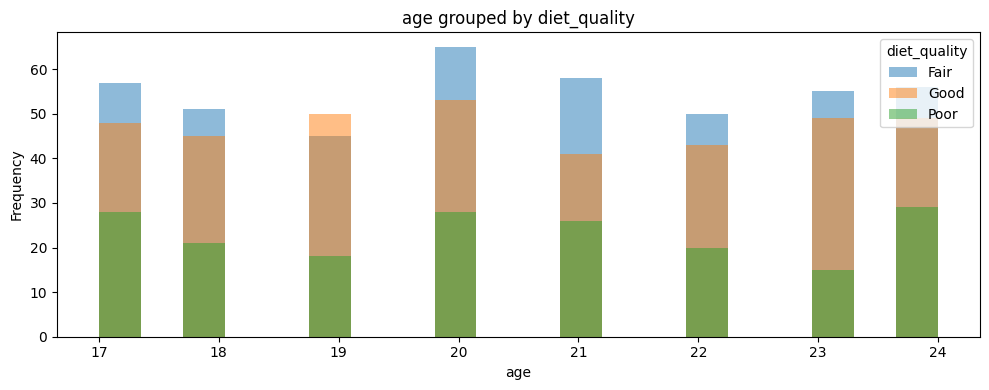

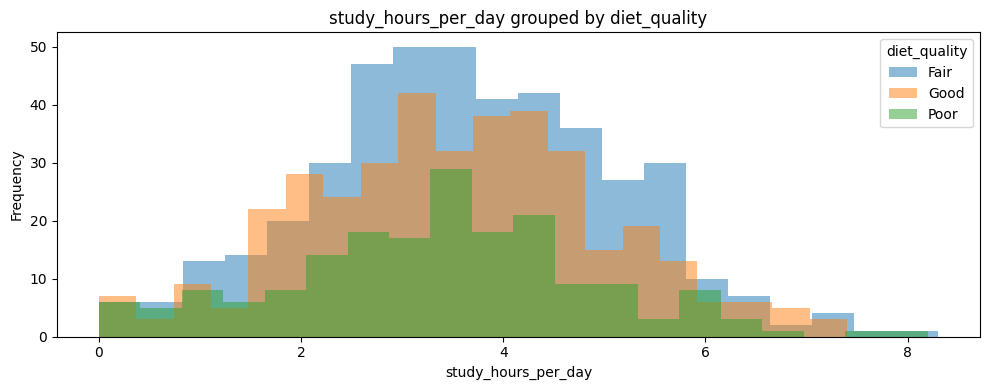

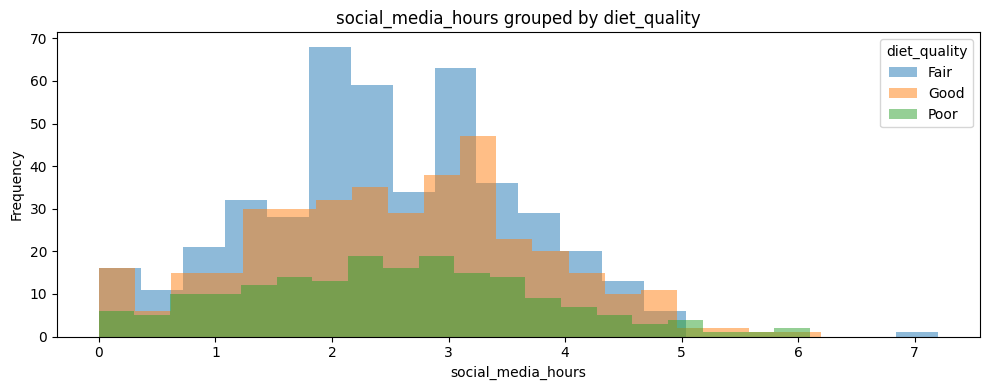

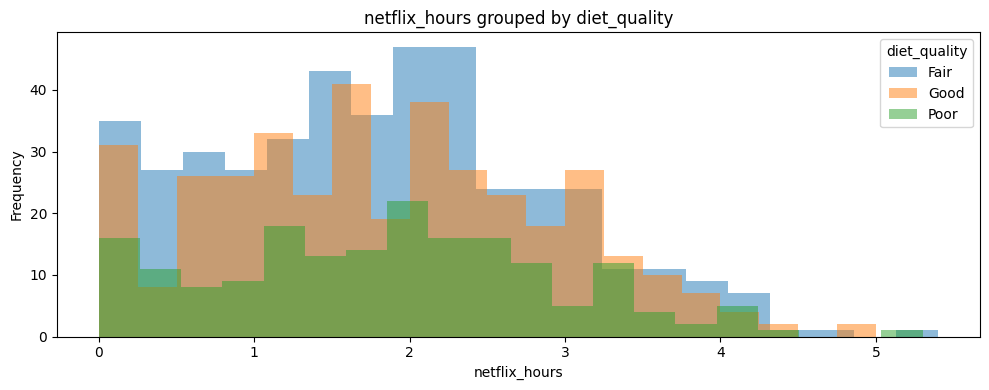

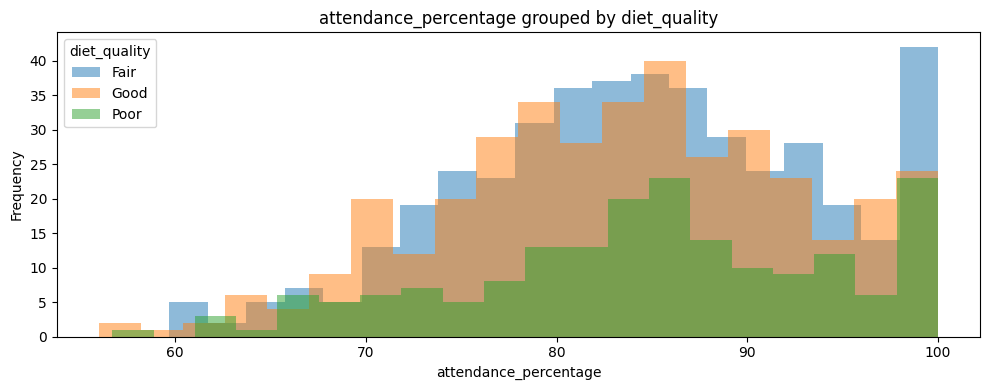

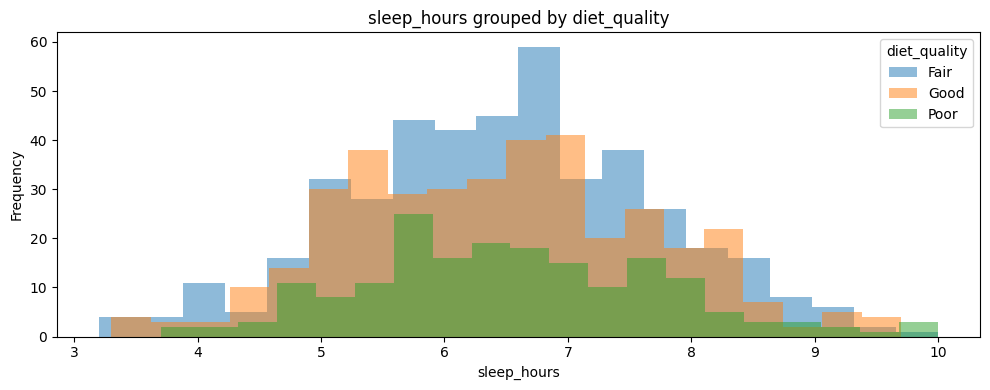

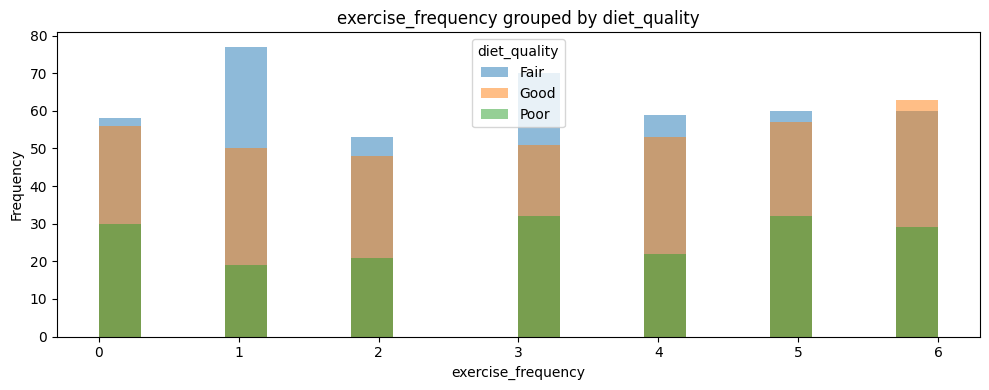

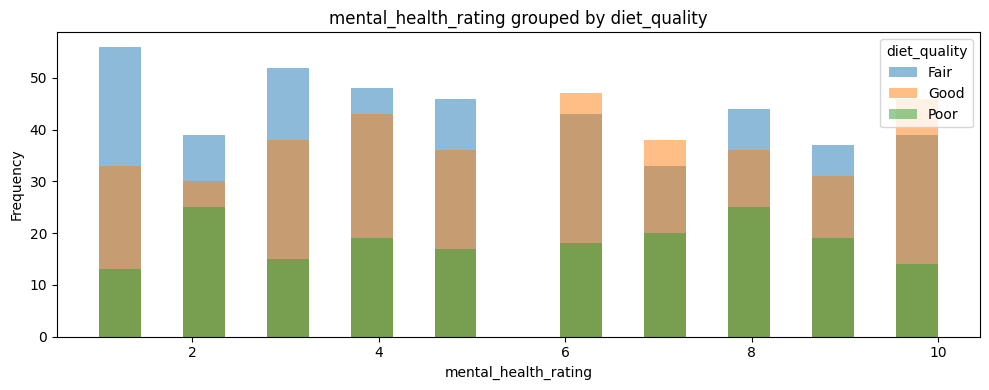

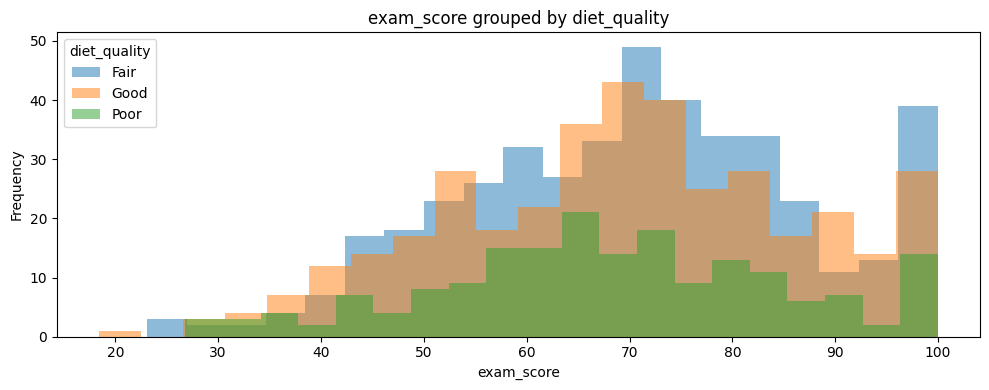

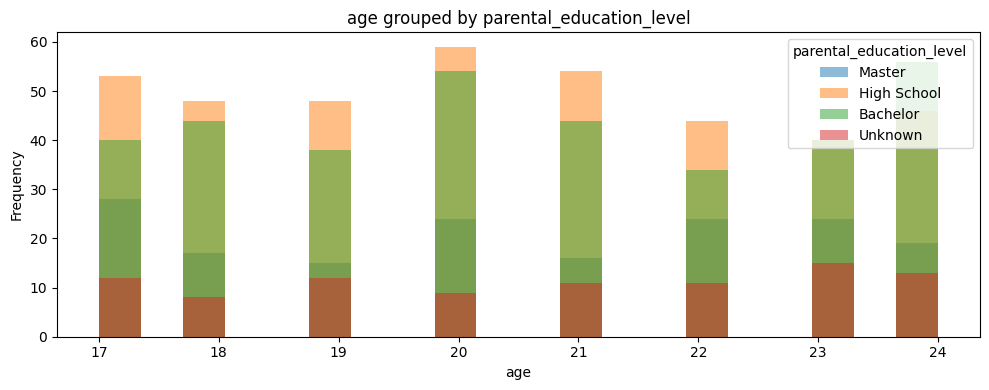

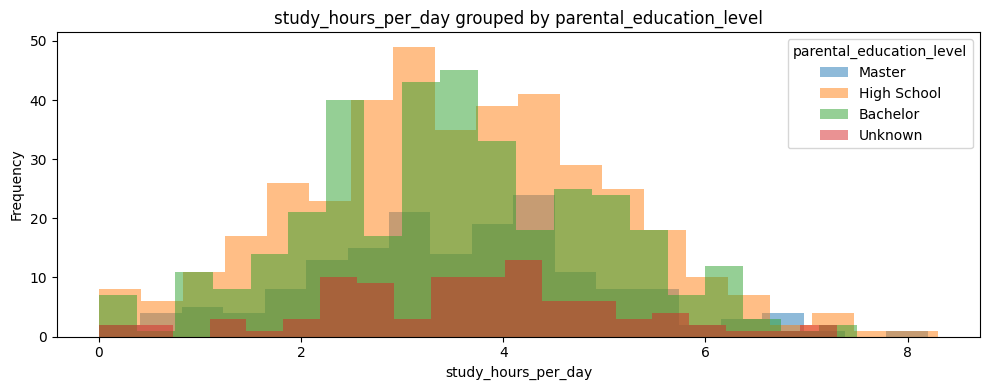

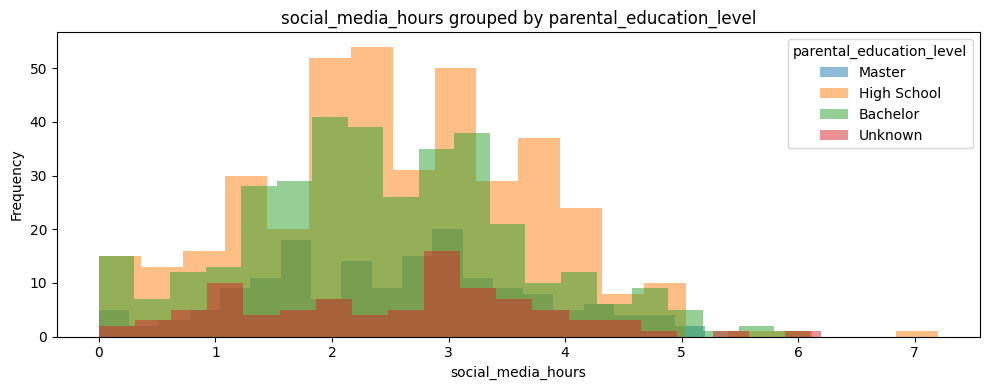

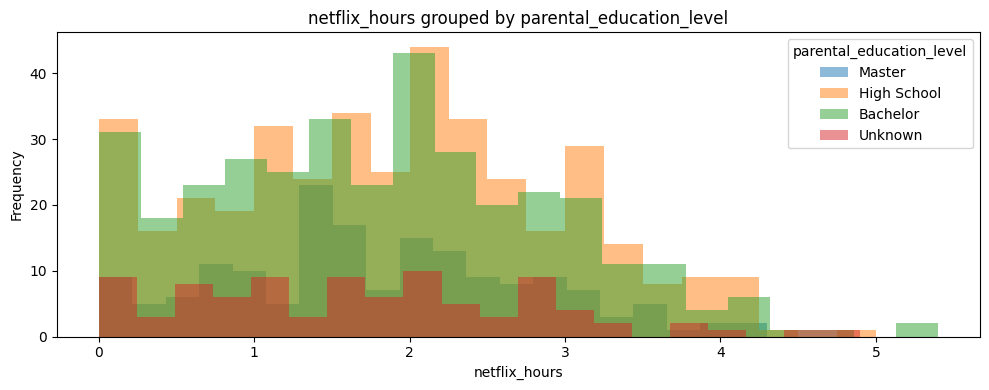

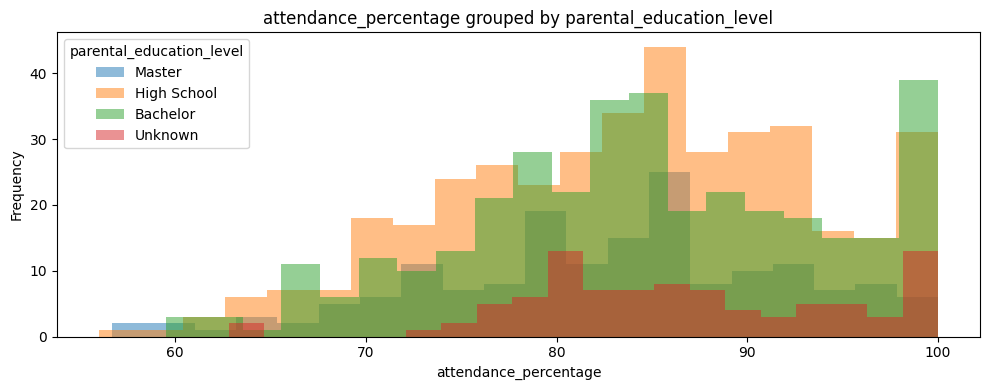

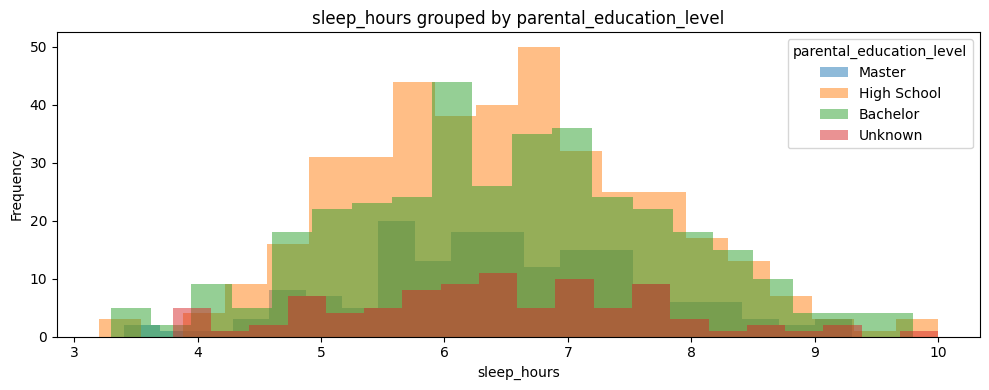

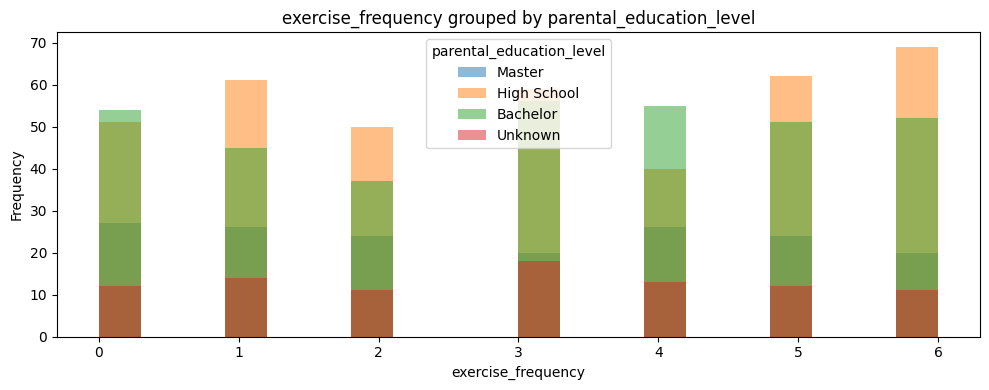

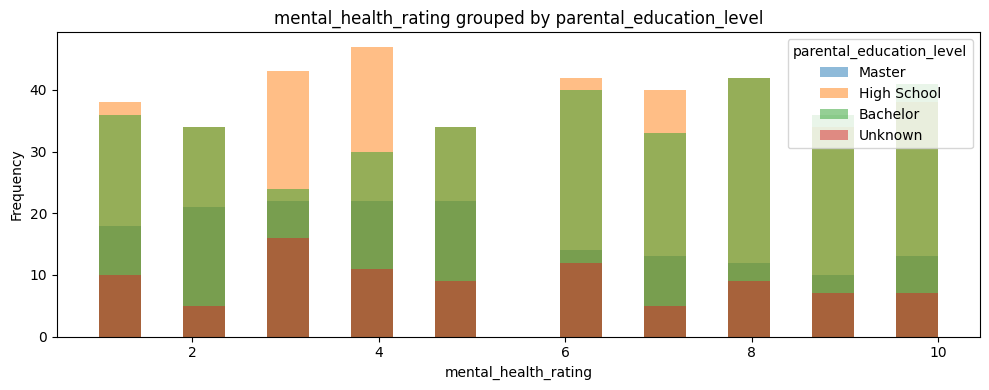

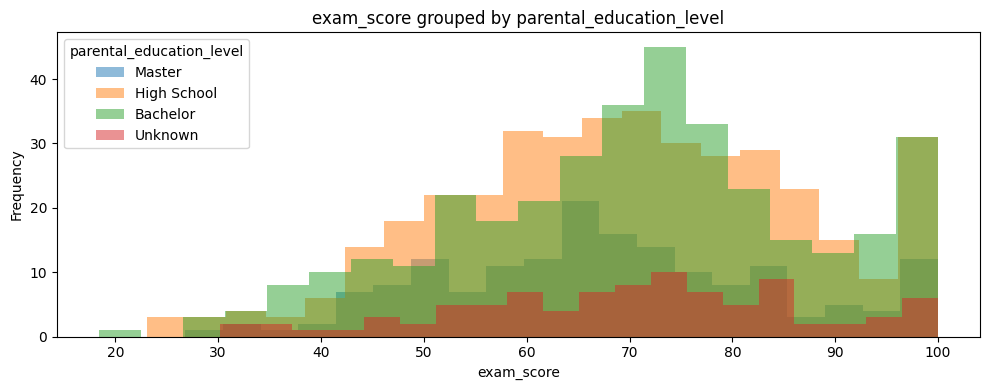

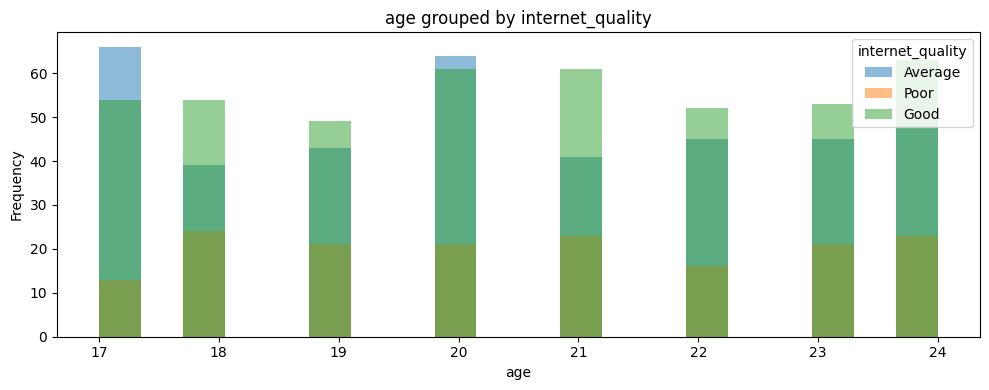

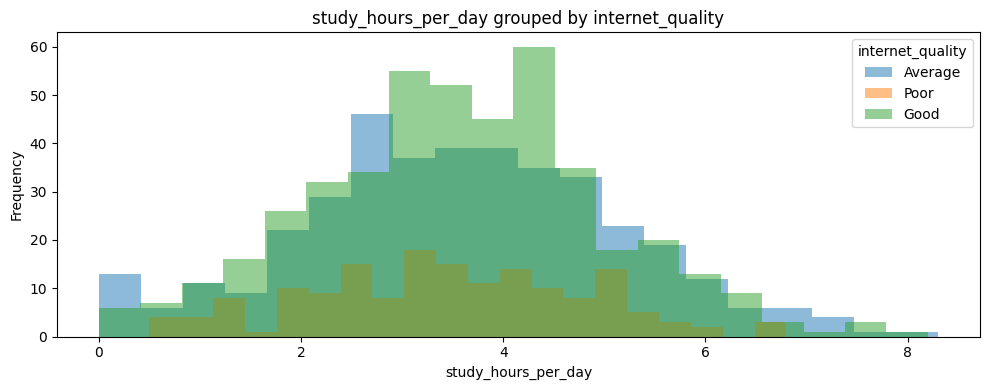

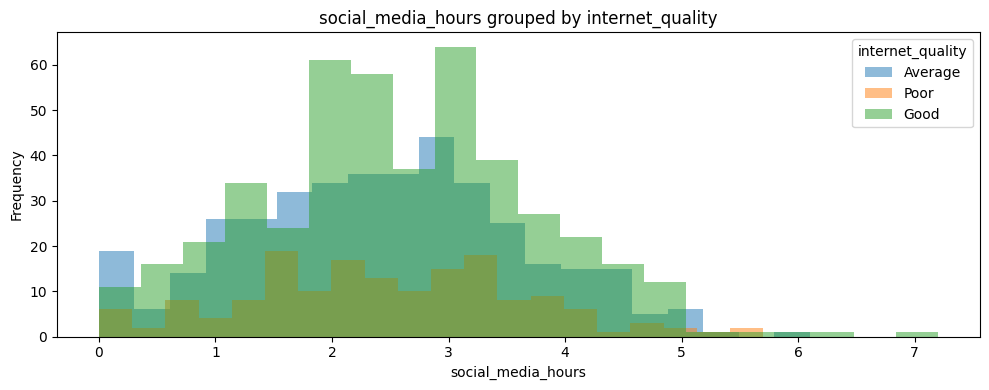

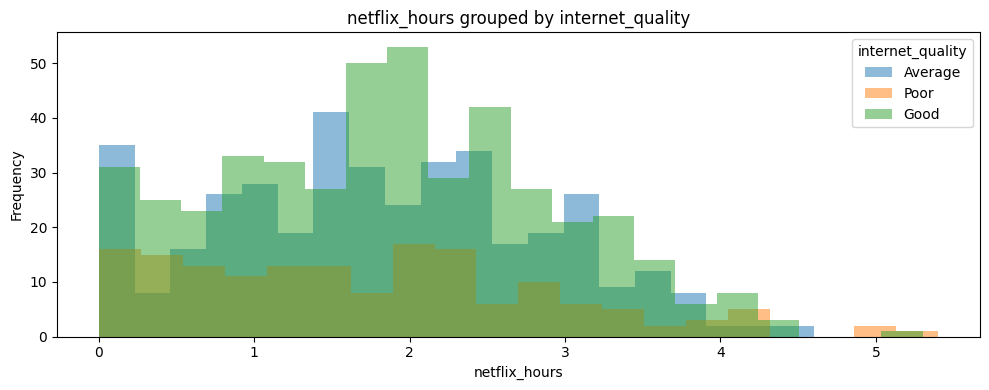

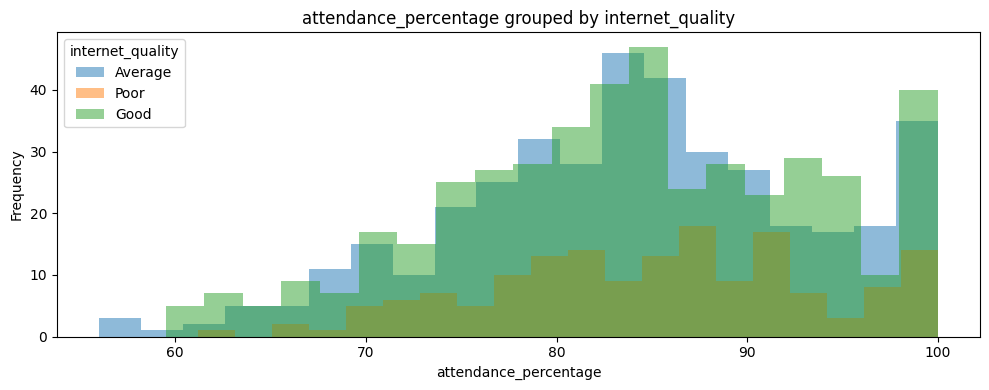

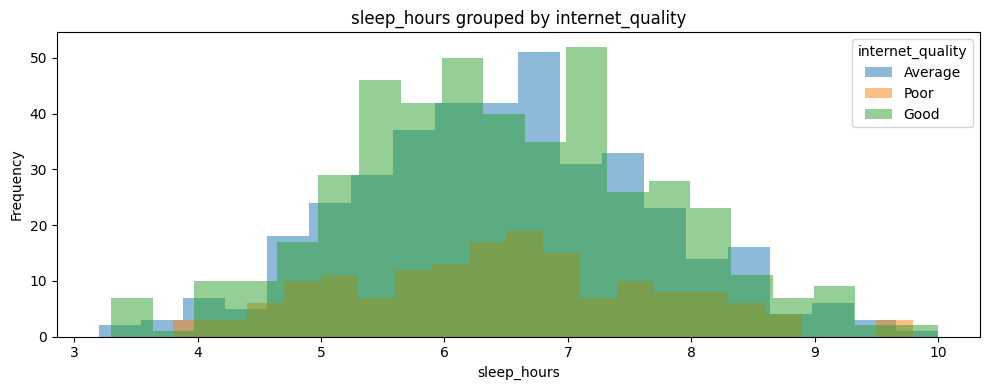

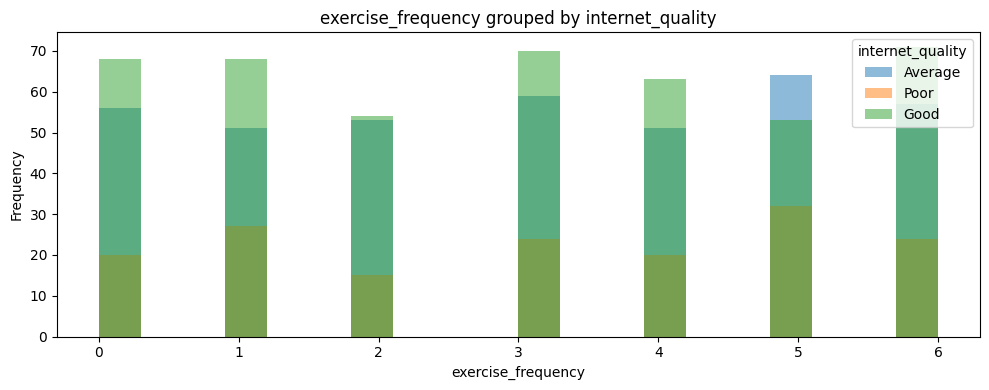

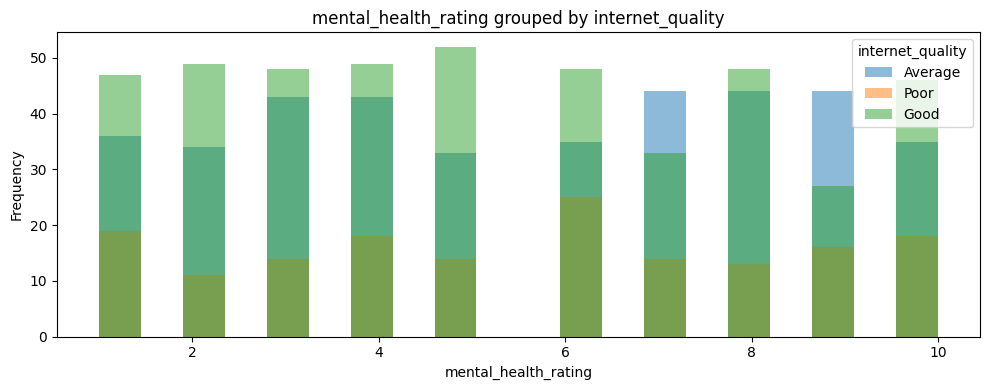

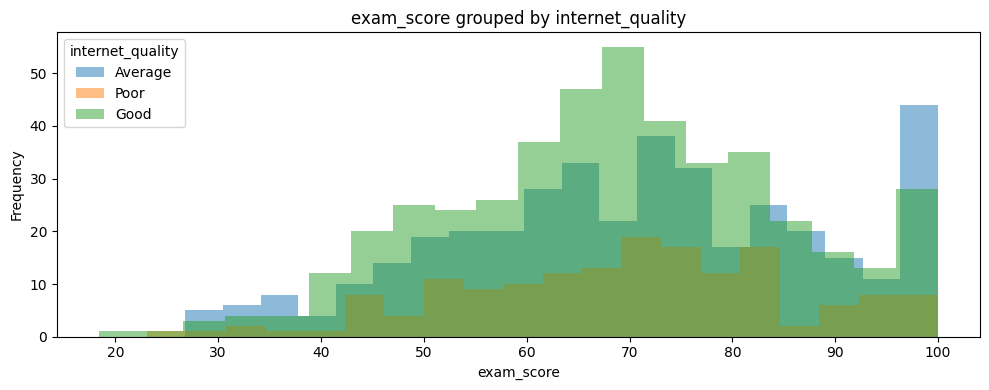

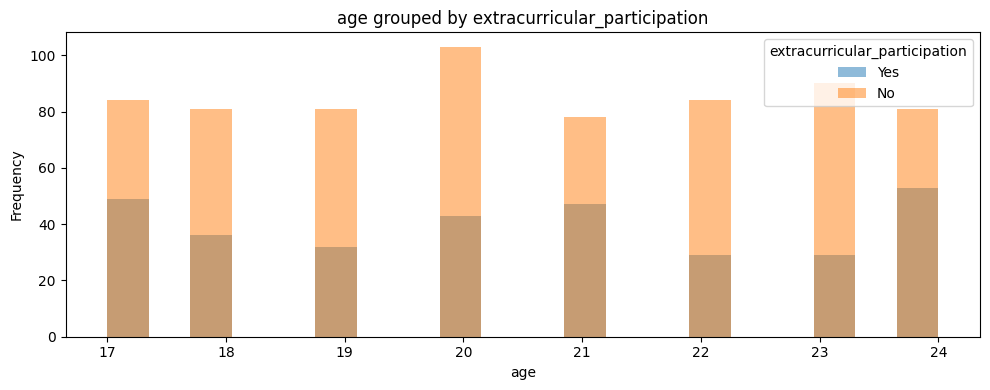

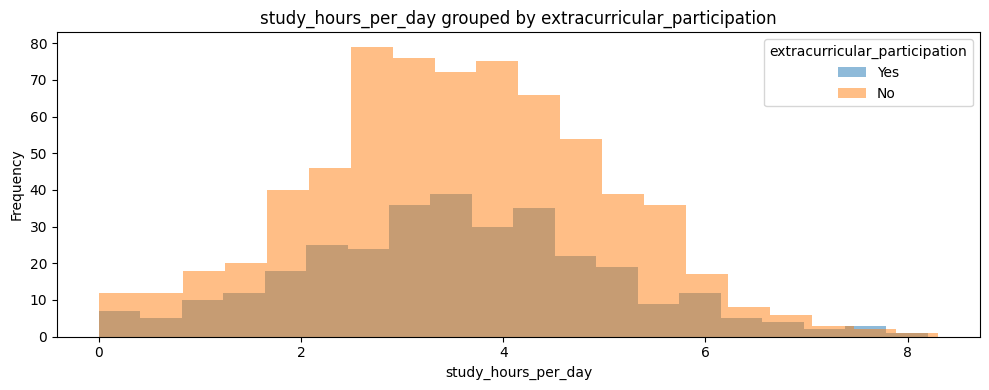

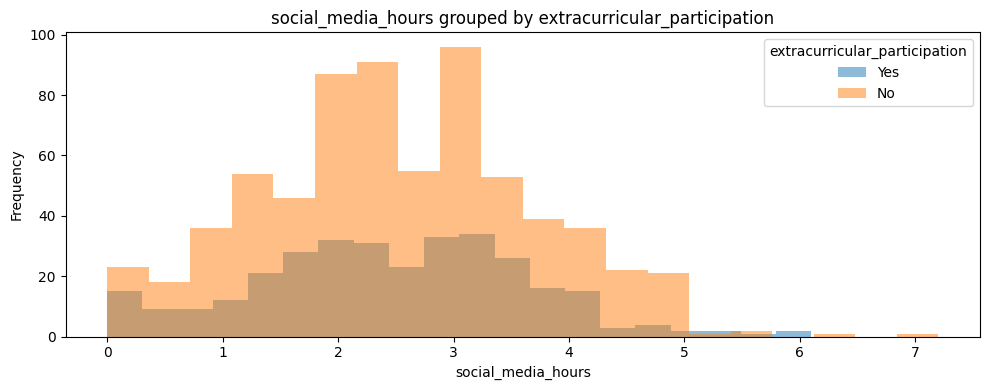

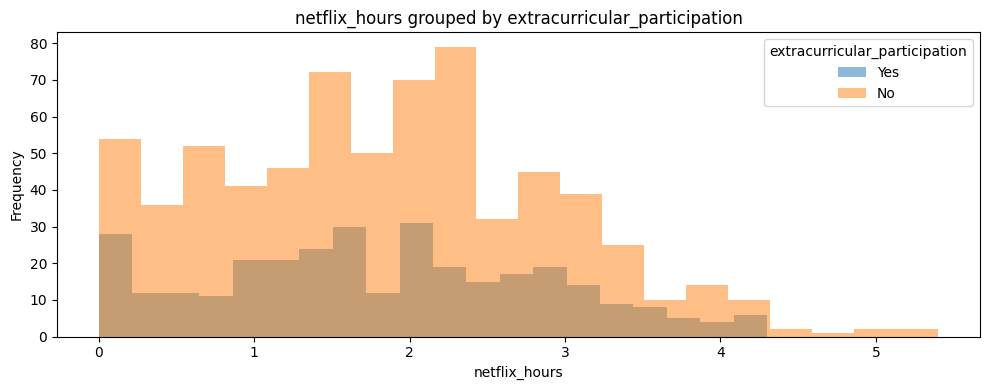

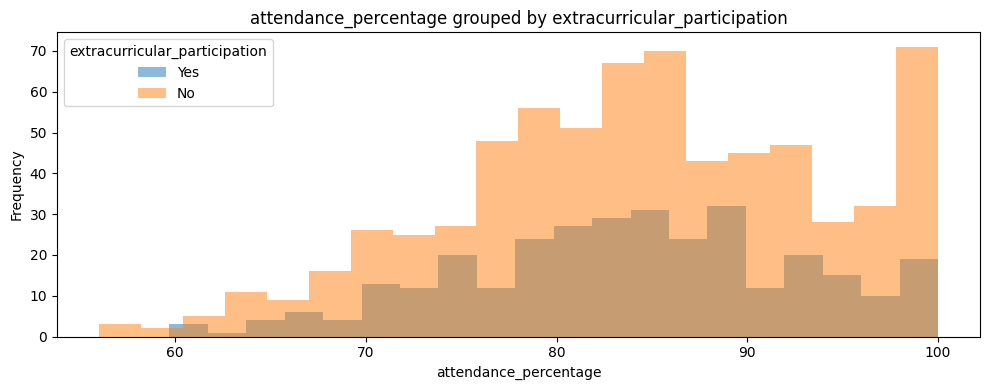

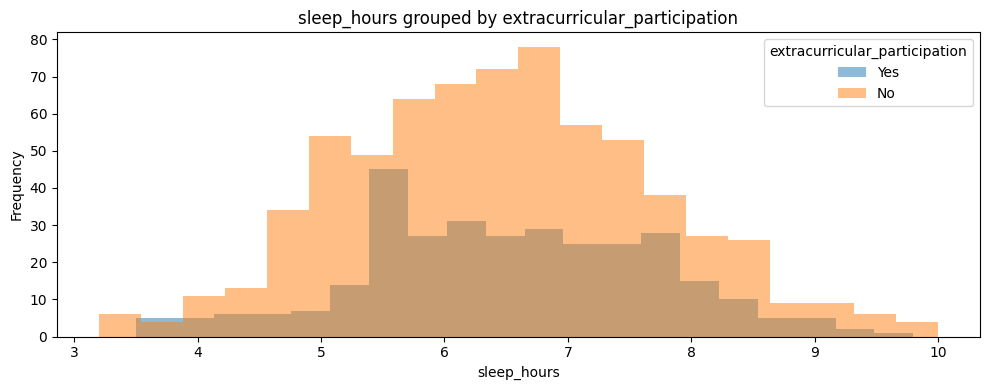

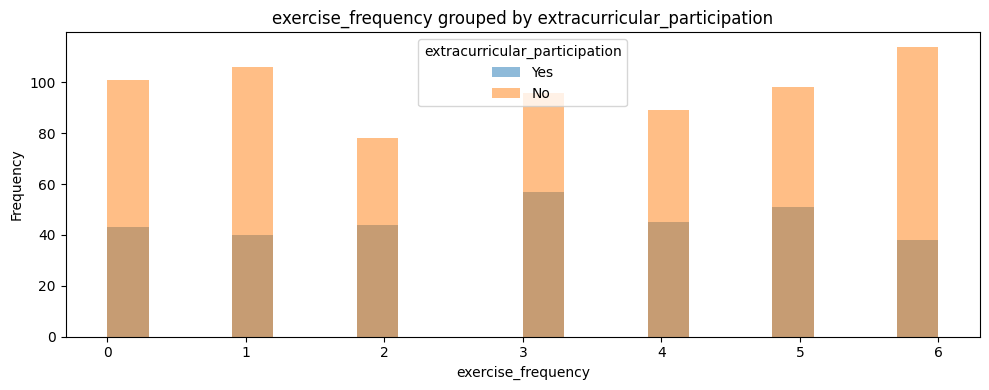

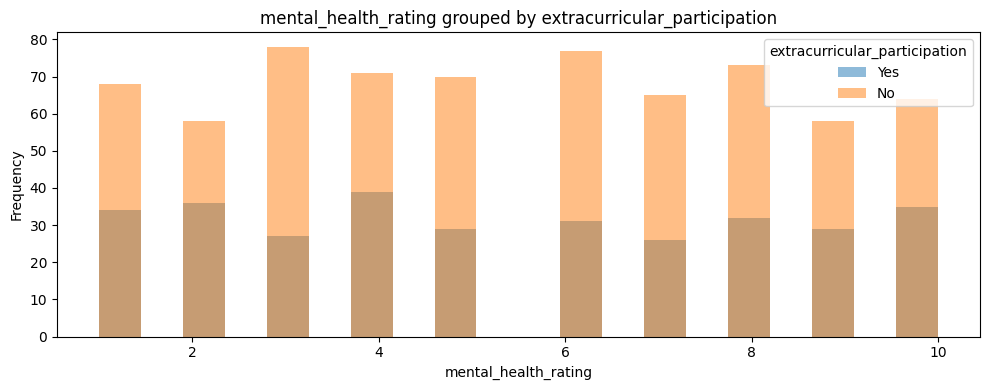

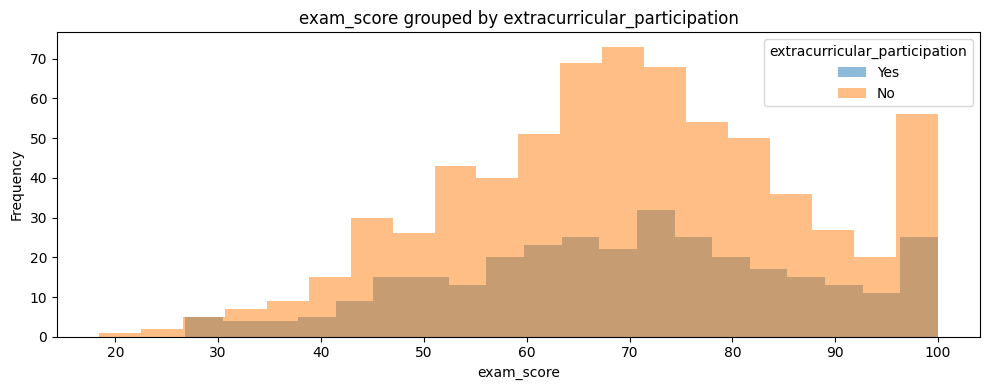

In [58]:
# Overlay histograms for all unique values of each object variable
import matplotlib.pyplot as plt

object_cols = df.select_dtypes(include='object').columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for obj_col in object_cols:
    unique_vals = df[obj_col].dropna().unique()
    for cont_col in continuous_cols:
        plt.figure(figsize=(10, 4))
        for val in unique_vals:
            group = df[df[obj_col] == val]
            group[cont_col].plot(kind='hist', bins=20, alpha=0.5, label=str(val))
        plt.title(f"{cont_col} grouped by {obj_col}")
        plt.xlabel(cont_col)
        plt.ylabel("Frequency")
        plt.legend(title=obj_col)
        plt.tight_layout()

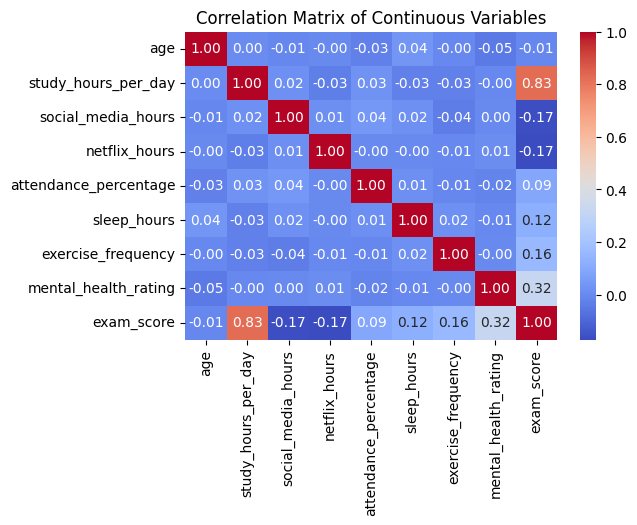

In [68]:
# Correlation between continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[continuous_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

In [ ]:
# One-way ANOVA for each object variable vs each continuous variable
from scipy.stats import f_oneway

object_cols = df.select_dtypes(include='object').columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for obj_col in object_cols:
    print(f"\nANOVA results for groups in '{obj_col}':")
    for cont_col in continuous_cols:
        groups = [df[df[obj_col] == val][cont_col].dropna() for val in df[obj_col].dropna().unique()]
        if len(groups) > 1 and all(len(g) > 1 for g in groups):
            stat, p = f_oneway(*groups)
            print(f"  {cont_col}: F={stat:.2f}, p={p:.4f}")
        else:
            print(f"  {cont_col}: Not enough groups/data for ANOVA")


ANOVA results for groups in 'gender':
  age: F=0.54, p=0.5813
  study_hours_per_day: F=0.33, p=0.7155
  social_media_hours: F=0.12, p=0.8840
  netflix_hours: F=1.12, p=0.3256
  attendance_percentage: F=0.31, p=0.7345
  sleep_hours: F=1.72, p=0.1796
  exercise_frequency: F=2.34, p=0.0969
  mental_health_rating: F=0.02, p=0.9793
  exam_score: F=0.14, p=0.8674

ANOVA results for groups in 'part_time_job':
  age: F=0.14, p=0.7122
  study_hours_per_day: F=0.85, p=0.3574
  social_media_hours: F=0.45, p=0.5026
  netflix_hours: F=0.08, p=0.7712
  attendance_percentage: F=1.74, p=0.1869
  sleep_hours: F=0.00, p=0.9586
  exercise_frequency: F=0.47, p=0.4935
  mental_health_rating: F=0.18, p=0.6689
  exam_score: F=0.71, p=0.4006

ANOVA results for groups in 'diet_quality':
  age: F=0.07, p=0.9313
  study_hours_per_day: F=2.70, p=0.0675
  social_media_hours: F=0.60, p=0.5508
  netflix_hours: F=0.29, p=0.7468
  attendance_percentage: F=1.93, p=0.1459
  sleep_hours: F=0.68, p=0.5087
  exercise_freq

C:\Users\escob\AppData\Local\Temp\ipykernel_27960\1852799799.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

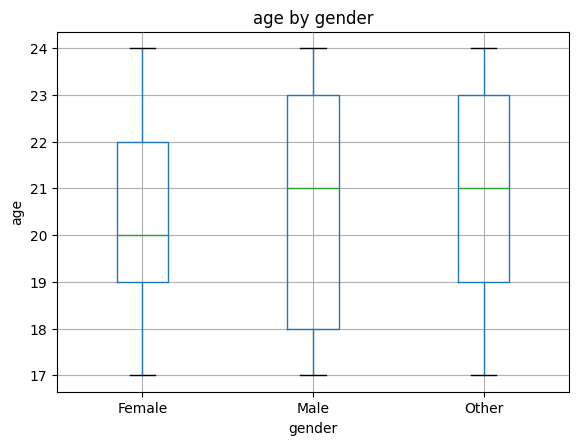

<Figure size 800x500 with 0 Axes>

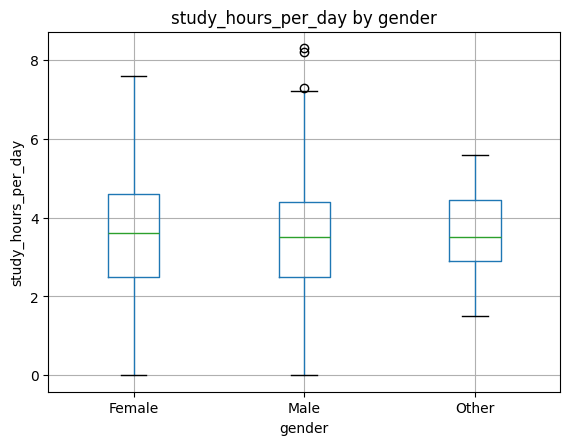

<Figure size 800x500 with 0 Axes>

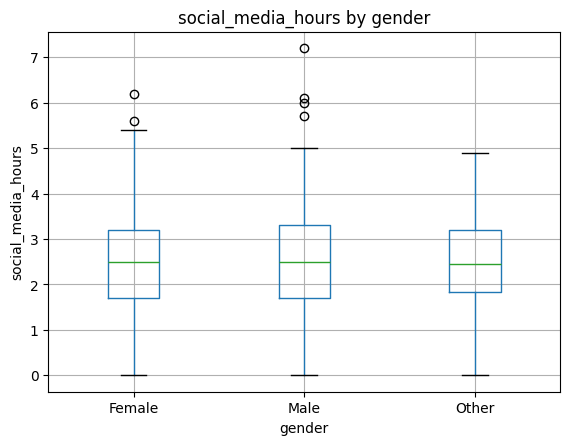

<Figure size 800x500 with 0 Axes>

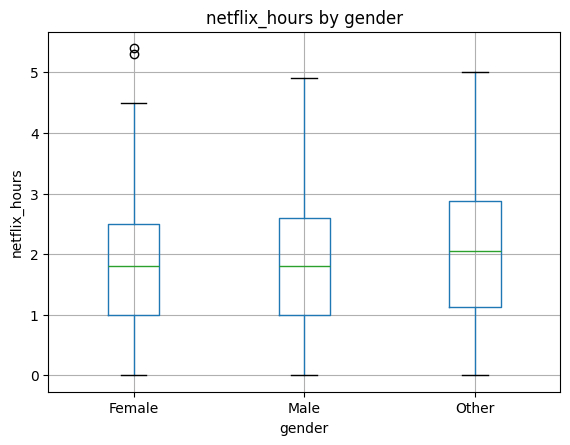

<Figure size 800x500 with 0 Axes>

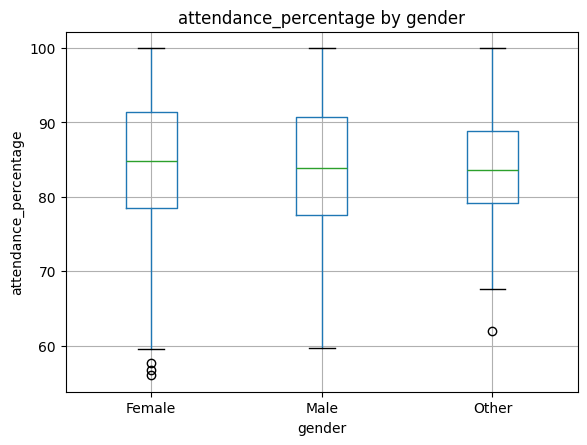

<Figure size 800x500 with 0 Axes>

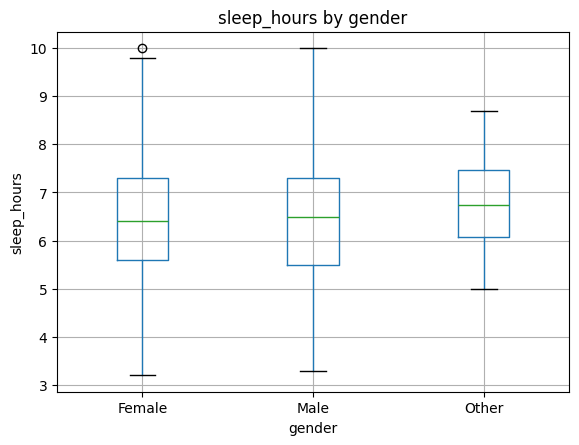

<Figure size 800x500 with 0 Axes>

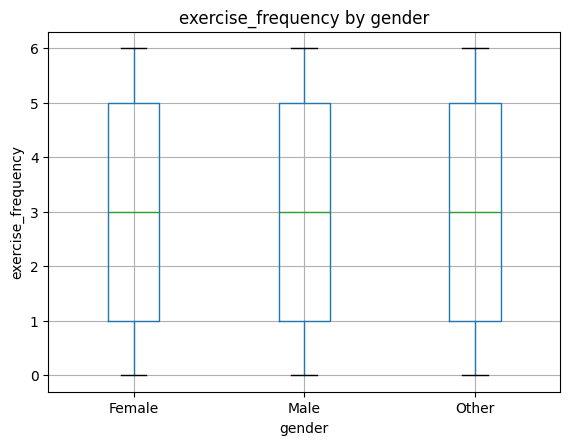

<Figure size 800x500 with 0 Axes>

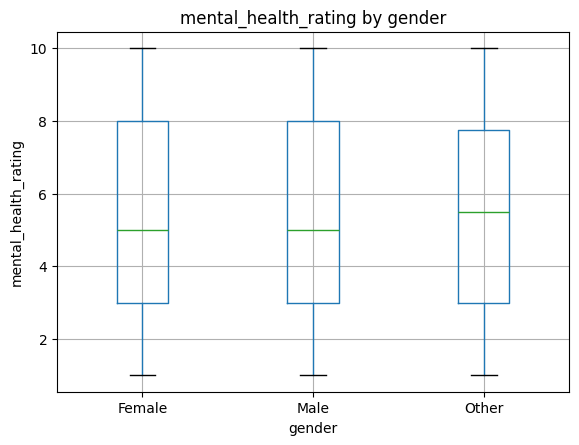

<Figure size 800x500 with 0 Axes>

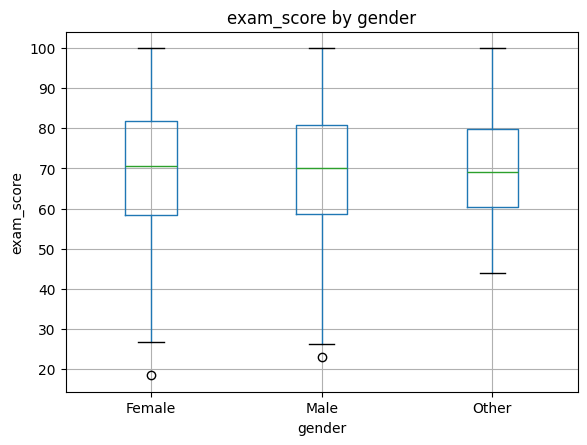

<Figure size 800x500 with 0 Axes>

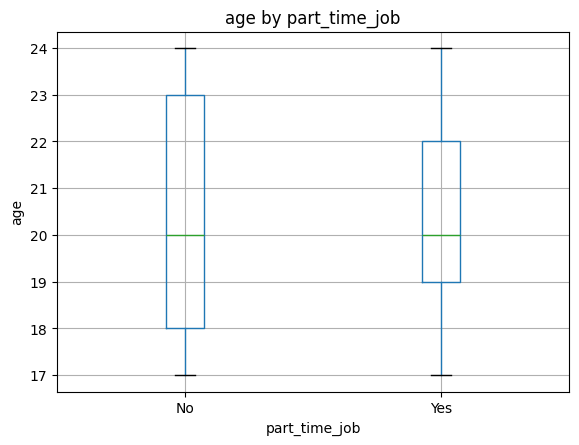

<Figure size 800x500 with 0 Axes>

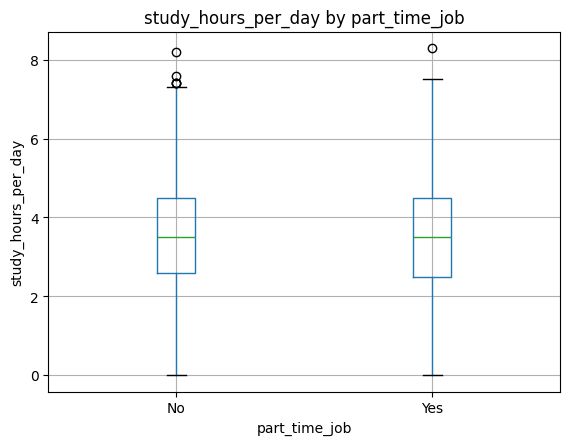

<Figure size 800x500 with 0 Axes>

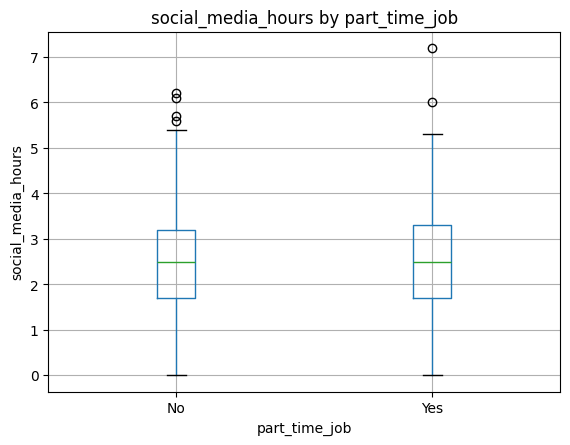

<Figure size 800x500 with 0 Axes>

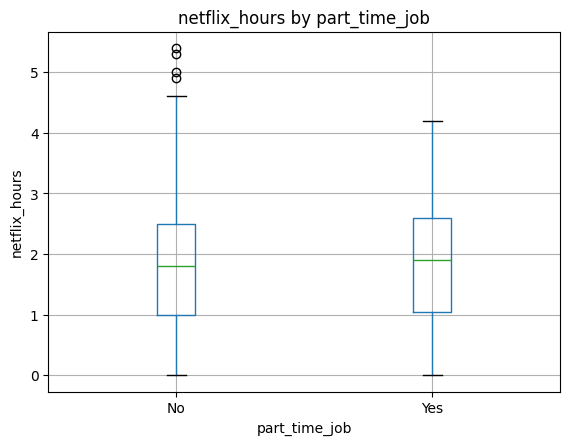

<Figure size 800x500 with 0 Axes>

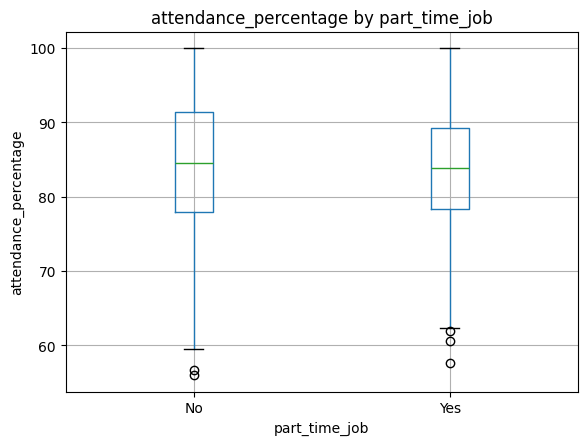

<Figure size 800x500 with 0 Axes>

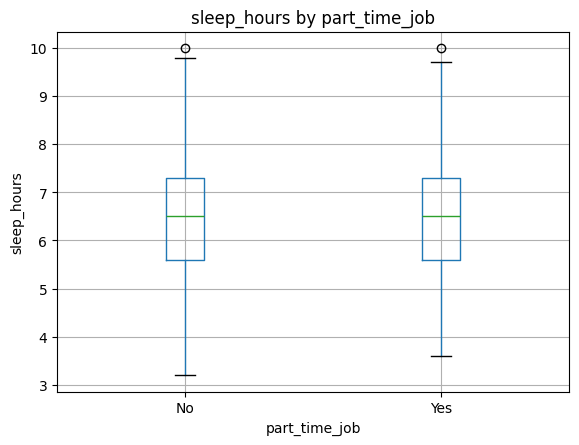

<Figure size 800x500 with 0 Axes>

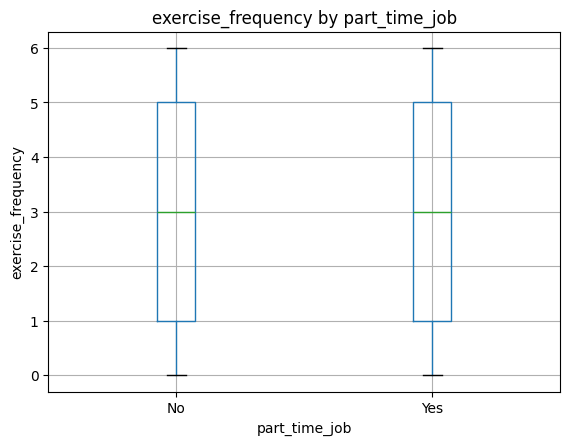

<Figure size 800x500 with 0 Axes>

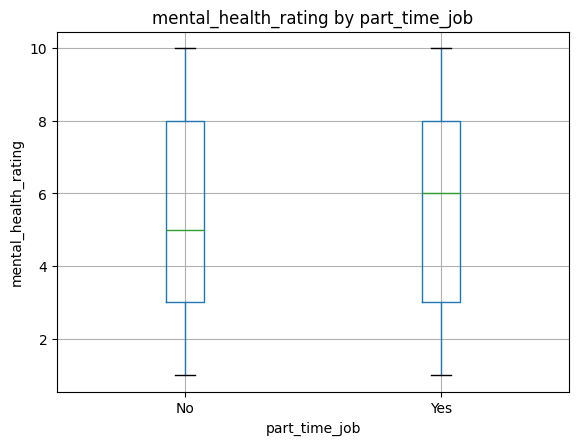

<Figure size 800x500 with 0 Axes>

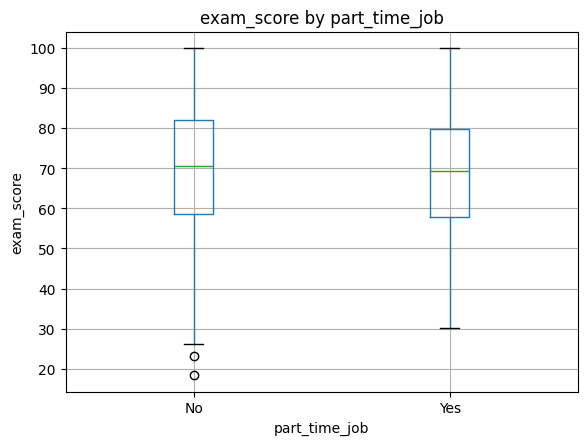

<Figure size 800x500 with 0 Axes>

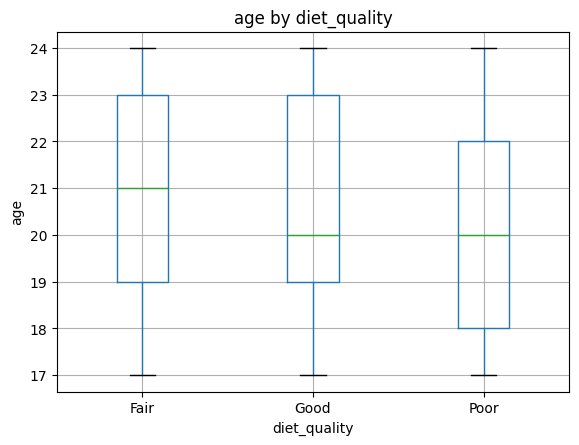

<Figure size 800x500 with 0 Axes>

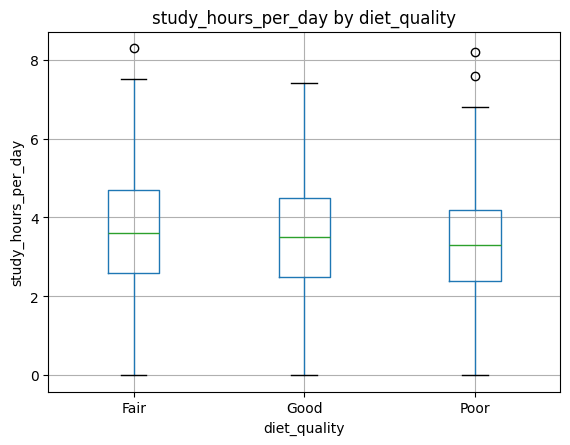

<Figure size 800x500 with 0 Axes>

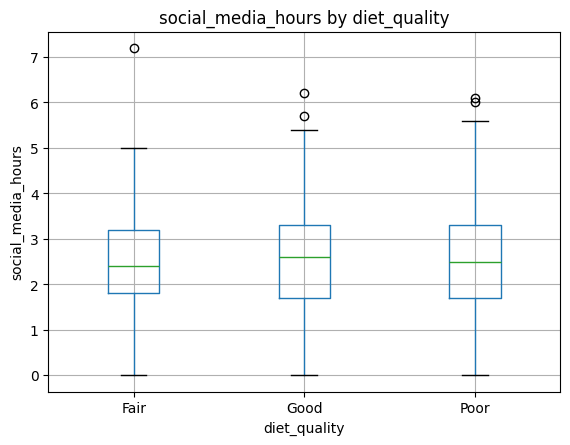

<Figure size 800x500 with 0 Axes>

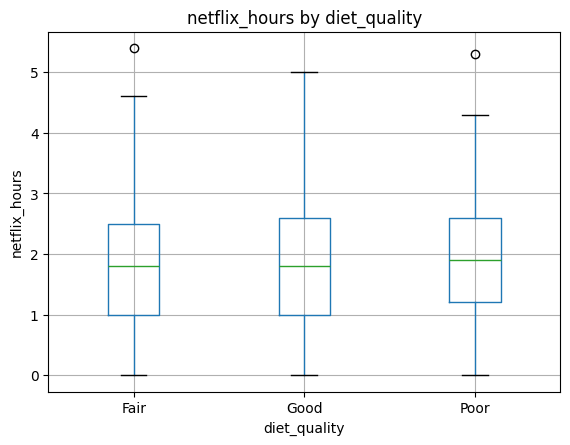

<Figure size 800x500 with 0 Axes>

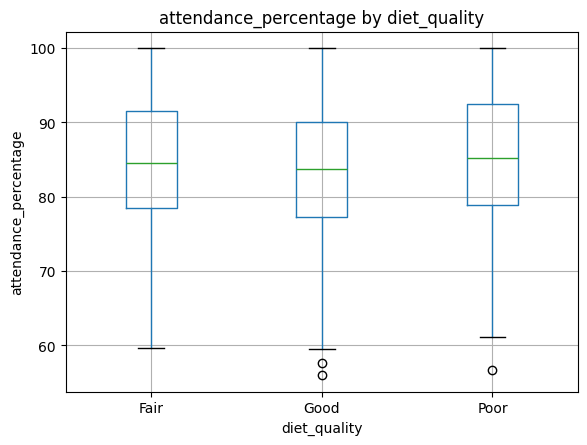

<Figure size 800x500 with 0 Axes>

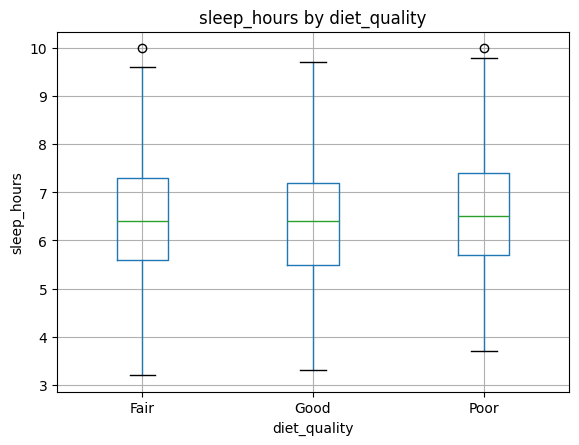

<Figure size 800x500 with 0 Axes>

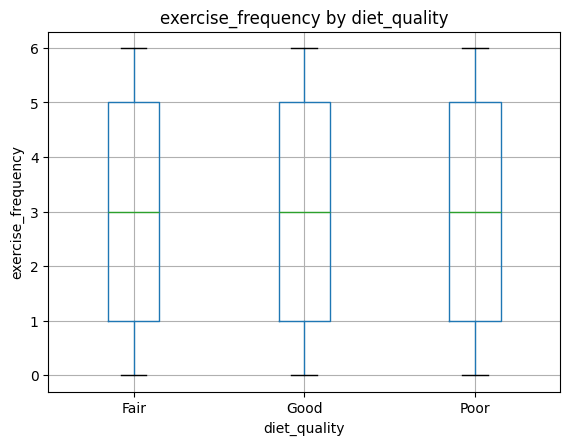

<Figure size 800x500 with 0 Axes>

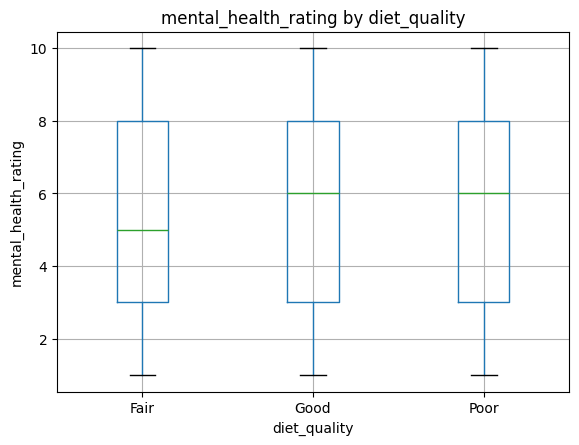

<Figure size 800x500 with 0 Axes>

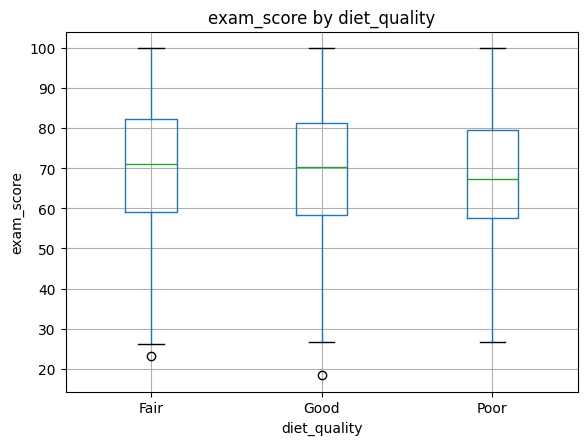

<Figure size 800x500 with 0 Axes>

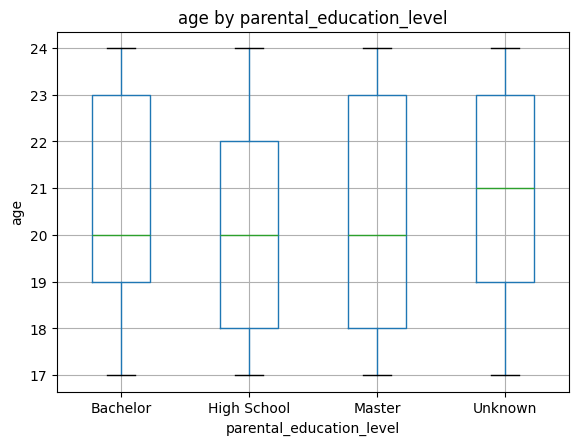

<Figure size 800x500 with 0 Axes>

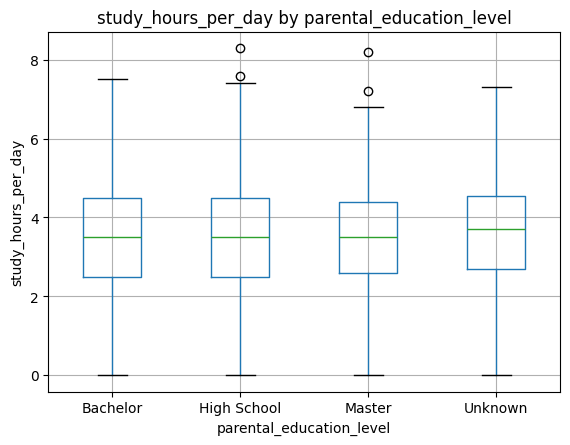

<Figure size 800x500 with 0 Axes>

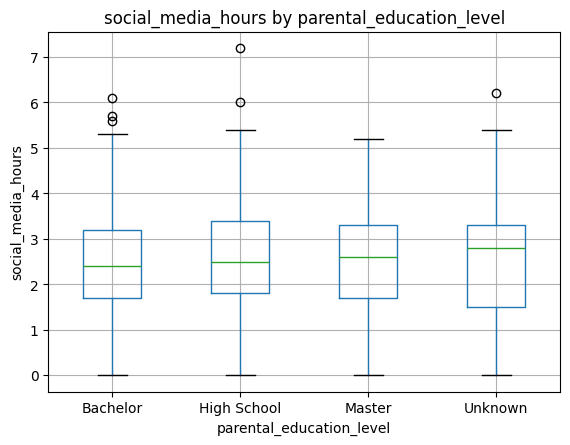

<Figure size 800x500 with 0 Axes>

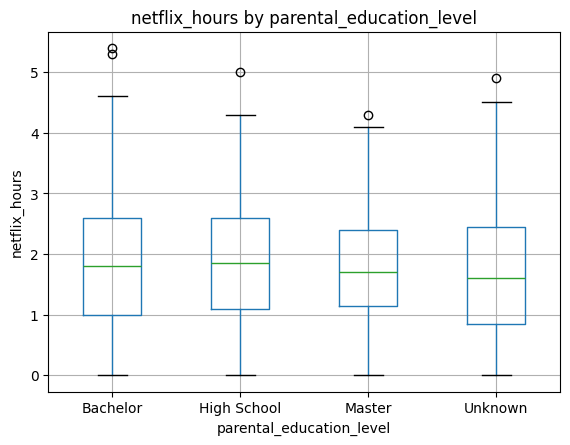

<Figure size 800x500 with 0 Axes>

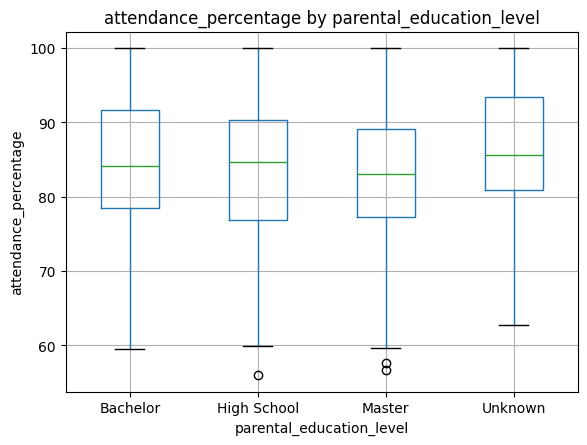

<Figure size 800x500 with 0 Axes>

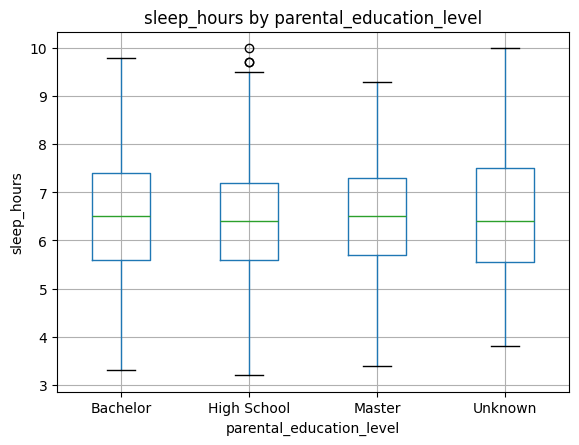

<Figure size 800x500 with 0 Axes>

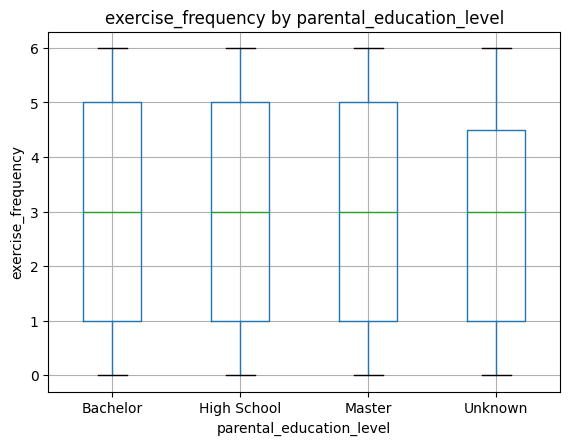

<Figure size 800x500 with 0 Axes>

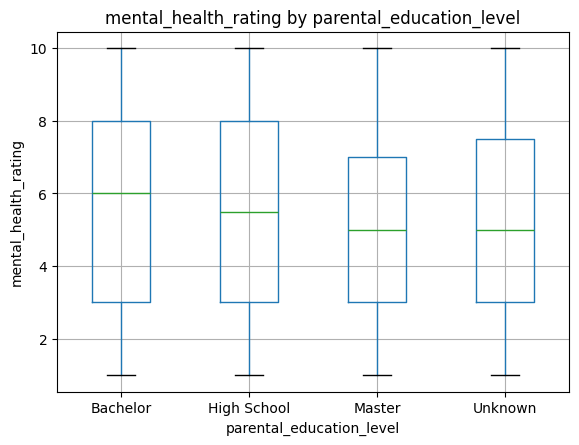

<Figure size 800x500 with 0 Axes>

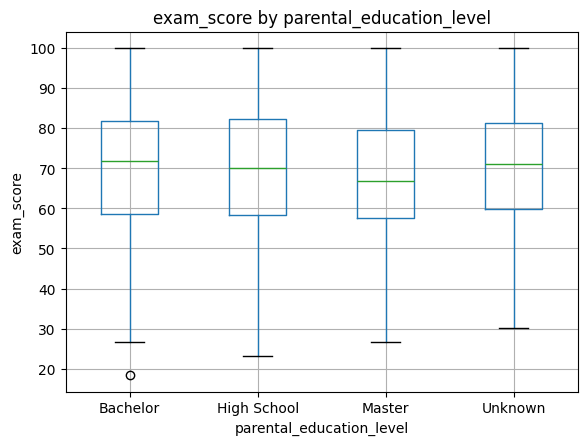

<Figure size 800x500 with 0 Axes>

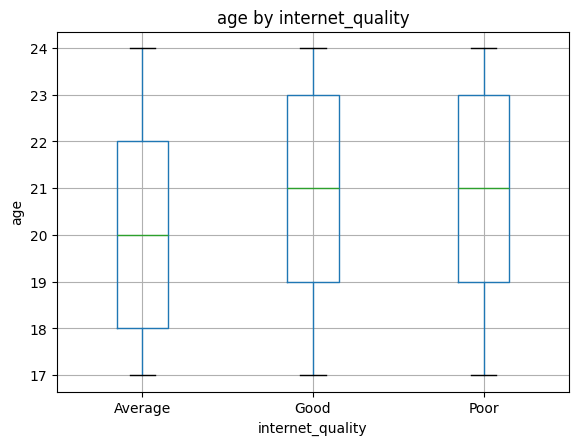

<Figure size 800x500 with 0 Axes>

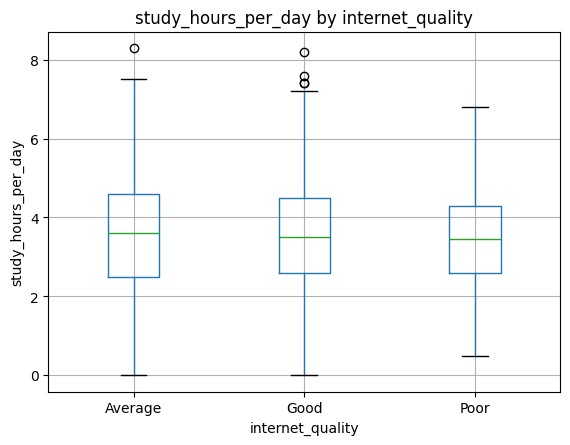

<Figure size 800x500 with 0 Axes>

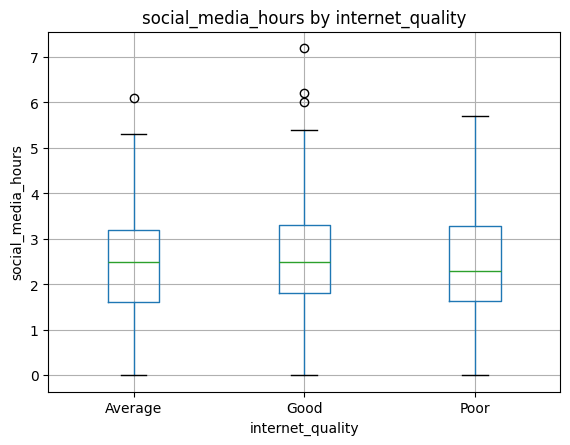

<Figure size 800x500 with 0 Axes>

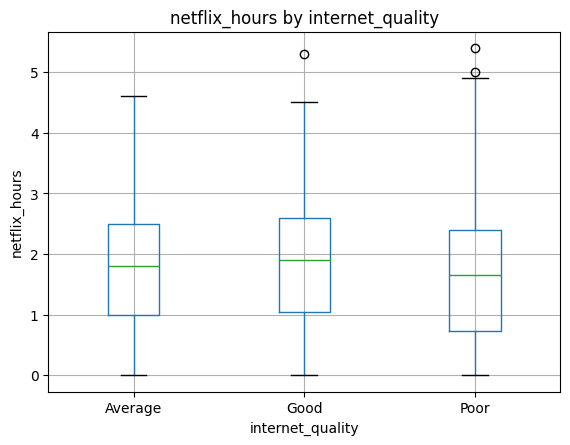

<Figure size 800x500 with 0 Axes>

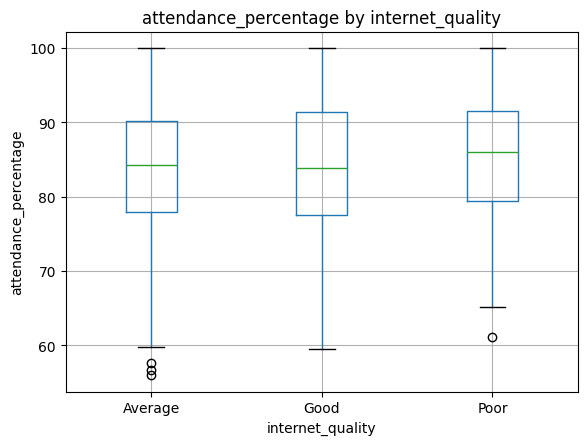

<Figure size 800x500 with 0 Axes>

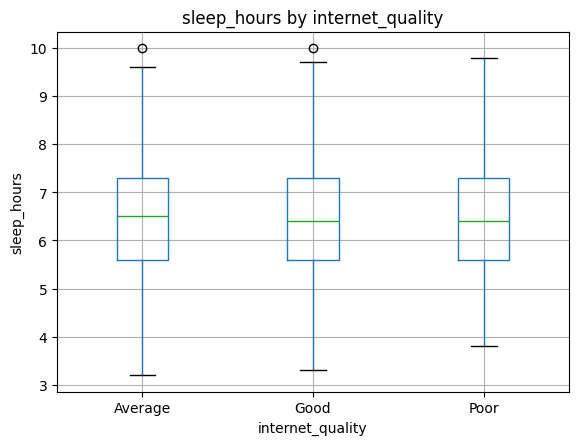

<Figure size 800x500 with 0 Axes>

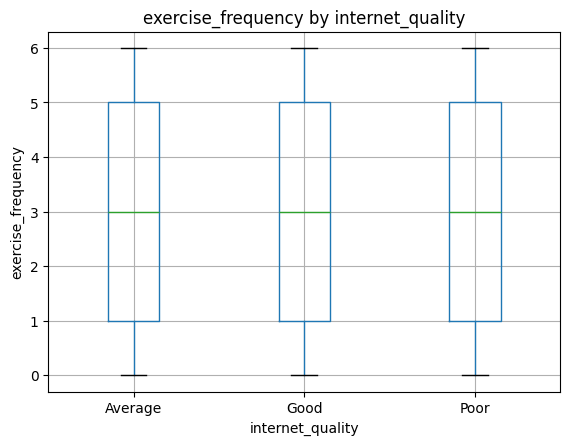

<Figure size 800x500 with 0 Axes>

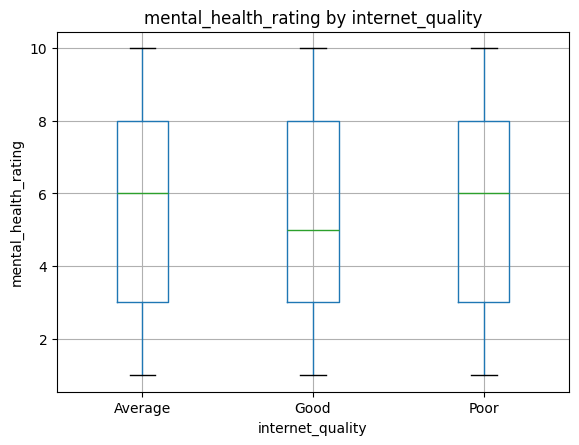

<Figure size 800x500 with 0 Axes>

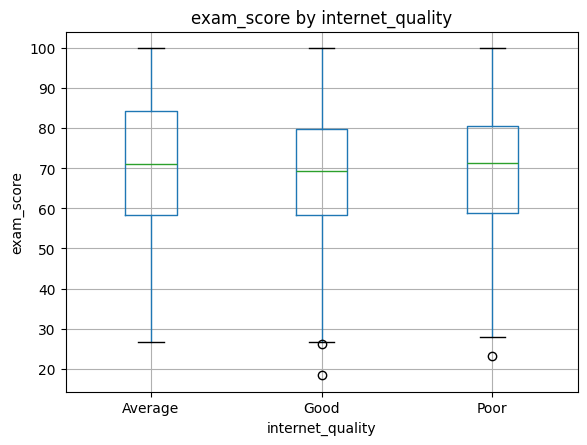

<Figure size 800x500 with 0 Axes>

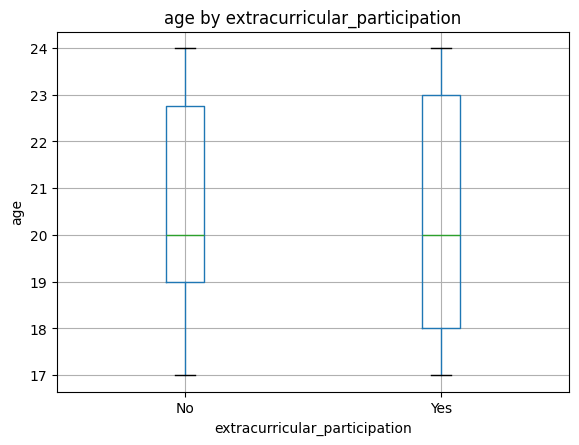

<Figure size 800x500 with 0 Axes>

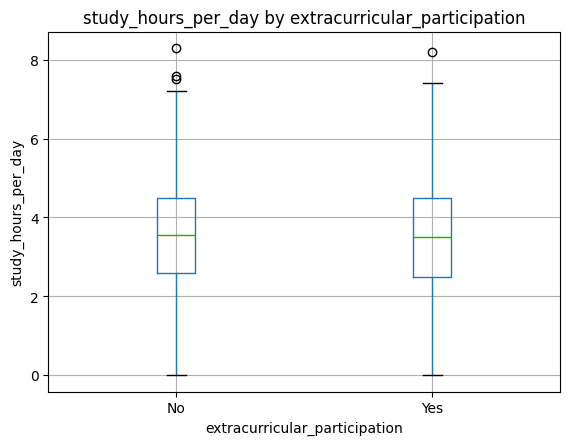

<Figure size 800x500 with 0 Axes>

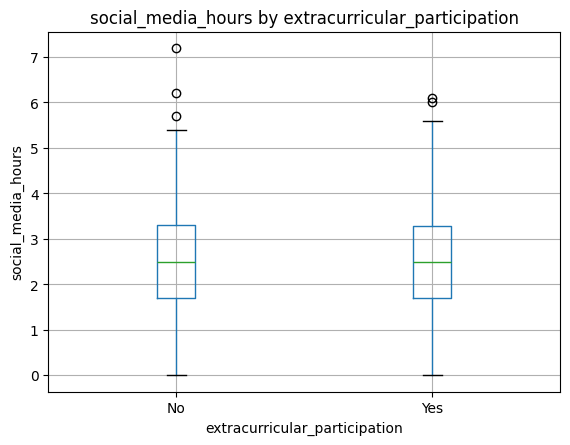

<Figure size 800x500 with 0 Axes>

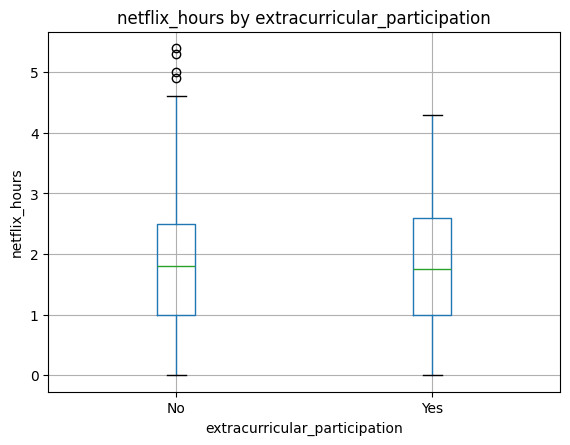

<Figure size 800x500 with 0 Axes>

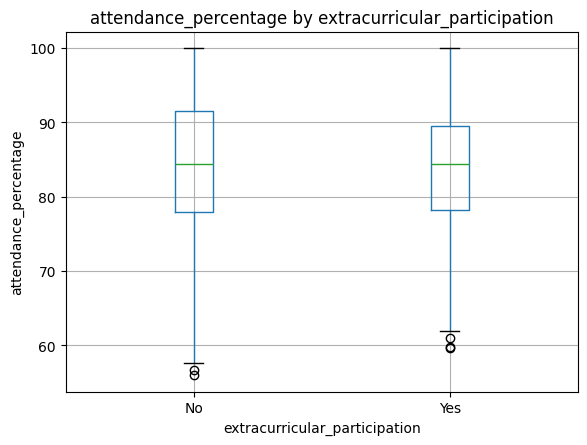

<Figure size 800x500 with 0 Axes>

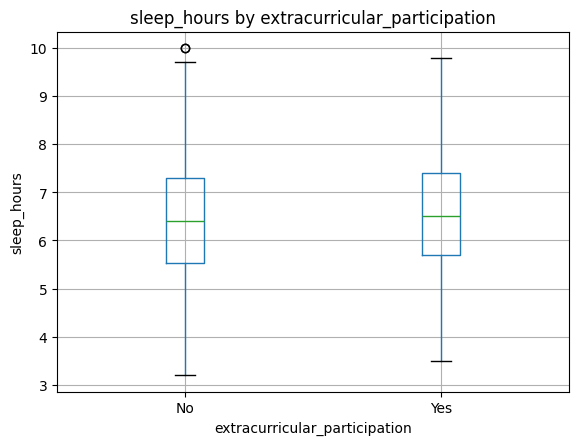

<Figure size 800x500 with 0 Axes>

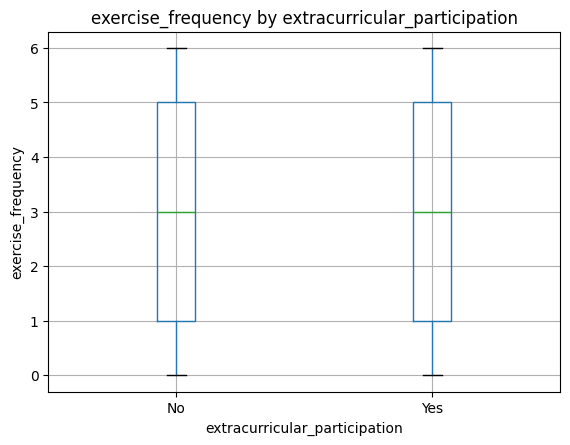

<Figure size 800x500 with 0 Axes>

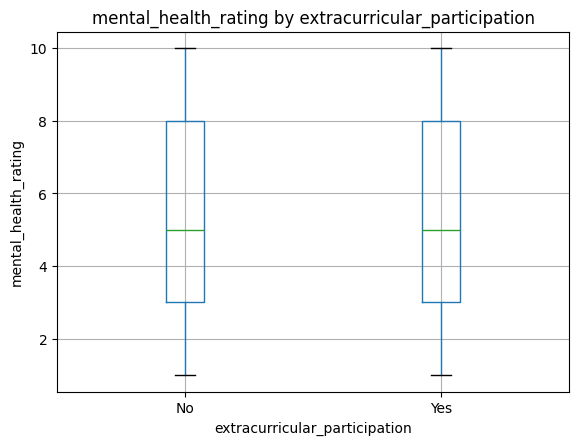

<Figure size 800x500 with 0 Axes>

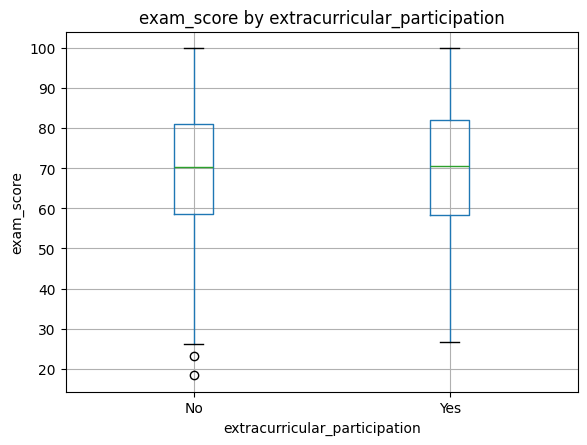

In [70]:
# Boxplots for all continuous variables grouped by all object variables
import matplotlib.pyplot as plt

object_cols = df.select_dtypes(include='object').columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for obj_col in object_cols:
    for cont_col in continuous_cols:
        plt.figure(figsize=(8, 5))
        df.boxplot(column=cont_col, by=obj_col)
        plt.title(f"{cont_col} by {obj_col}")
        plt.suptitle("")  # Remove automatic suptitle
        plt.xlabel(obj_col)
        plt.ylabel(cont_col)

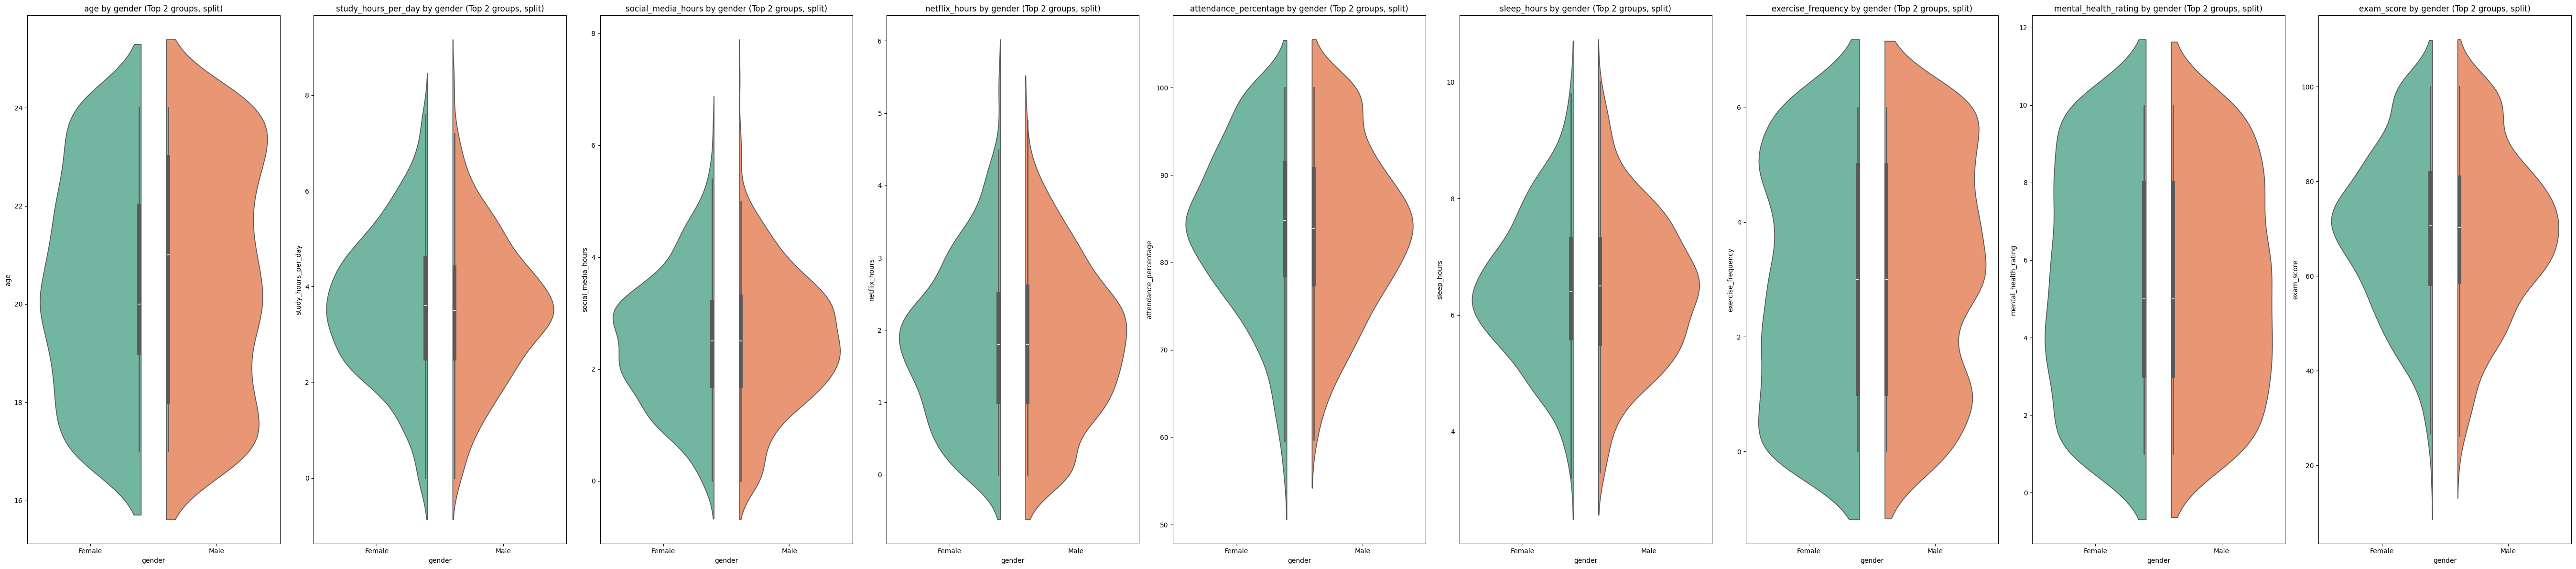

<Figure size 640x480 with 0 Axes>

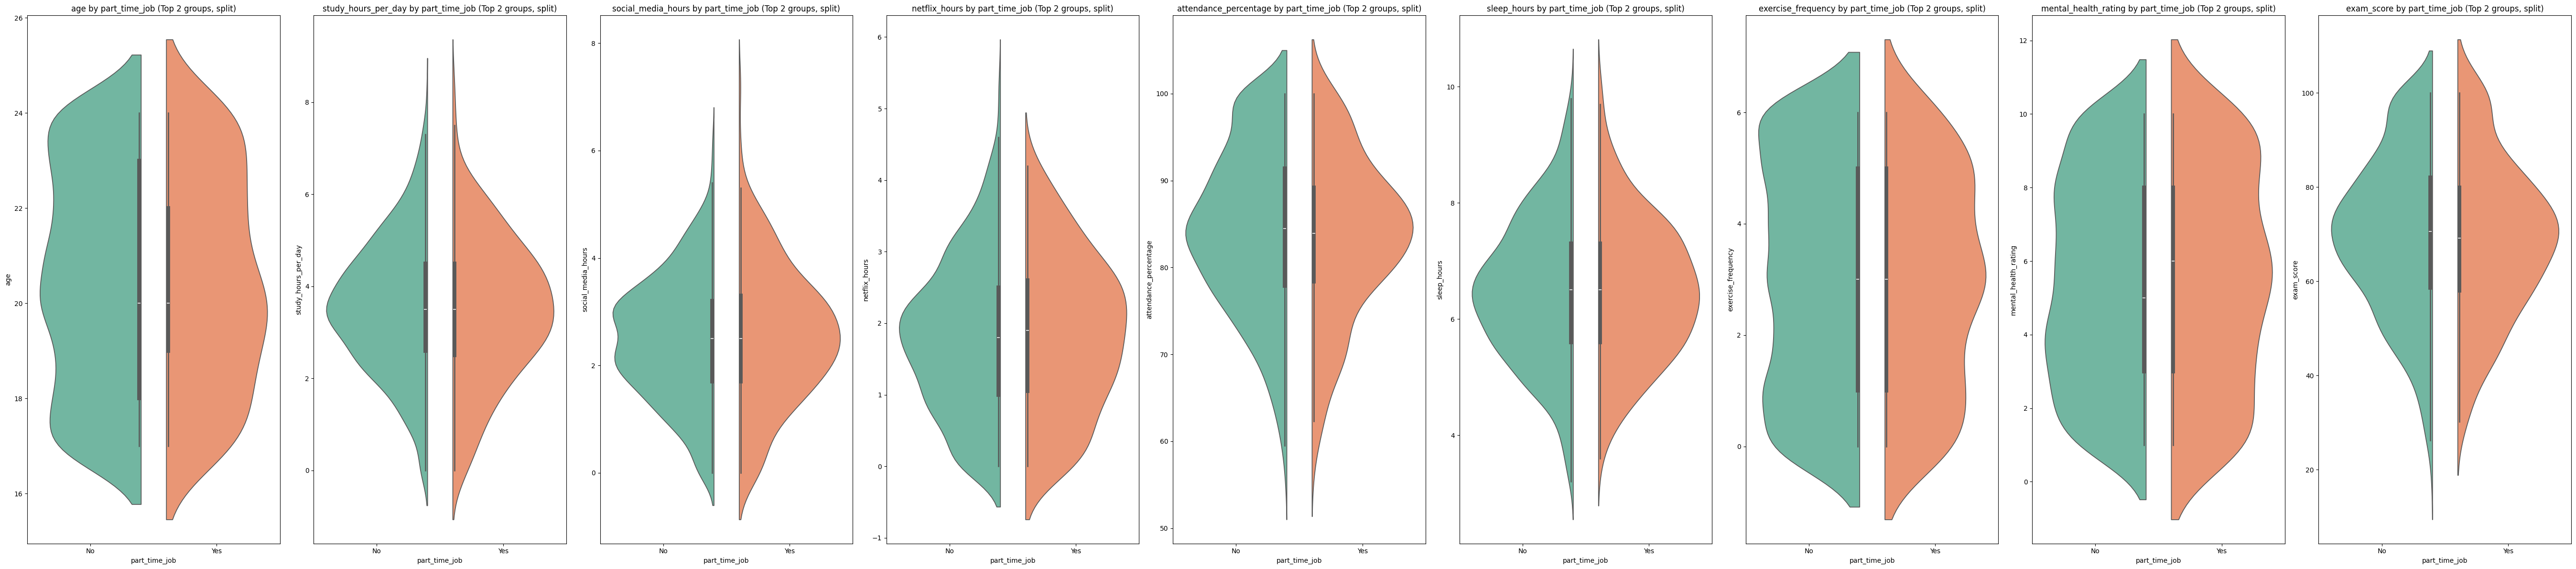

<Figure size 640x480 with 0 Axes>

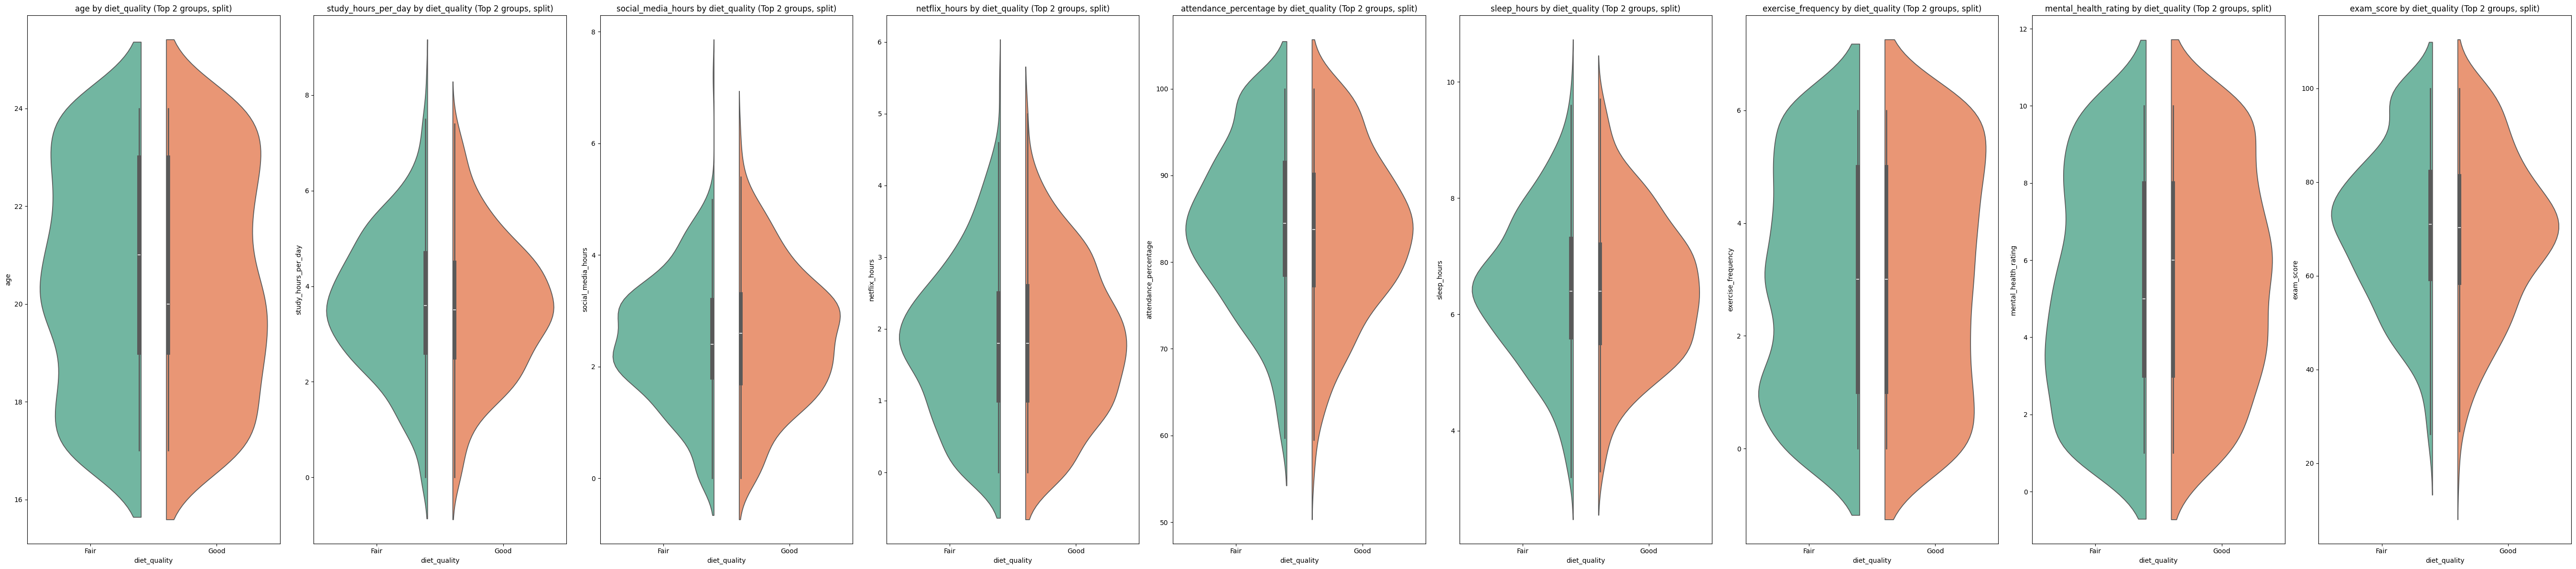

<Figure size 640x480 with 0 Axes>

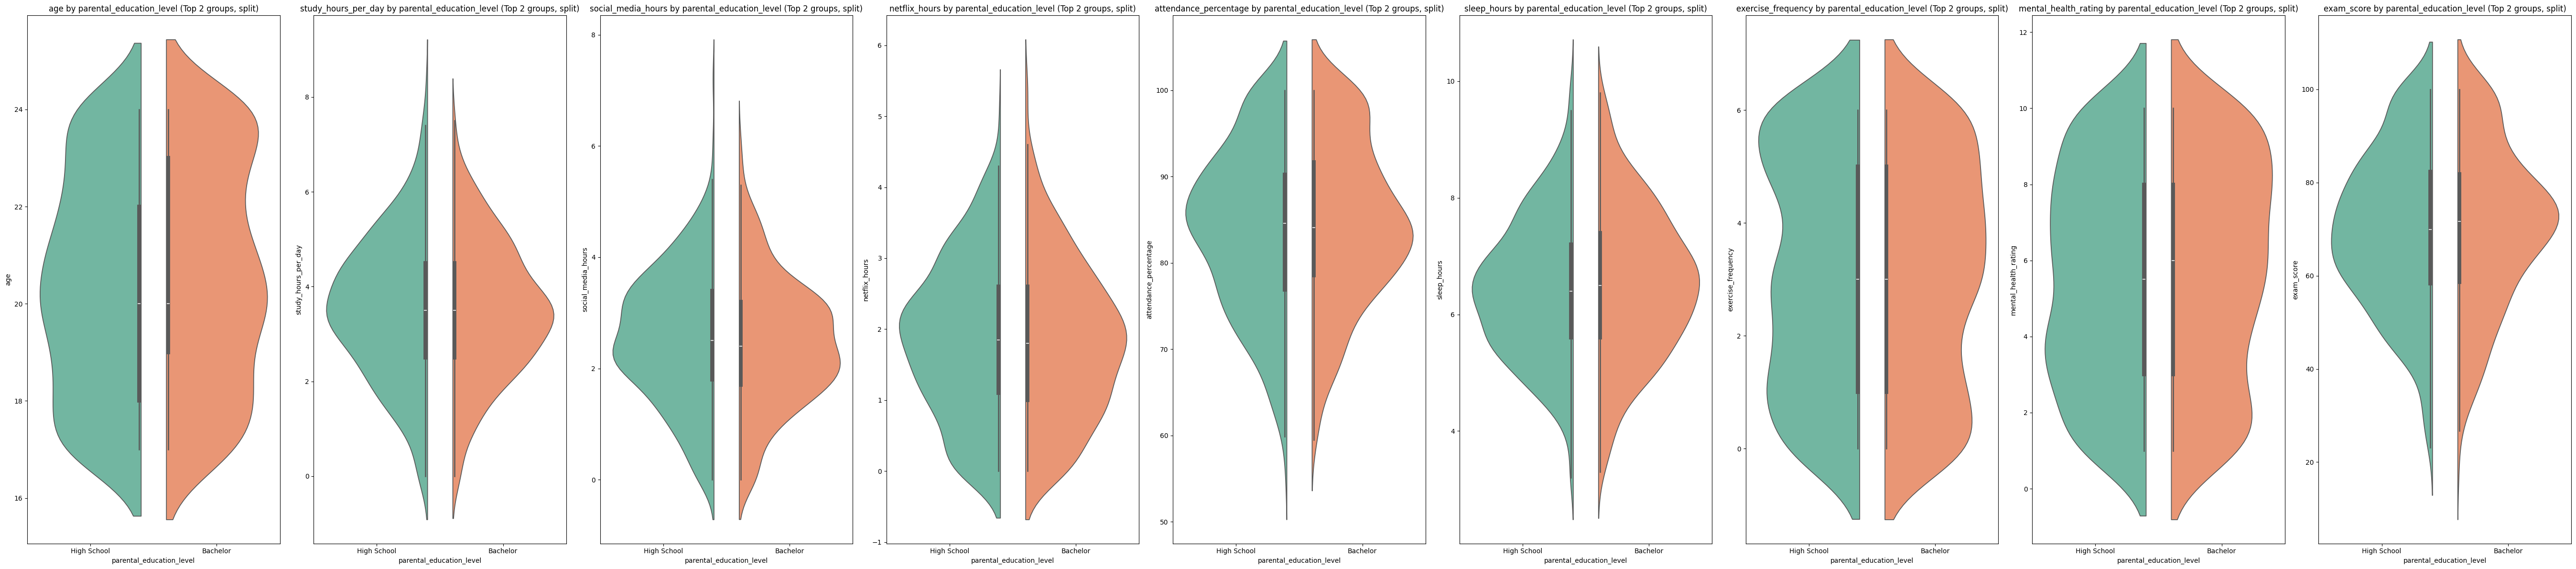

<Figure size 640x480 with 0 Axes>

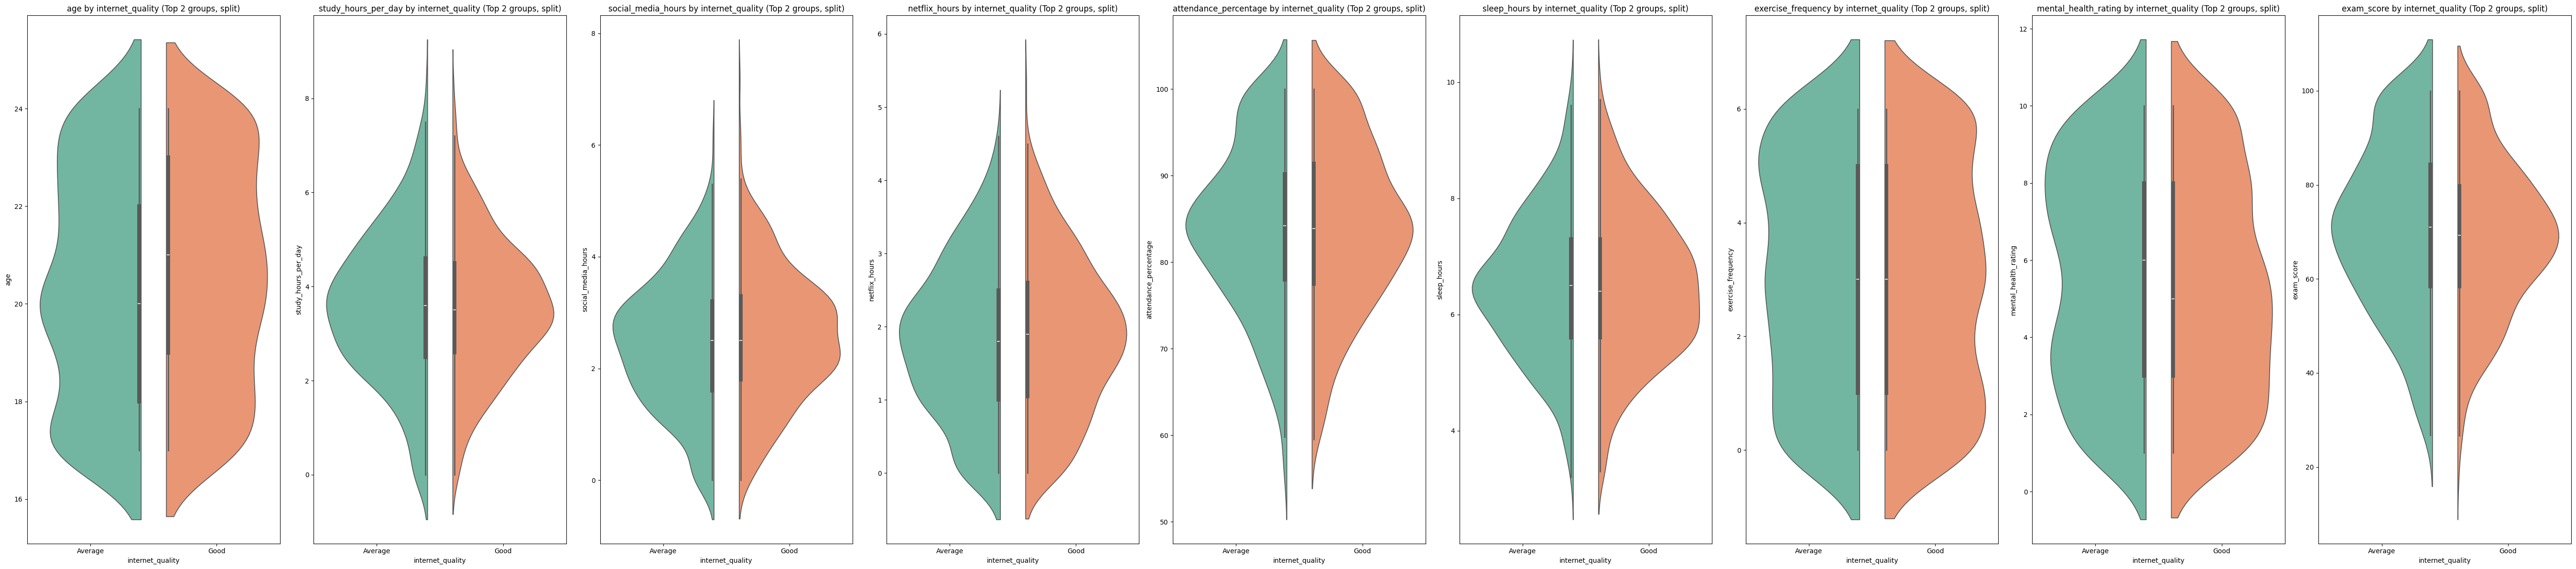

<Figure size 640x480 with 0 Axes>

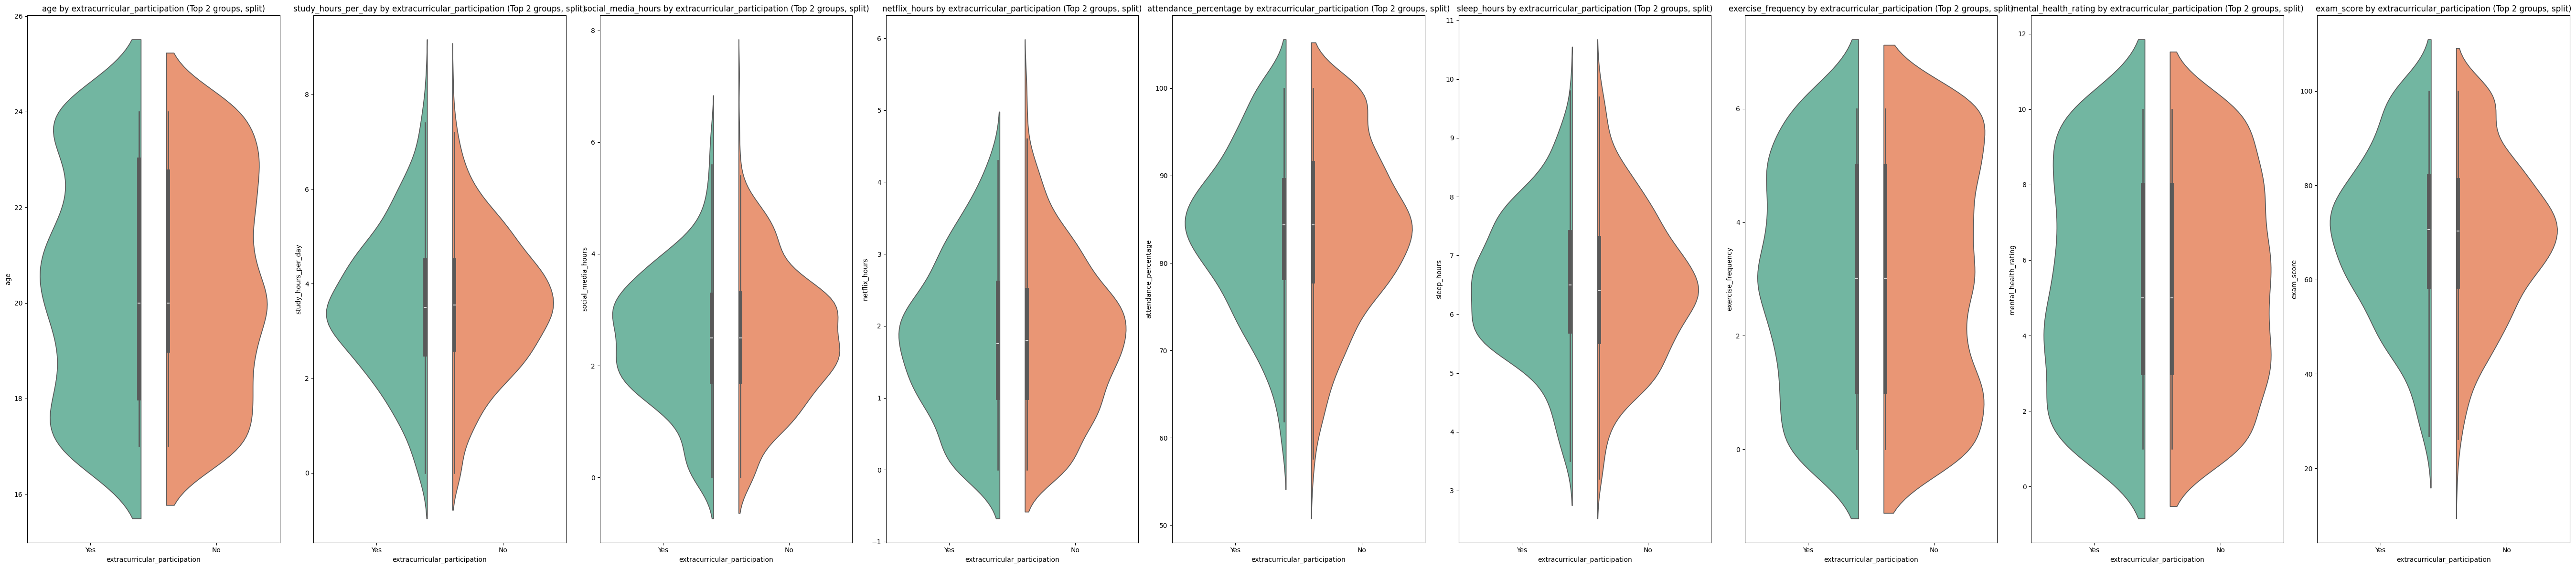

<Figure size 640x480 with 0 Axes>

In [77]:
# Violin plots for all continuous variables grouped by each object variable (split by two largest groups)
import matplotlib.pyplot as plt
import seaborn as sns

object_cols = df.select_dtypes(include='object').columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for obj_col in object_cols:
    # Get the two largest groups
    top2 = df[obj_col].value_counts().index[:2]
    df_top2 = df[df[obj_col].isin(top2)]
    n = len(continuous_cols)
    fig, axs = plt.subplots(1, n, figsize=(6*n, 12))
    if n == 1:
        axs = [axs]
    for i, cont_col in enumerate(continuous_cols):
        sns.violinplot(
            x=obj_col, y=cont_col, data=df_top2, ax=axs[i],
            split=True, hue=obj_col, inner="box", palette="Set2"
        )
        axs[i].set_title(f"{cont_col} by {obj_col} (Top 2 groups, split)")
        axs[i].set_xlabel(obj_col)
        axs[i].set_ylabel(cont_col)
    plt.tight_layout()
    plt.show()
    plt.savefig(f"violin_{obj_col}.png")

Correlation of each numeric variable with exam_score:
exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


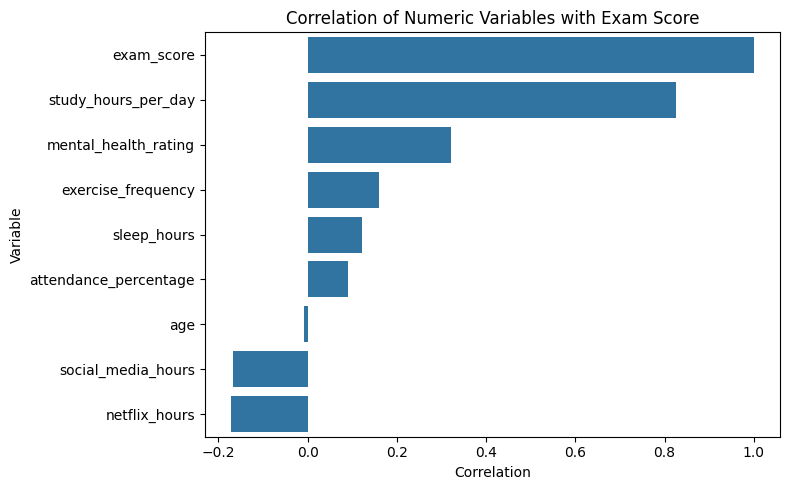


Linear Regression coefficients (effect on exam_score):
age: -0.014
study_hours_per_day: 9.575
social_media_hours: -2.620
netflix_hours: -2.277
attendance_percentage: 0.145
sleep_hours: 2.006
exercise_frequency: 1.452
mental_health_rating: 1.948


In [78]:
# Correlation of numeric variables with exam score
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_with_score = df[continuous_cols].corr()['exam_score'].sort_values(ascending=False)

print("Correlation of each numeric variable with exam_score:")
print(corr_with_score)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_score.values, y=corr_with_score.index, orient='h')
plt.title("Correlation of Numeric Variables with Exam Score")
plt.xlabel("Correlation")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Linear regression: Predict exam_score from all numeric variables
from sklearn.linear_model import LinearRegression

X = df[continuous_cols].drop(columns=['exam_score'])
y = df['exam_score']

model = LinearRegression()
model.fit(X, y)

print("\nLinear Regression coefficients (effect on exam_score):")
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef:.3f}")

In [81]:
df_train = df.drop(columns=['exam_score'])
df_test = df[df['exam_score'].notnull()]    

In [89]:
# Get PC1 and PC2 for "data" using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PC1 and PC2 as a DataFrame
pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
print(pc_df.head())

        PC1       PC2       PC3
0 -1.380813 -2.421362  0.553379
1  2.964291  0.743184 -0.909564
2 -2.677514  1.018886  1.653905
3 -3.170351 -0.895744  2.450872
4  0.079067  1.915122  0.388665


In [94]:
# Interactive Plotly scatter plot for PC1 and PC2
import plotly.express as px

# pc_df must have the same index as data
pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=X.index)

# Example: color by 'parental_education_level' if available in data
color_col = 'parental_education_level' if 'parental_education_level' in data.columns else None

fig = px.scatter_3d(
    pc_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color=data.loc[pc_df.index, color_col] if color_col else None,
    title='Interactive PCA Plot (PC1 vs PC2 vs PC3)',
    labels={'color': color_col}
)

fig.show()

In [95]:
data.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [102]:
df_aplicados = data[data['study_hours_per_day'] > 4.5]
df_desaplicados = data[data['study_hours_per_day'] <= 4.5]


In [105]:
data["aplicados"] = data["study_hours_per_day"].apply(lambda x: 1 if x > 4.5 else 0)

In [106]:
data.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score   aplicados  
count           1000.000000  1000.000000  1000.00000  
mean               5.438000    69.601500     0.24300  
std                2.847501    16.888564     0.42911  
min                1.000000    18.400000     0.00000  
25%                3.000000    58.475000     0.00000  
50%                5.000000    70.500000     0.00000  
75%                8.000000    81.325000     0.00000  
max               10.000000   100.000000     1.00000

In [103]:
df_aplicados.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  243.000000           243.000000          243.000000     243.000000   
mean    20.633745             5.452675            2.506173       1.816461   
std      2.273094             0.739404            1.117074       1.081616   
min     17.000000             4.600000            0.000000       0.000000   
25%     19.000000             4.900000            1.700000       1.000000   
50%     21.000000             5.300000            2.600000       1.800000   
75%     23.000000             5.850000            3.200000       2.600000   
max     24.000000             8.300000            5.000000       4.300000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count             243.000000   243.000000           243.00000   
mean               84.961728     6.431687             3.00823   
std                 9.233337     1.166414             2.14166   
min                56.700000     3.200000             0.00000   
25%                79.150000     5.600000             1.00000   
50%                85.200000     6.400000             3.00000   
75%                92.250000     7.100000             5.00000   
max               100.000000     9.700000             6.00000   

       mental_health_rating  exam_score  
count            243.000000  243.000000  
mean               5.325103   87.592181  
std                2.810339   10.356452  
min                1.000000   60.100000  
25%                3.000000   80.450000  
50%                5.000000   88.200000  
75%                8.000000   97.800000  
max               10.000000  100.000000

In [104]:
df_desaplicados.describe()  

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  757.000000           757.000000          757.000000     757.000000   
mean    20.454425             2.939366            2.505284       1.820740   
std      2.319026             1.067316            1.190360       1.073739   
min     17.000000             0.000000            0.000000       0.000000   
25%     18.000000             2.300000            1.700000       1.000000   
50%     20.000000             3.100000            2.400000       1.800000   
75%     22.000000             3.800000            3.300000       2.500000   
max     24.000000             4.500000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count             757.000000   757.000000          757.000000   
mean               83.865258     6.482431            3.052840   
std                 9.442442     1.245509            1.988022   
min                56.000000     3.300000            0.000000   
25%                77.600000     5.600000            1.000000   
50%                83.900000     6.500000            3.000000   
75%                90.400000     7.400000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating  exam_score  
count            757.000000   757.00000  
mean               5.474240    63.82642  
std                2.860224    14.32266  
min                1.000000    18.40000  
25%                3.000000    53.50000  
50%                5.000000    65.20000  
75%                8.000000    74.00000  
max               10.000000   100.00000

### CONCLUSIONES